<a href="https://colab.research.google.com/github/heinrichefoulou/Projet-datascientest/blob/main/PROJETDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/bank data.zip")
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

EXPLORATION DES DONNEES

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(11162, 17)

In [ ]:
df.sample(10)

age            job  marital  education default  balance housing loan  \
3017    53   entrepreneur  married   tertiary      no     1961      no   no   
10674   54     technician   single  secondary      no      224      no   no   
5611    45     management  married   tertiary     yes     -577     yes  yes   
6385    36    blue-collar   single    primary      no       79      no   no   
358     28         admin.   single  secondary      no       -7      no  yes   
5291    48    blue-collar  married  secondary      no      238     yes  yes   
2986    26        student   single   tertiary      no      294      no   no   
8418    46   entrepreneur  married   tertiary      no     4726     yes   no   
9755    52    blue-collar  married  secondary      no     1117     yes   no   
9249    37  self-employed  married  secondary      no     1549     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
3017   cellular   15   dec       351         1     -1         0  unknown   
10674  cellular    5   aug       134         2     -1         0  unknown   
5611   cellular   24   jul       204         1     -1         0  unknown   
6385    unknown   20   jun         9         3     -1         0  unknown   
358     unknown   26   jun      3183         2     -1         0  unknown   
5291   cellular    2   jun       118         2     81         1  success   
2986   cellular    4   dec       208         2     -1         0  unknown   
8418   cellular    8   apr       405         1     -1         0  unknown   
9755   cellular   13   may       365         1     -1         0  unknown   
9249    unknown   20   jun       161         7     -1         0  unknown   

      deposit  
3017      yes  
10674      no  
5611       no  
6385       no  
358       yes  
5291       no  
2986      yes  
8418       no  
9755       no  
9249       no

In [ ]:
for column in df.columns:
    unique_count = df[column].nunique()
    unique_values = df[column].unique()
    print(f"Column '{column}' has {unique_count} unique values:")
    print(unique_values)

Column 'age' has 76 unique values:
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
Column 'job' has 12 unique values:
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
Column 'marital' has 3 unique values:
['married' 'single' 'divorced']
Column 'education' has 4 unique values:
['secondary' 'tertiary' 'primary' 'unknown']
Column 'default' has 2 unique values:
['no' 'yes']
Column 'balance' has 3805 unique values:
[2343   45 1270 ... 1594 2593 -134]
Column 'housing' has 2 unique values:
['yes' 'no']
Column 'loan' has 2 unique values:
['no' 'yes']
Column 'contact' has 3 unique values:
['unknown' 'cellular' 'telephone']
Column 'day' has 31 unique values:
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30

In [ ]:
col_numeric=df.select_dtypes(include=["int64", "float64"]).columns
col_category=df.select_dtypes(include=["object"]).columns
print("Colonnes numériques :", col_numeric)
print("Colonnes catégorielles :", col_category)

Colonnes numériques : Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Colonnes catégorielles : Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')


In [ ]:
modes_colonnes_specifiques = df[col_category].mode()
print("\nModes pour les colonnes spécifiques :")
print(modes_colonnes_specifiques)


Modes pour les colonnes spécifiques :
          job  marital  education default housing loan   contact month  \
0  management  married  secondary      no      no   no  cellular   may   

  poutcome deposit  
0  unknown      no  


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nColumn: {col}")
    value_counts = df[col].value_counts()
    total_count = len(df[col])

    for value, count in value_counts.items():
        percentage = (count / total_count) * 100
        print(f"{value}: {percentage:.2f}%")


Column: job
management: 22.99%
blue-collar: 17.42%
technician: 16.33%
admin.: 11.95%
services: 8.27%
retired: 6.97%
self-employed: 3.63%
student: 3.23%
unemployed: 3.20%
entrepreneur: 2.94%
housemaid: 2.45%
unknown: 0.63%

Column: marital
married: 56.90%
single: 31.52%
divorced: 11.58%

Column: education
secondary: 49.06%
tertiary: 33.05%
primary: 13.44%
unknown: 4.45%

Column: default
no: 98.49%
yes: 1.51%

Column: housing
no: 52.69%
yes: 47.31%

Column: loan
no: 86.92%
yes: 13.08%

Column: contact
cellular: 72.05%
unknown: 21.02%
telephone: 6.93%

Column: month
may: 25.30%
aug: 13.61%
jul: 13.56%
jun: 10.95%
nov: 8.45%
apr: 8.27%
feb: 6.95%
oct: 3.51%
jan: 3.08%
sep: 2.86%
mar: 2.47%
dec: 0.99%

Column: poutcome
unknown: 74.59%
failure: 11.00%
success: 9.60%
other: 4.81%

Column: deposit
no: 52.62%
yes: 47.38%


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

Column: marital
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

Column: education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

Column: default
no     10994
yes      168
Name: default, dtype: int64

Column: housing
no     5881
yes    5281
Name: housing, dtype: int64

Column: loan
no     9702
yes    1460
Name: loan, dtype: int64

Column: contact
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

Column: month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: i

In [ ]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

VISUALISATION DES DONNEES

In [ ]:
#1 DISTRIBUTION VARIABLE EDUCATION
#plt.figure(figsize=(4, 4))
#sns.countplot(x="education", data=df)
#plt.ylabel('effectif')
#plt.xlabel("niveau d'education")
#plt.title("distribution de la variable EDUCATION")
#plt.xticks(rotation=45);
#print("la majorité des clients prospectés ont un niveau d'étude secondaire")

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.countplot(x='education', data=df)
total = len(df['education'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3, '{:.1f}%'.format((height/total)*100),
            ha="center", fontsize=12)

plt.ylabel('Nombre de clients')
plt.xlabel("niveau d'étude")
plt.title("Distribution de la variable education")
#plt.xticks(rotation=80)
plt.show()

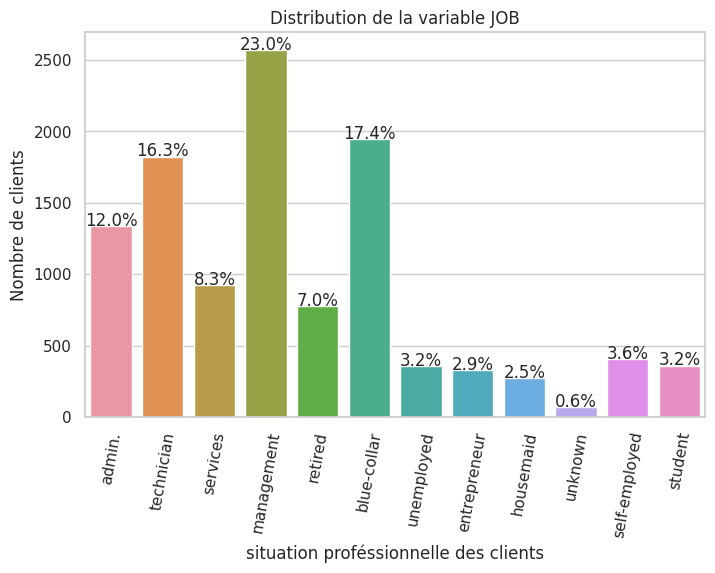

In [ ]:
#2 DISTRIBUTION VARIABLE JOB
#plt.figure(figsize=(6,6))
#sns.countplot(x="job", data=df)
#plt.ylabel('effectif')
#plt.xlabel("metier des clients")
#plt.title("distribution de la variable JOB")
#plt.xticks(rotation=80);
#print("la majorité des clients prospectés travaille comme manager, blue collar et technicien")

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.countplot(x='job', data=df)
total = len(df['job'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3, '{:.1f}%'.format((height/total)*100),
            ha="center", fontsize=12)

plt.ylabel('Nombre de clients')
plt.xlabel("situation proféssionnelle des clients")
plt.title("Distribution de la variable JOB")
plt.xticks(rotation=80)
plt.show()

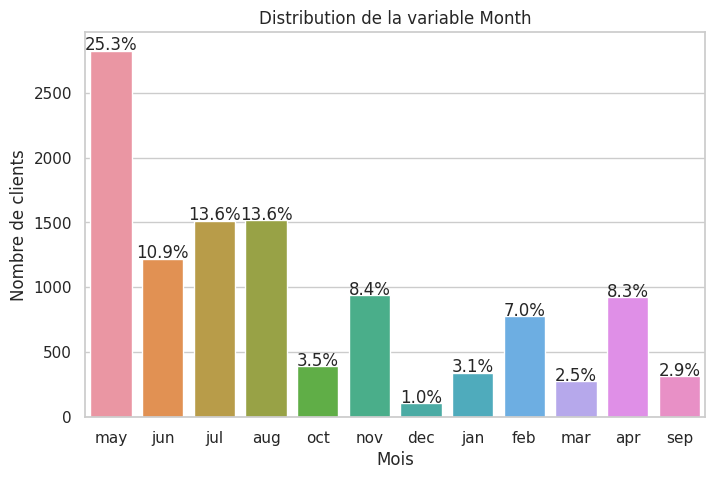

In [ ]:
#3 DISTRIBUTION VARIABLE MONTH
#plt.figure(figsize=(6,6))
#sns.countplot(x="month", data=df)
#plt.ylabel('nbre de client contacté pour la derniere fois')
#plt.xlabel("mois")
#plt.title("distribution de la variable MONTH")
#plt.xticks(rotation=45);
#print("on constate que les clients sont plus contactés pour la derniere fois en Mai mais aussi cela monte à partir d'avril jusqu'à aout")

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.countplot(x='month', data=df)
total = len(df['month'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3, '{:.1f}%'.format((height/total)*100),
            ha="center", fontsize=12)

plt.ylabel('Nombre de clients')
plt.xlabel("Mois")
plt.title("Distribution de la variable Month")
#plt.xticks(rotation=80)
plt.show()

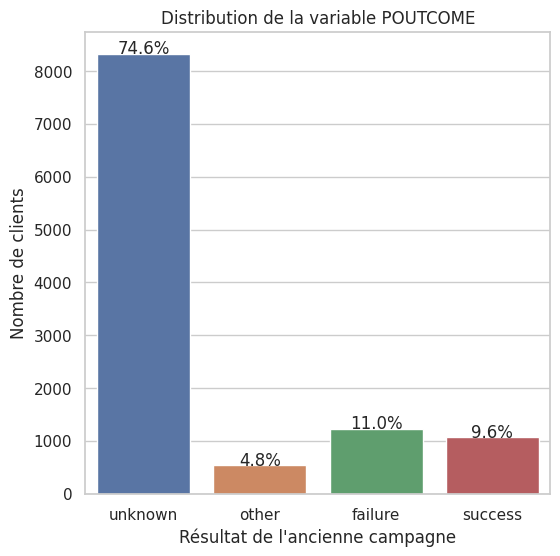

les résultats inconnues (unknown) de l'ancienne campagne sont super importante car représente pret de 74% par rapport aux autres résultats


In [ ]:
#4 analyse de la DISTRIBUTION du résultat de l'ancienne campagne (POUTCOME)
#plt.figure(figsize=(6,6))
#sns.countplot(x='poutcome', data=df)
#plt.ylabel('nbre de client')
#plt.xlabel("resultat de l'ancienne campagne")
#plt.title("distribution de la variable POUTCOME")
#plt.xticks(rotation=45);

plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x='poutcome', data=df)
total = len(df['poutcome'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3, '{:.1f}%'.format((height/total)*100),
            ha="center", fontsize=12)

plt.ylabel('Nombre de clients')
plt.xlabel("Résultat de l'ancienne campagne")
plt.title("Distribution de la variable POUTCOME")
plt.show()
print("les résultats inconnues (unknown) de l'ancienne campagne sont super importante car représente pret de 74% par rapport aux autres résultats")


In [ ]:
# 5.analyse de la distribution du statut marital des clients
marital_counts = df['marital'].value_counts()
labels = marital_counts.index
sizes = marital_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Répartition par statut maritaux de chaque client')
plt.show()
print("la majorité des clients prospectéés sont mariés ou célibataire avec juste 11% divorcé")

la majorité des clients prospectéés sont mariés ou célibataire avec juste 11% divorcé


In [ ]:
# 6.analyse de la distribution des clients en défaut de paiement
default_counts = df['default'].value_counts()
labels = default_counts.index
sizes = default_counts.values
custom_colors = ['skyblue', 'lightcoral']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,colors=custom_colors)
plt.axis('equal')
plt.title('taux de client en defaut de paiement')
plt.show()
print("il n'y a que 1,5% de client propesté en defaut de paiment")

il n'y a que 1,5% de client propesté en defaut de paiment


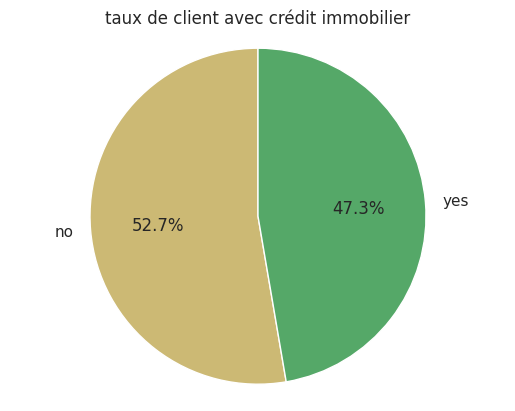

plus de la moitier des clients prospectés n'a pas de crédit immobiliier mais le pourcentage de client ayant un crédit est n'est pas à négliger car c'est presque la moitier des clients


In [ ]:
# 7.analyse de la distribution des clients ayany un crédit immobilier
housing_counts = df['housing'].value_counts()
labels = housing_counts.index
sizes = housing_counts.values
custom_colors = ['y', 'g']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,colors=custom_colors)
plt.axis('equal')
plt.title('taux de client avec crédit immobilier')
plt.show()
print("plus de la moitier des clients prospectés n'a pas de crédit immobiliier mais le pourcentage de client ayant un crédit est n'est pas à négliger car c'est presque la moitier des clients")

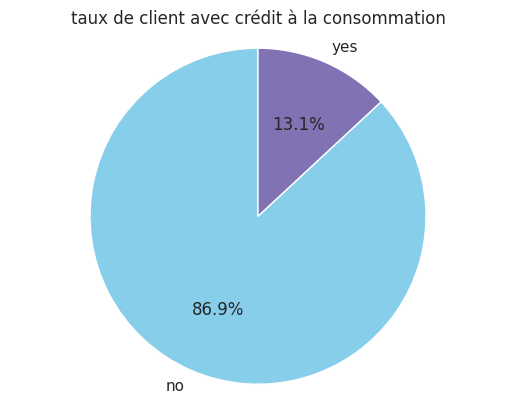

89% des clients prospectés n'ont pas de crédit à la consommation


In [ ]:
# 8.analyse de la distribution des clients ayant un crédit à la consommation
loan_counts = df['loan'].value_counts()
labels = loan_counts.index
sizes = loan_counts.values
custom_colors = ['skyblue', 'm']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,colors=custom_colors)
plt.axis('equal')
plt.title('taux de client avec crédit à la consommation')
plt.show()
print("89% des clients prospectés n'ont pas de crédit à la consommation")

In [ ]:
# 9.analyse de la distribution du mode de contact avec les clients
contact_counts = df['contact'].value_counts()
labels = contact_counts.index
sizes = contact_counts.values
custom_colors = ['g','b','r']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,colors=custom_colors)
plt.axis('equal')
plt.title('repartition par mode de contact')
plt.show()

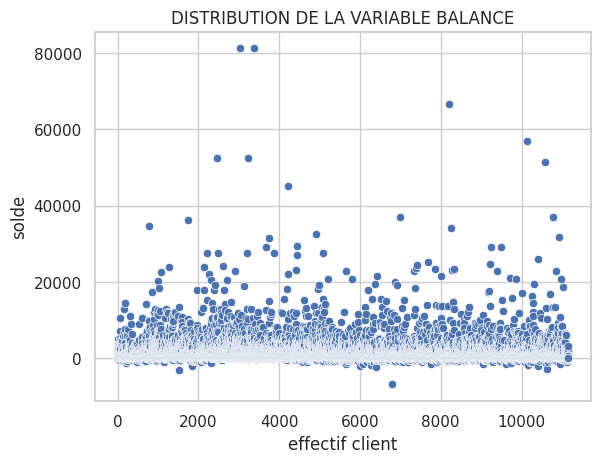

In [ ]:
sns.scatterplot(df['balance'])
plt.title("DISTRIBUTION DE LA VARIABLE BALANCE")
plt.xlabel("effectif client")
plt.ylabel("solde")
plt.show();

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


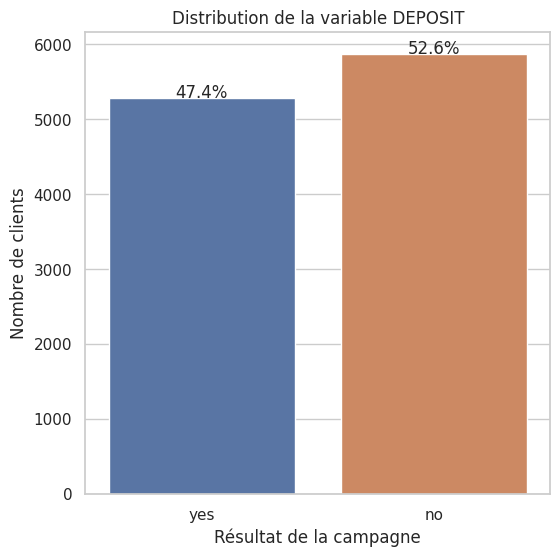

In [ ]:
# 10.analyse de la distribution du nombre de clients ayant souscrit à deposit
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x='deposit', data=df)
total = len(df['deposit'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3, '{:.1f}%'.format((height/total)*100),
            ha="center", fontsize=12)

plt.ylabel('Nombre de clients')
plt.xlabel("Résultat de la campagne")
plt.title("Distribution de la variable DEPOSIT")
plt.show()


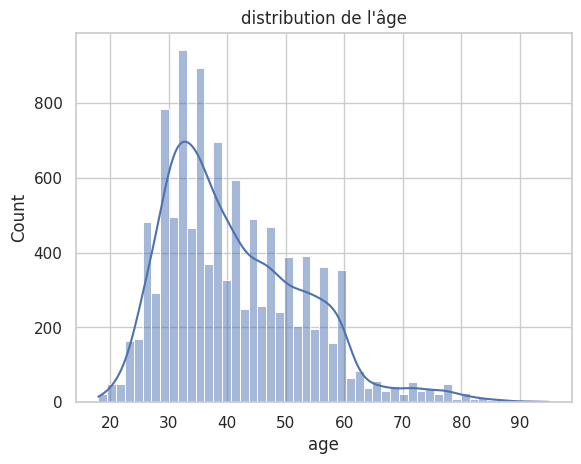

In [ ]:
#Distribution de l'age
sns.histplot(x=df['age'],label='Age', kde=True)
plt.title("distribution de l'âge");

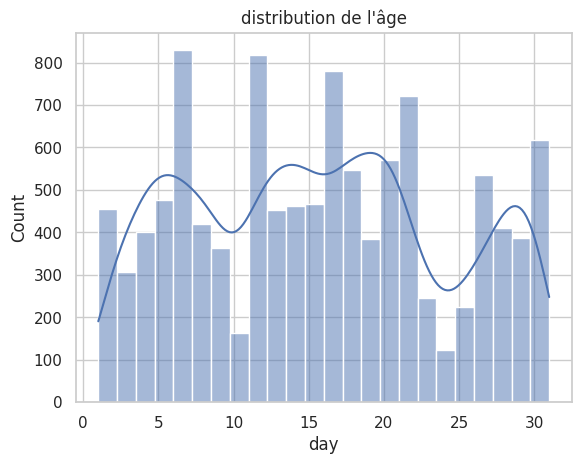

In [ ]:
#Distribution de l'age
sns.histplot(x=df['day'],label='day', kde=True)
plt.title("distribution de l'âge");

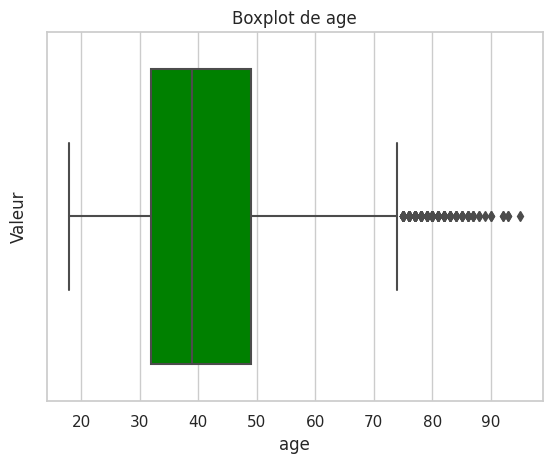

In [ ]:
sns.boxplot(x=df['age'], boxprops=dict(facecolor='green'))
plt.ylabel('Valeur')
plt.title('Boxplot de age')
plt.show()


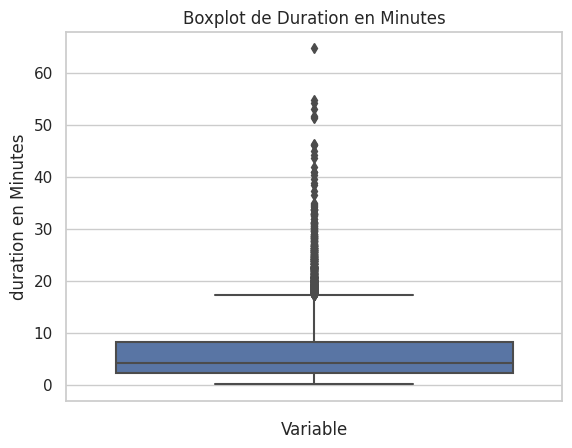

In [ ]:
#sns.scatterplot(df['duration']);
sns.boxplot(y=df['duration']/60)
plt.xlabel('Variable')
plt.ylabel('duration en Minutes')
plt.title('Boxplot de Duration en Minutes')
plt.show()

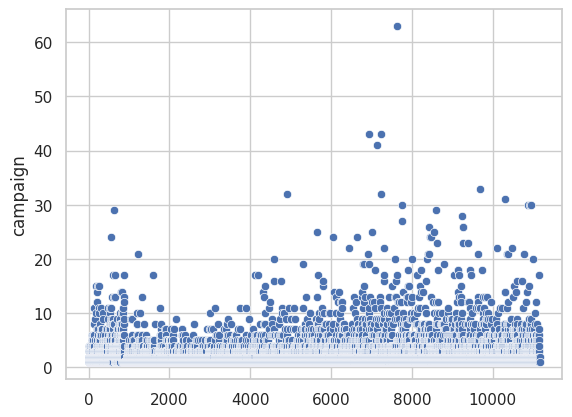

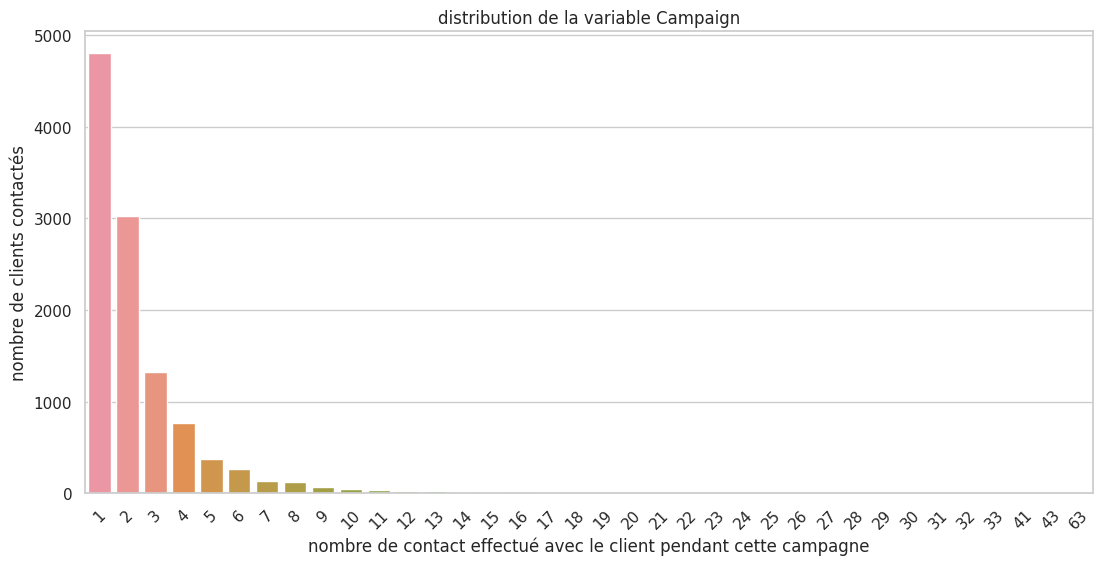

In [ ]:
sns.scatterplot(df['campaign']);
#sns.kdeplot(x=df['campaign'],label='campaign')
#plt.title('Distribution campaign');
plt.figure(figsize=(13,6))
sns.countplot(x="campaign", data=df)
plt.ylabel('nombre de clients contactés')
plt.xlabel("nombre de contact effectué avec le client pendant cette campagne")
plt.title("distribution de la variable Campaign")
plt.xticks(rotation=45);

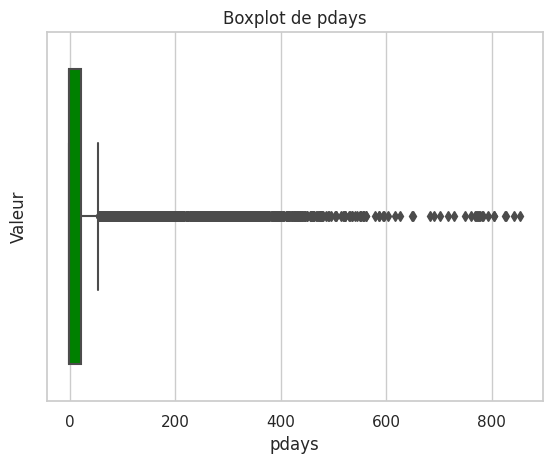

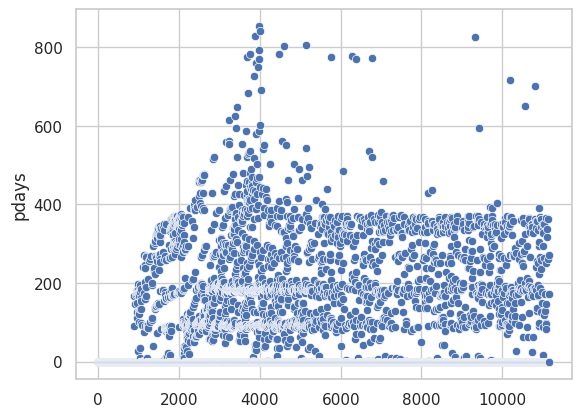

In [ ]:
sns.boxplot(x=(df['pdays']), boxprops=dict(facecolor='green'))
plt.ylabel('Valeur')
plt.title('Boxplot de pdays')
plt.show()

sns.scatterplot(df['pdays']);

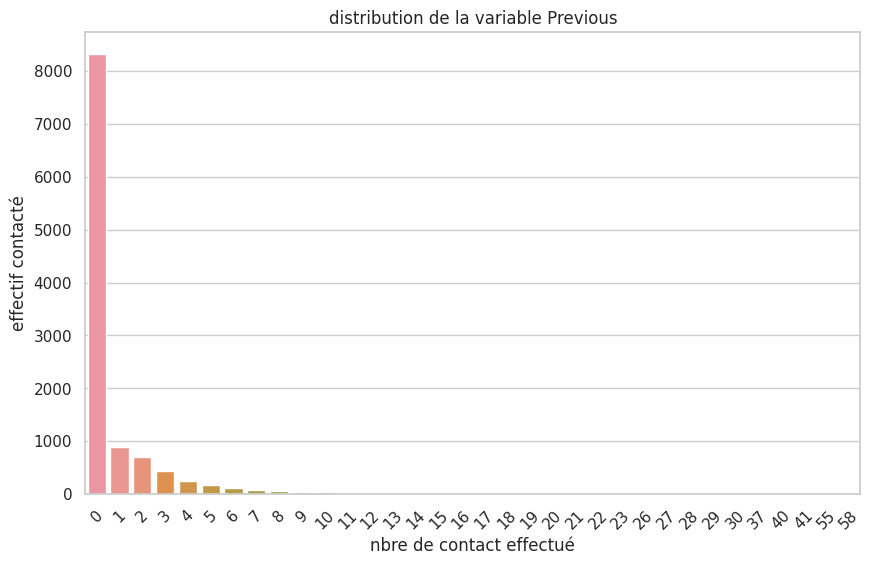

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="previous", data=df)
plt.ylabel('effectif contacté')
plt.xlabel("nbre de contact effectué")
plt.title("distribution de la variable Previous")
plt.xticks(rotation=45);

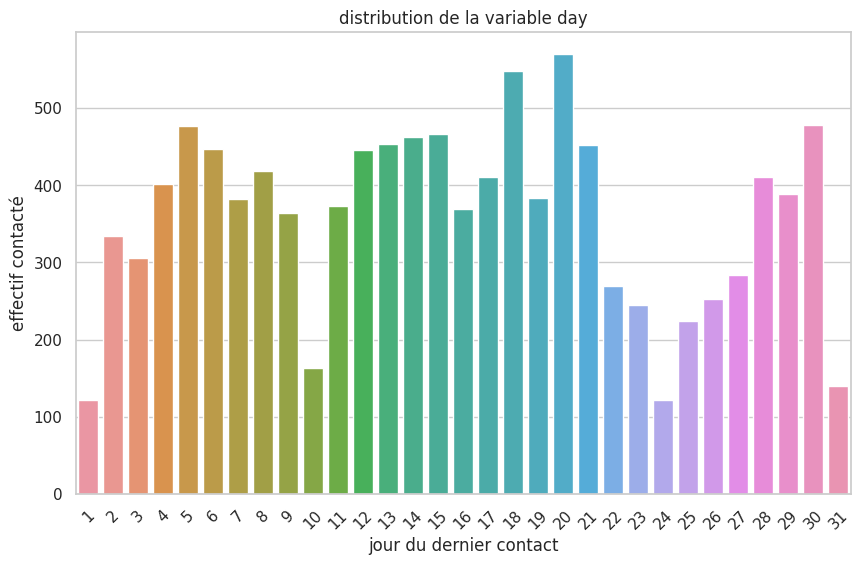

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="day", data=df)
plt.ylabel('effectif contacté')
plt.xlabel("jour du dernier contact")
plt.title("distribution de la variable day")
plt.xticks(rotation=45);

In [ ]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

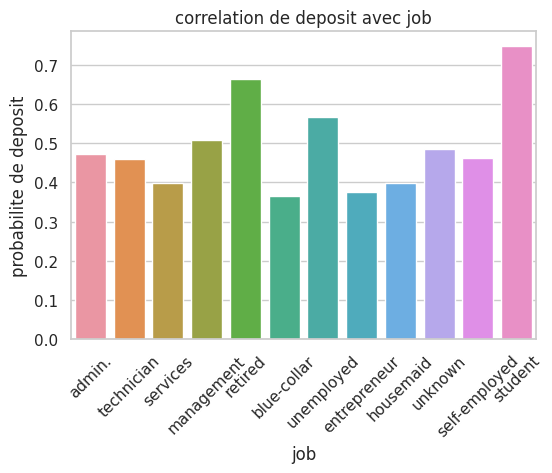

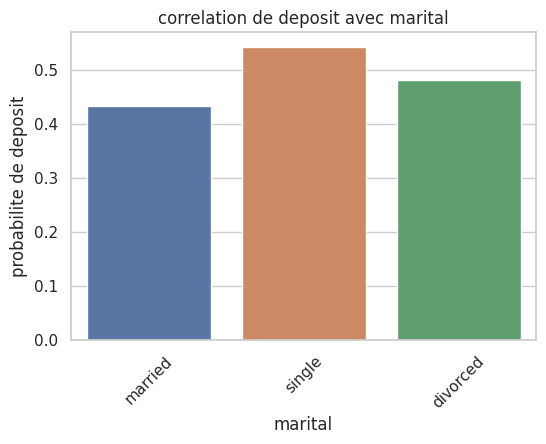

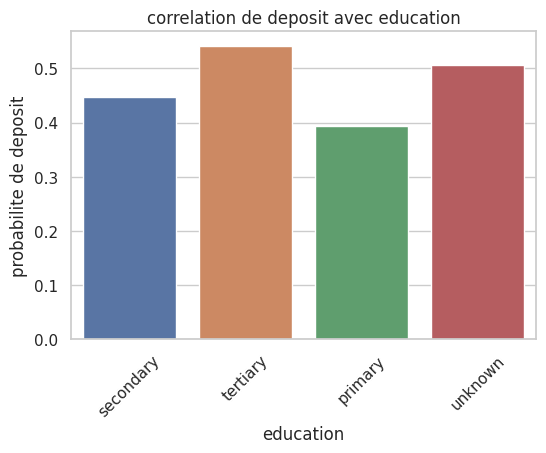

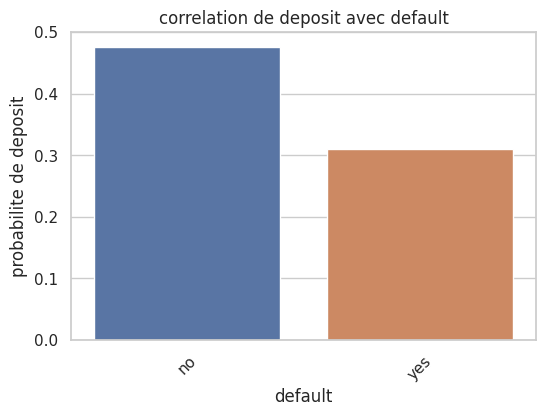

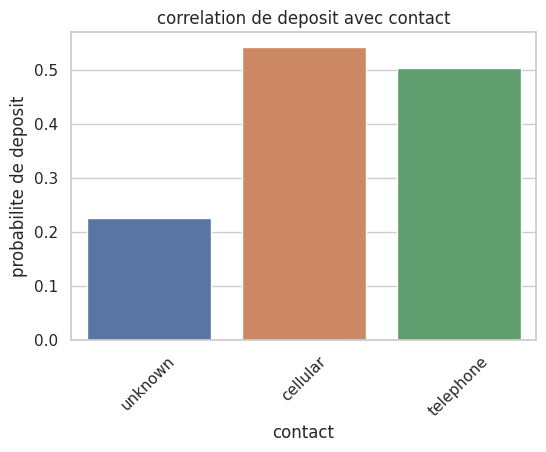

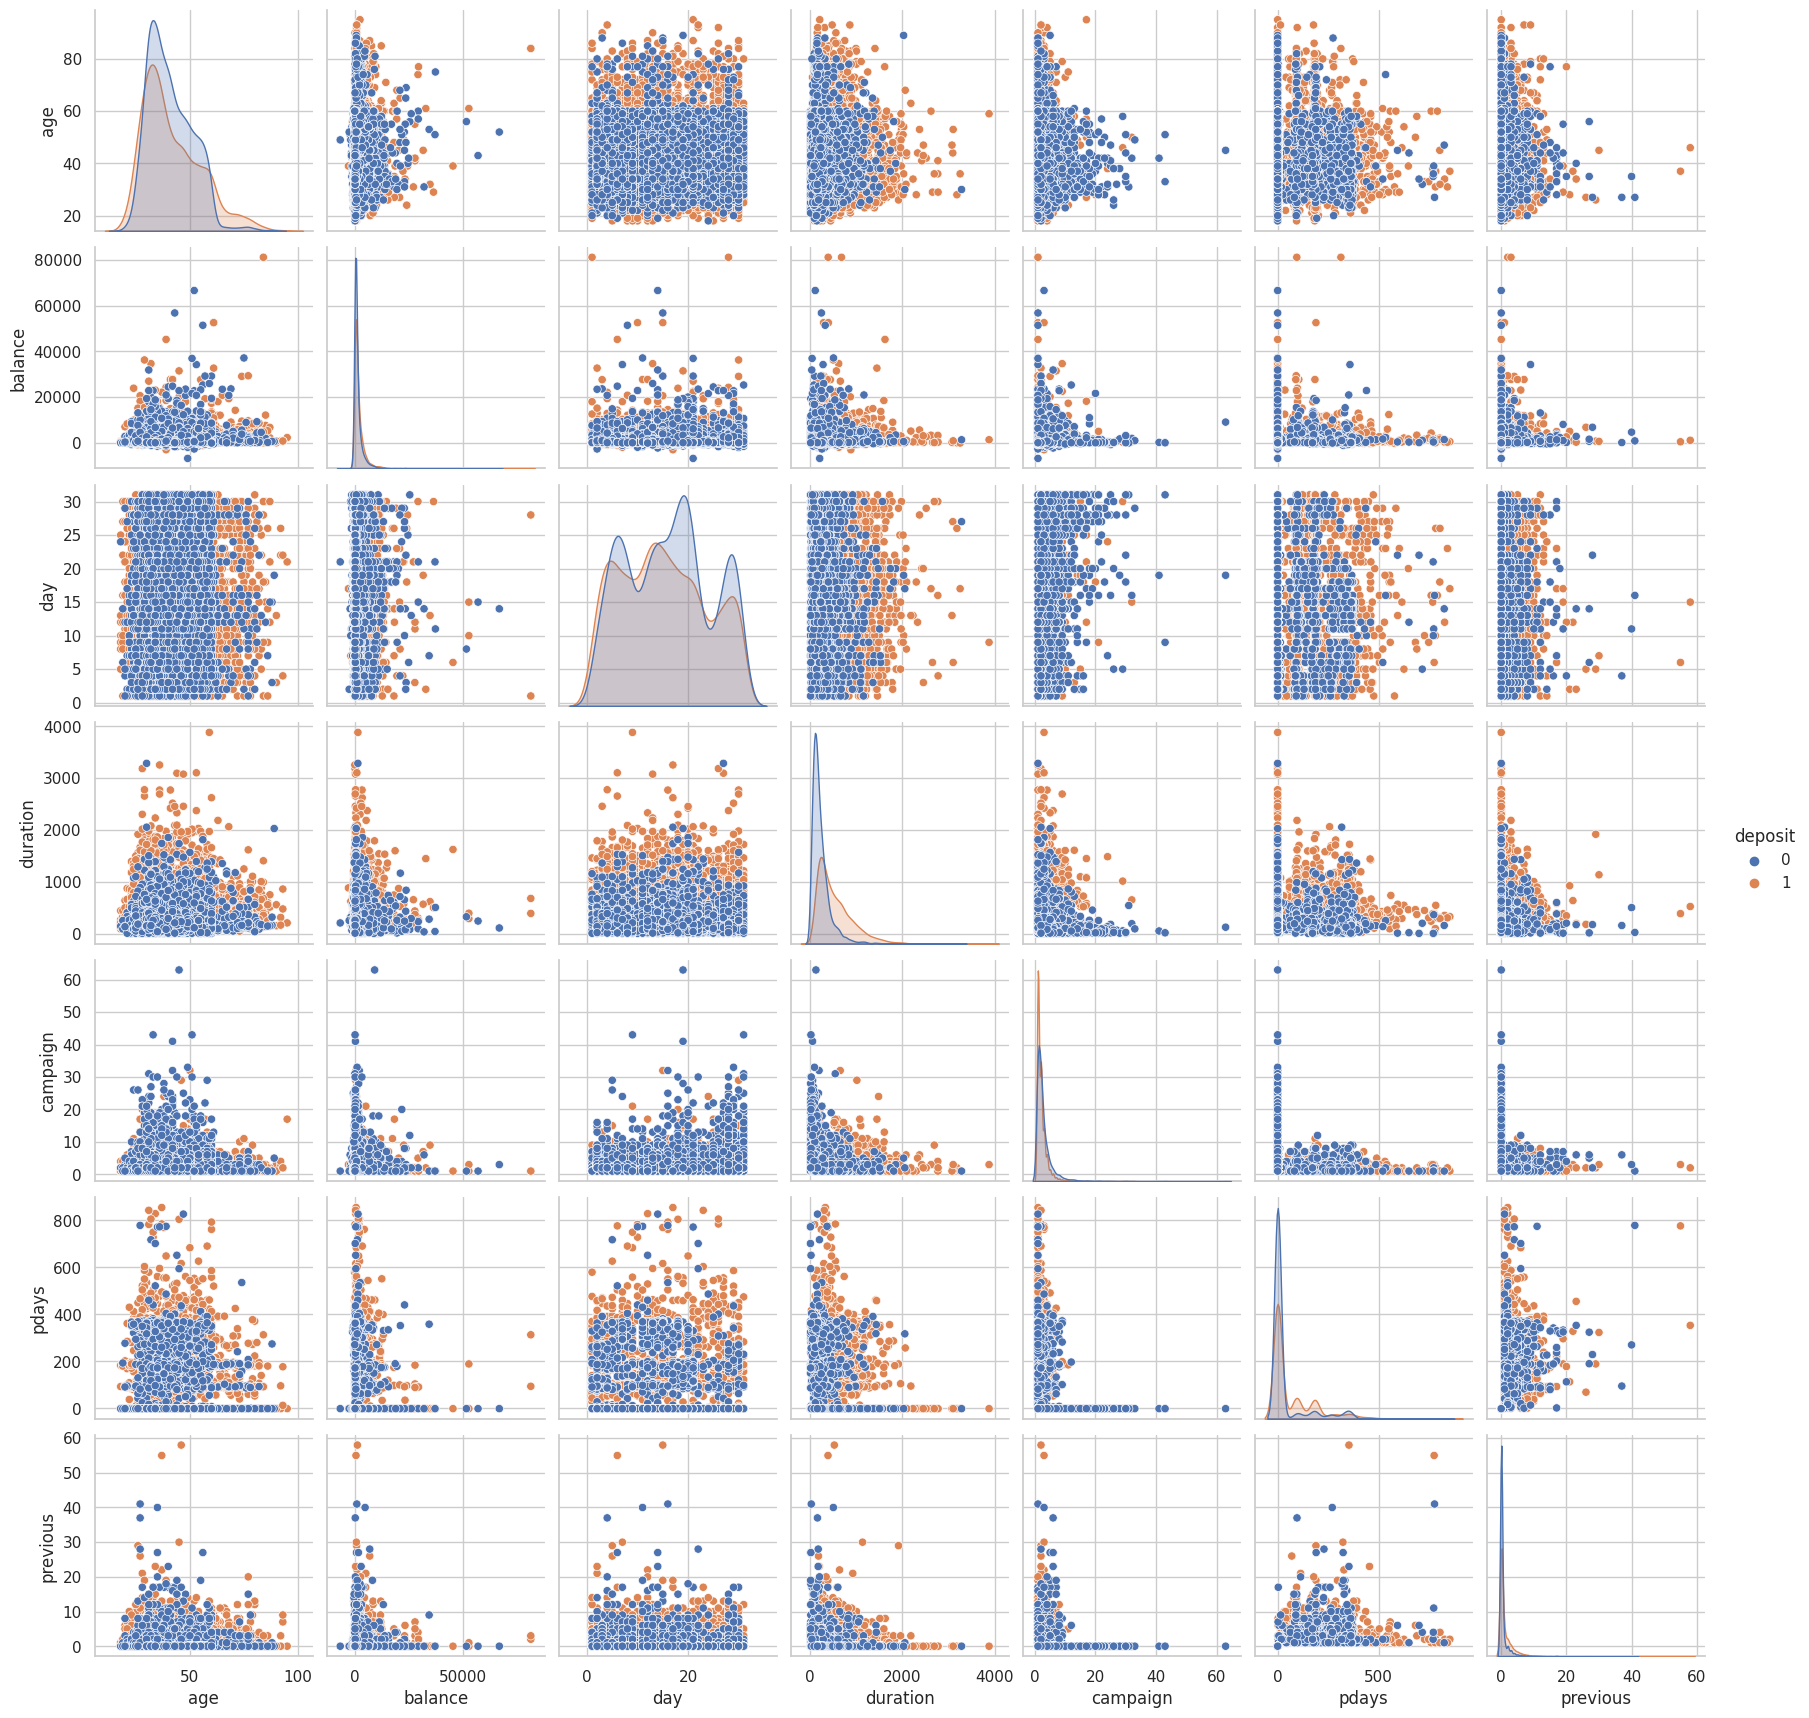

In [ ]:
df['deposit'] = df['deposit'].map({'no': 0, 'yes': 1})

col_categorielle= ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for x in col_categorielle:
    if df[x].dtype != 'float64':
        plt.figure(figsize=(6, 4))
        sns.barplot(x=x, y=df['deposit'], data=df, errorbar=None)
        plt.title(f'correlation de deposit avec {x}')
        plt.xlabel(x)
        plt.ylabel('probabilite de deposit')
        plt.xticks(rotation=45)
        plt.show()

sns.pairplot(df, hue='deposit')

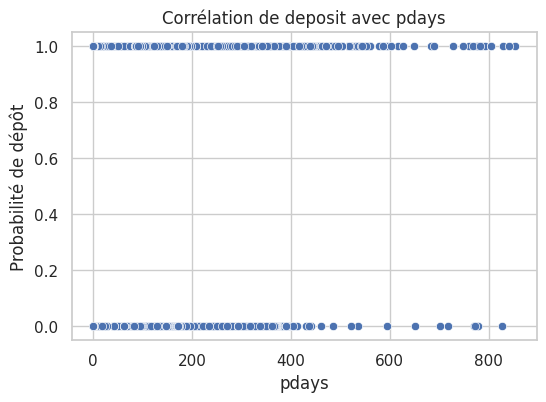

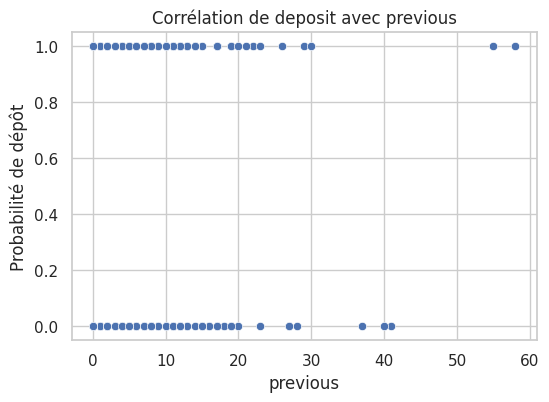

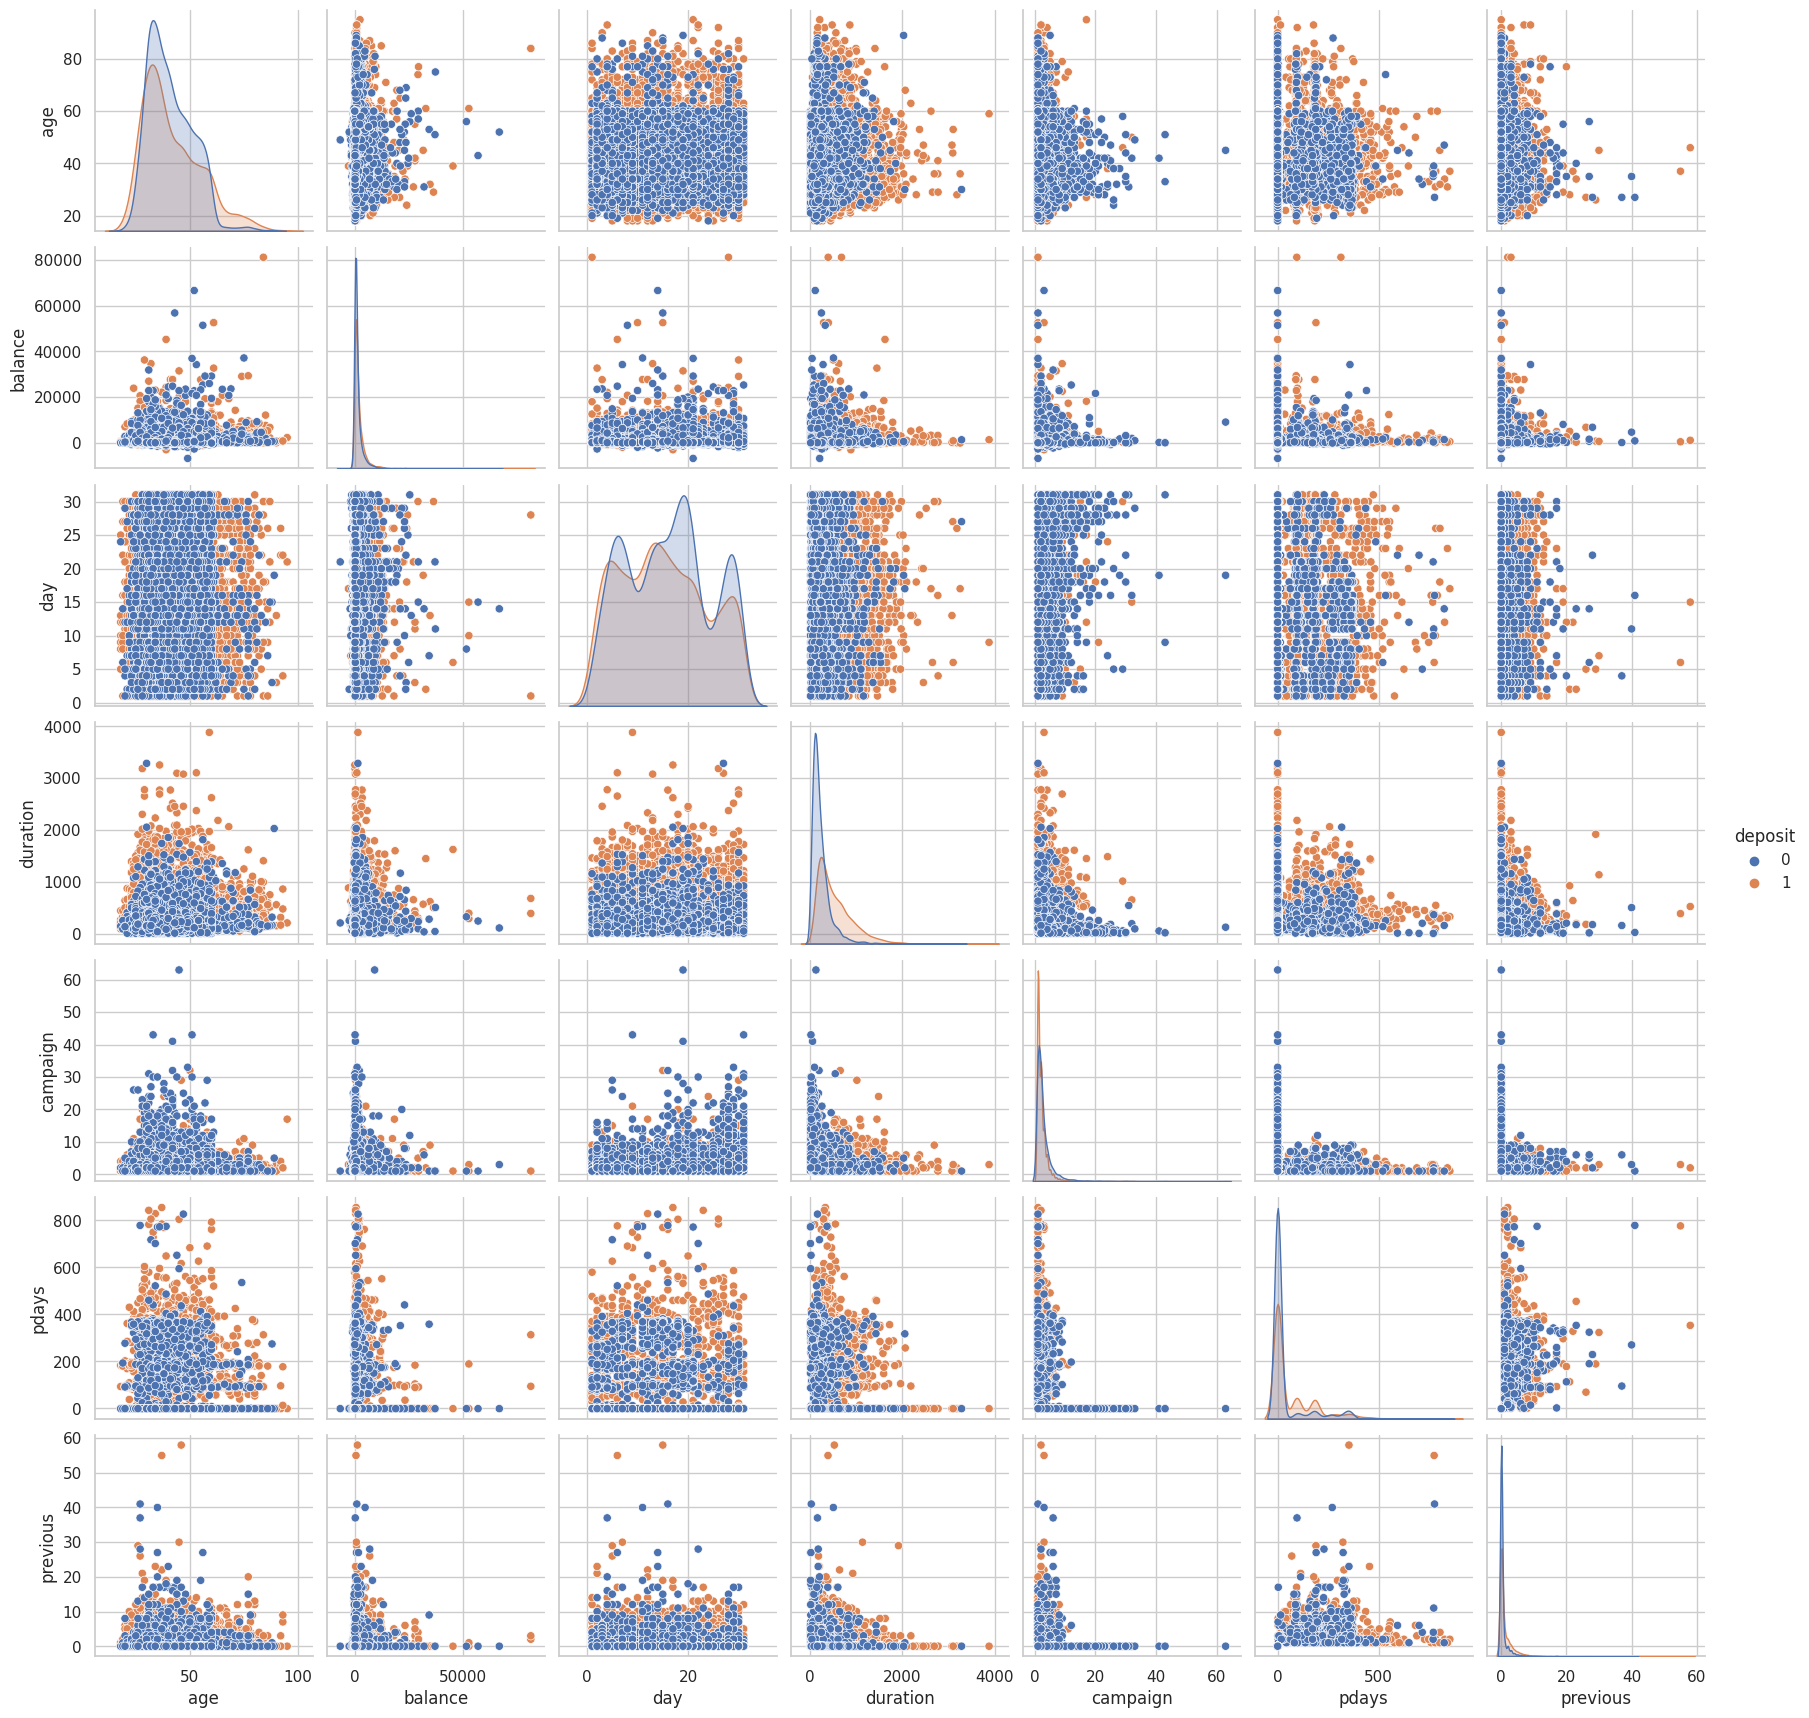

In [ ]:
# Liste des variables numériques
col_numeriques = ['age', 'balance', 'duration', 'day', 'campaign', 'pdays', 'previous']

# Boucle pour créer des scatter plots pour chaque variable numérique
for x in col_numeriques:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=x, y='deposit', data=df)
    plt.title(f'Corrélation de deposit avec {x}')
    plt.xlabel(x)
    plt.ylabel('Probabilité de dépôt')
    plt.show()

# Pairplot avec hue='deposit'
sns.pairplot(df, hue='deposit')



In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
data = df
variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
alpha = 0.05
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        contingency_table = pd.crosstab(data[var1], data[var2])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        print(f"Test entre {var1} et {var2}: Chi^2 = {chi2:.2f}, p = {p:.5f}")
        if p < alpha:
            print(f"RÉSULTAT: Les variables {var1} et {var2} sont probablement dépendantes")
        else:
            print(f"RÉSULTAT: Les variables {var1} et {var2} sont probablement indépendantes")
        print("-" * 60)

Test entre job et marital: Chi^2 = 1255.17, p = 0.00000
RÉSULTAT: Les variables job et marital sont probablement dépendantes
------------------------------------------------------------
Test entre job et education: Chi^2 = 7191.11, p = 0.00000
RÉSULTAT: Les variables job et education sont probablement dépendantes
------------------------------------------------------------
Test entre job et default: Chi^2 = 30.96, p = 0.00112
RÉSULTAT: Les variables job et default sont probablement dépendantes
------------------------------------------------------------
Test entre job et housing: Chi^2 = 1075.43, p = 0.00000
RÉSULTAT: Les variables job et housing sont probablement dépendantes
------------------------------------------------------------
Test entre job et loan: Chi^2 = 213.77, p = 0.00000
RÉSULTAT: Les variables job et loan sont probablement dépendantes
------------------------------------------------------------
Test entre job et contact: Chi^2 = 752.19, p = 0.00000
RÉSULTAT: Les variab

In [ ]:
from scipy.stats import f_oneway
import statsmodels.api as sm

# Analyse de Variance (ANOVA)
anova_results = f_oneway(df[df['deposit'] == 1]['age'],
                         df[df['deposit'] == 0]['age'])

print("Résultats de l'ANOVA pour l'âge:")
print("Statistique F :", anova_results.statistic)
print("P-valeur :", anova_results.pvalue)

# Régression Logistique
X = df['age']
X = sm.add_constant(X)  # Ajout d'une constante pour l'interception
y = df['deposit']

log_reg = sm.Logit(y, X)
log_reg_result = log_reg.fit()

print("\nRésultats de la Régression Logistique :")
print(log_reg_result.summary())



Résultats de l'ANOVA pour l'âge:
Statistique F : 13.610292760637696
P-valeur : 0.00022601800590821503
Optimization terminated successfully.
         Current function value: 0.691169
         Iterations 4

Résultats de la Régression Logistique :
                           Logit Regression Results                           
Dep. Variable:                deposit   No. Observations:                11162
Model:                          Logit   Df Residuals:                    11160
Method:                           MLE   Df Model:                            1
Date:                Fri, 27 Oct 2023   Pseudo R-squ.:               0.0008801
Time:                        22:40:36   Log-Likelihood:                -7714.8
converged:                       True   LL-Null:                       -7721.6
Covariance Type:            nonrobust   LLR p-value:                 0.0002272
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

          count       mean        std   min   25%   50%   75%   max
deposit                                                            
0        5873.0  40.837391  10.264815  18.0  33.0  39.0  48.0  89.0
1        5289.0  41.670070  13.497781  18.0  31.0  38.0  50.0  95.0
Test t de Student - Statistique de test : -3.689213027277996
Test t de Student - Valeur de p : 0.00022601800590796523
Point bisériel: 0.034900927890282624
Coefficient de corrélation de Pearson: 0.03490092789028266


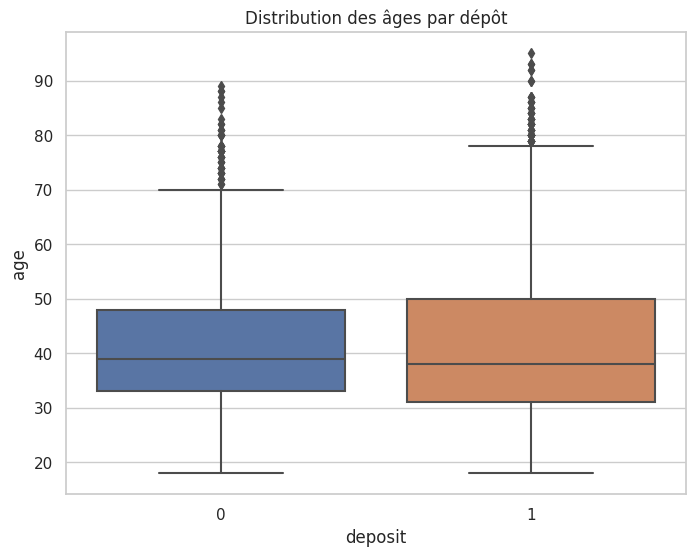

In [ ]:
#test statistique des variables numériques et la variable cible

from scipy.stats import ttest_ind
from scipy import stats

# analyse des statistiques descriptives
descriptive_stats = df.groupby('deposit')['age'].describe()

print(descriptive_stats)

# test t de Student
grouped = df.groupby('deposit')
group1 = grouped['age'].get_group(0)
group2 = grouped['age'].get_group(1)

t_stat, p_val = ttest_ind(group1, group2)

print('Test t de Student - Statistique de test :', t_stat)
print('Test t de Student - Valeur de p :', p_val)

#Calcul de la correlation avec le point_biserial
point_biserial, _ = stats.pointbiserialr(df['deposit'], df['age'])
print('Point bisériel:', point_biserial)

#Calcul de la correlation avec la coéfficient de Pearson
correlation = df['age'].corr(df['deposit'])
print('Coefficient de corrélation de Pearson:', correlation)

# visualisation
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='age', data=df)
plt.title('Distribution des âges par dépôt')
plt.show()

          count         mean          std     min    25%    50%     75%  \
deposit                                                                   
0        5873.0  1280.227141  2933.411934 -6847.0   64.0  414.0  1324.0   
1        5289.0  1804.267915  3501.104777 -3058.0  210.0  733.0  2159.0   

             max  
deposit           
0        66653.0  
1        81204.0  
Test t de Student - Statistique de test : -8.598842126021864
Test t de Student - Valeur de p : 9.126568254859532e-18
Point bisériel: 0.08112858919103573
Coefficient de corrélation de Pearson: 0.08112858919103555


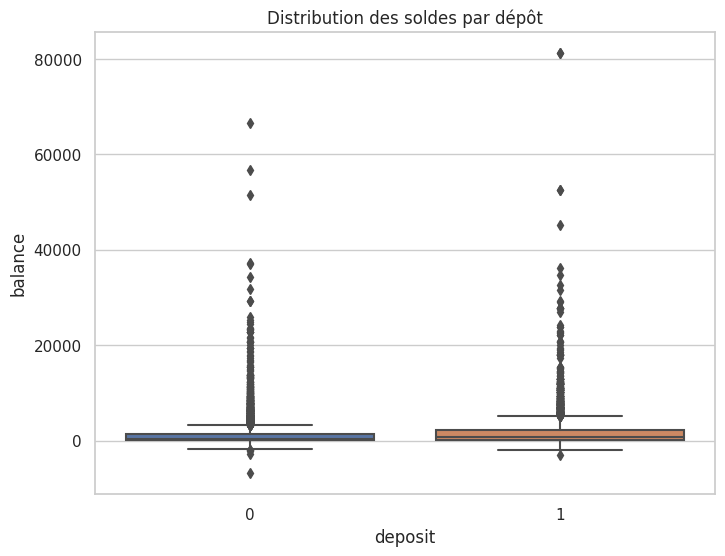

In [ ]:
#test statistique des variables numériques et la variable cible

from scipy.stats import ttest_ind
from scipy import stats

# analyse des statistiques descriptives
descriptive_stats = df.groupby('deposit')['balance'].describe()

print(descriptive_stats)

# test t de Student
grouped = df.groupby('deposit')
group1 = grouped['balance'].get_group(0)
group2 = grouped['balance'].get_group(1)

t_stat, p_val = ttest_ind(group1, group2)

print('Test t de Student - Statistique de test :', t_stat)
print('Test t de Student - Valeur de p :', p_val)

#Calcul de la correlation avec le point_biserial
point_biserial, _ = stats.pointbiserialr(df['deposit'], df['balance'])
print('Point bisériel:', point_biserial)

#Calcul de la correlation avec la coéfficient de Pearson
correlation = df['balance'].corr(df['deposit'])
print('Coefficient de corrélation de Pearson:', correlation)

# visualisation
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='balance', data=df)
plt.title('Distribution des soldes par dépôt')
plt.show()

In [ ]:
df['durations']=df['duration']/60
print(df['durations'])

0        17.366667
1        24.450000
2        23.150000
3         9.650000
4        11.216667
           ...    
11157     4.283333
11158     1.383333
11159     2.600000
11160     0.150000
11161    10.466667
Name: durations, Length: 11162, dtype: float64


          count      mean       std       min       25%       50%        75%  \
deposit                                                                        
0        5873.0  3.718838  3.476292  0.033333  1.566667  2.716667   4.700000   
1        5289.0  8.954910  6.542088  0.133333  4.066667  7.100000  12.083333   

               max  
deposit             
0        54.733333  
1        64.683333  
Test t de Student - Statistique de test : -53.517961906075044
Test t de Student - Valeur de p : 0.0
Point bisériel: 0.45191936084258383
Coefficient de corrélation de Pearson: 0.4519193608425828


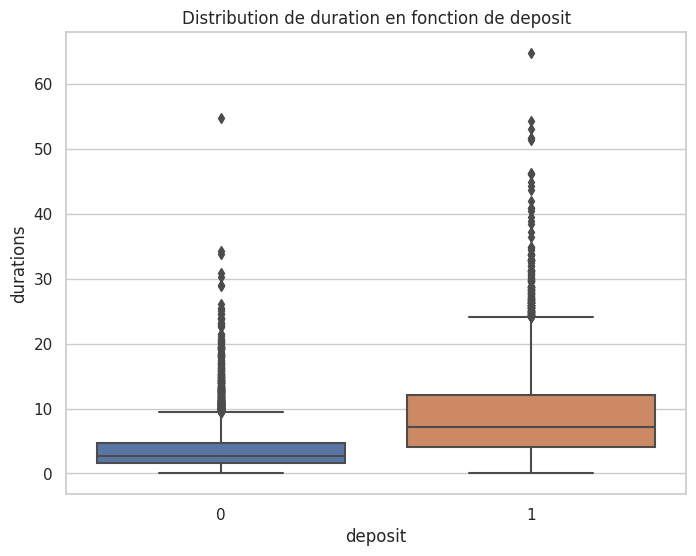

In [ ]:
#test statistique des variables numériques et la variable cible

from scipy.stats import ttest_ind
from scipy import stats
df['durations']=df['duration']/60
# analyse des statistiques descriptives
descriptive_stats = df.groupby('deposit')['durations'].describe()

print(descriptive_stats)

# test t de Student
grouped = df.groupby('deposit')
group1 = grouped['durations'].get_group(0)
group2 = grouped['durations'].get_group(1)

t_stat, p_val = ttest_ind(group1, group2)

print('Test t de Student - Statistique de test :', t_stat)
print('Test t de Student - Valeur de p :', p_val)

#Calcul de la correlation avec le point_biserial
point_biserial, _ = stats.pointbiserialr(df['deposit'], df['durations'])
print('Point bisériel:', point_biserial)

#Calcul de la correlation avec la coéfficient de Pearson
correlation = df['durations'].corr(df['deposit'])
print('Coefficient de corrélation de Pearson:', correlation)

# visualisation
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='durations', data=df)
plt.title('Distribution de duration en fonction de deposit')
plt.show()

          count      mean       std  min  25%  50%  75%   max
deposit                                                      
0        5873.0  2.839264  3.244474  1.0  1.0  2.0  3.0  63.0
1        5289.0  2.141047  1.921826  1.0  1.0  2.0  3.0  32.0
Test t de Student - Statistique de test : 13.64294296418874
Test t de Student - Valeur de p : 4.8313242340953003e-42
Point bisériel: -0.1280808461248675
Coefficient de corrélation de Pearson: -0.12808084612486742


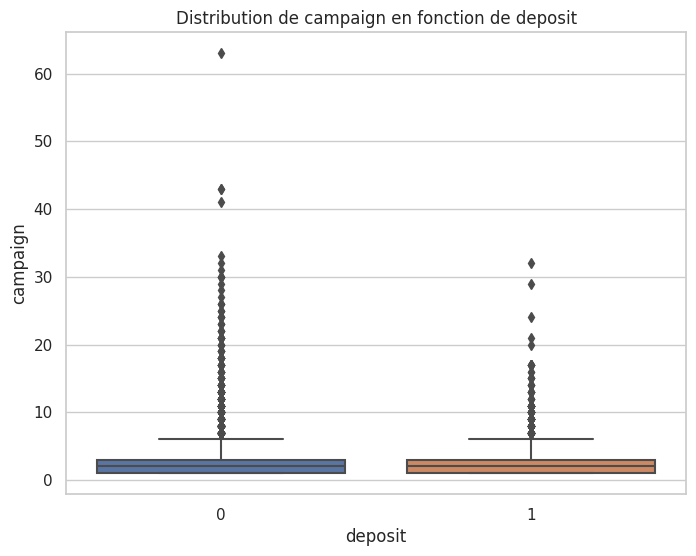

In [ ]:
#test statistique des variables numériques et la variable cible

from scipy.stats import ttest_ind
from scipy import stats

# analyse des statistiques descriptives
descriptive_stats = df.groupby('deposit')['campaign'].describe()

print(descriptive_stats)

# test t de Student
grouped = df.groupby('deposit')
group1 = grouped['campaign'].get_group(0)
group2 = grouped['campaign'].get_group(1)

t_stat, p_val = ttest_ind(group1, group2)

print('Test t de Student - Statistique de test :', t_stat)
print('Test t de Student - Valeur de p :', p_val)

#Calcul de la correlation avec le point_biserial
point_biserial, _ = stats.pointbiserialr(df['deposit'], df['campaign'])
print('Point bisériel:', point_biserial)

#Calcul de la correlation avec la coéfficient de Pearson
correlation = df['campaign'].corr(df['deposit'])
print('Coefficient de corrélation de Pearson:', correlation)

# visualisation
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='campaign', data=df)
plt.title('Distribution de campaign en fonction de deposit')
plt.show()

          count       mean         std  min  25%  50%   75%    max
deposit                                                           
0        5873.0  35.685340   96.182893 -1.0 -1.0 -1.0  -1.0  826.0
1        5289.0  68.702968  118.822266 -1.0 -1.0 -1.0  98.0  854.0
Test t de Student - Statistique de test : -16.201610868708798
Test t de Student - Valeur de p : 2.271607022915964e-58
Point bisériel: 0.15159251635244844
Coefficient de corrélation de Pearson: 0.15159251635244853


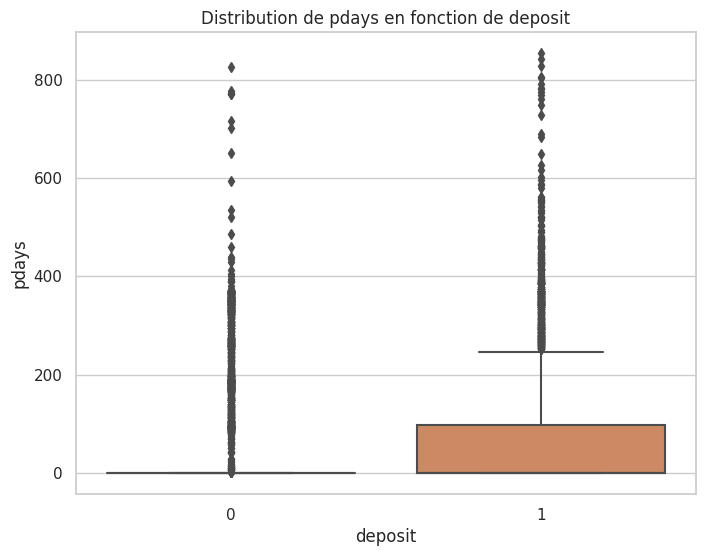

In [ ]:
#test statistique des variables numériques et la variable cible

from scipy.stats import ttest_ind
from scipy import stats

# analyse des statistiques descriptives
descriptive_stats = df.groupby('deposit')['pdays'].describe()

print(descriptive_stats)

# test t de Student
grouped = df.groupby('deposit')
group1 = grouped['pdays'].get_group(0)
group2 = grouped['pdays'].get_group(1)

t_stat, p_val = ttest_ind(group1, group2)

print('Test t de Student - Statistique de test :', t_stat)
print('Test t de Student - Valeur de p :', p_val)

#Calcul de la correlation avec le point_biserial
point_biserial, _ = stats.pointbiserialr(df['deposit'], df['pdays'])
print('Point bisériel:', point_biserial)

#Calcul de la correlation avec la coéfficient de Pearson
correlation = df['pdays'].corr(df['deposit'])
print('Coefficient de corrélation de Pearson:', correlation)

# visualisation
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='pdays', data=df)
plt.title('Distribution de pdays en fonction de deposit')
plt.show()

          count      mean       std  min  25%  50%  75%   max
deposit                                                      
0        5873.0  0.528350  1.979610  0.0  0.0  0.0  0.0  41.0
1        5289.0  1.170354  2.553272  0.0  0.0  0.0  1.0  58.0
Test t de Student - Statistique de test : -14.922371096299393
Test t de Student - Valeur de p : 7.125337986152125e-50
Point bisériel: 0.1398671182007799
Coefficient de corrélation de Pearson: 0.13986711820078007


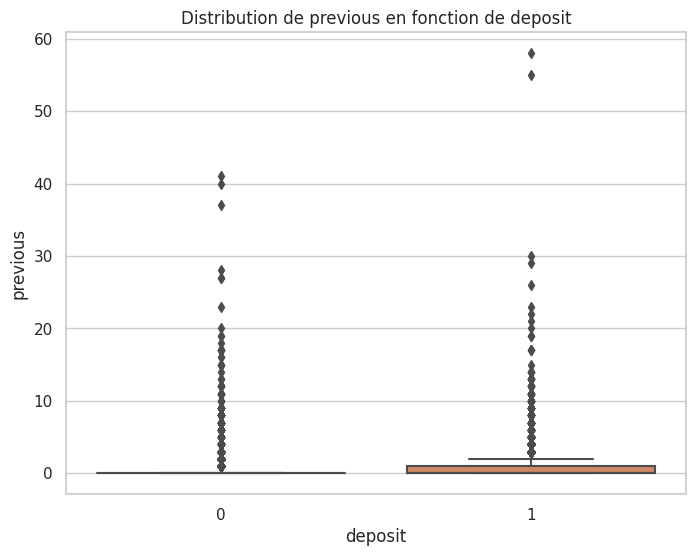

In [ ]:
#test statistique des variables numériques et la variable cible

from scipy.stats import ttest_ind
from scipy import stats

# analyse des statistiques descriptives
descriptive_stats = df.groupby('deposit')['previous'].describe()

print(descriptive_stats)

# test t de Student
grouped = df.groupby('deposit')
group1 = grouped['previous'].get_group(0)
group2 = grouped['previous'].get_group(1)

t_stat, p_val = ttest_ind(group1, group2)

print('Test t de Student - Statistique de test :', t_stat)
print('Test t de Student - Valeur de p :', p_val)

#Calcul de la correlation avec le point_biserial
point_biserial, _ = stats.pointbiserialr(df['deposit'], df['previous'])
print('Point bisériel:', point_biserial)

#Calcul de la correlation avec la coéfficient de Pearson
correlation = df['previous'].corr(df['deposit'])
print('Coefficient de corrélation de Pearson:', correlation)

# visualisation
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='previous', data=df)
plt.title('Distribution de previous en fonction de deposit')
plt.show()

ANOVA pour age et job :
                sum_sq       df           F  PR(>F)
C(job)    5.831854e+05     11.0  590.619823     0.0
Residual  1.000877e+06  11150.0         NaN     NaN




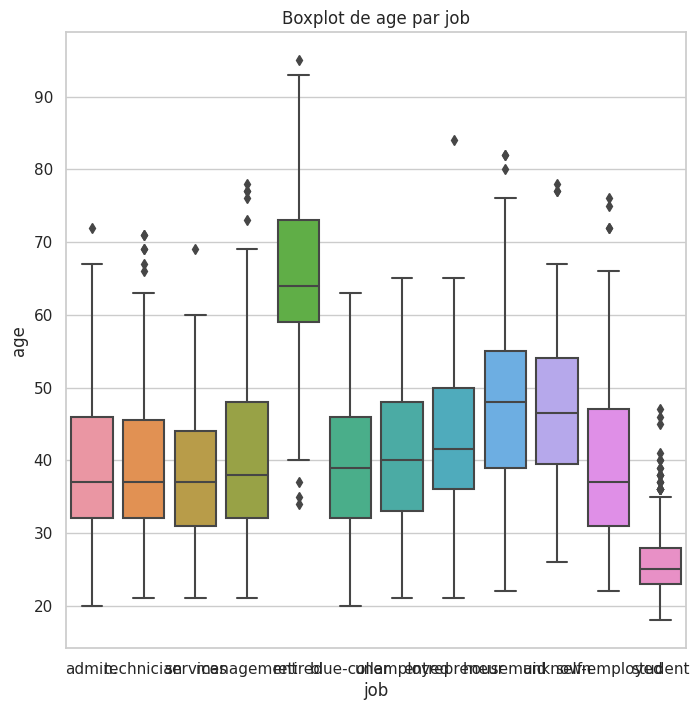

ANOVA pour age et marital :
                  sum_sq       df            F  PR(>F)
C(marital)  3.552623e+05      2.0  1613.106691     0.0
Residual    1.228800e+06  11159.0          NaN     NaN




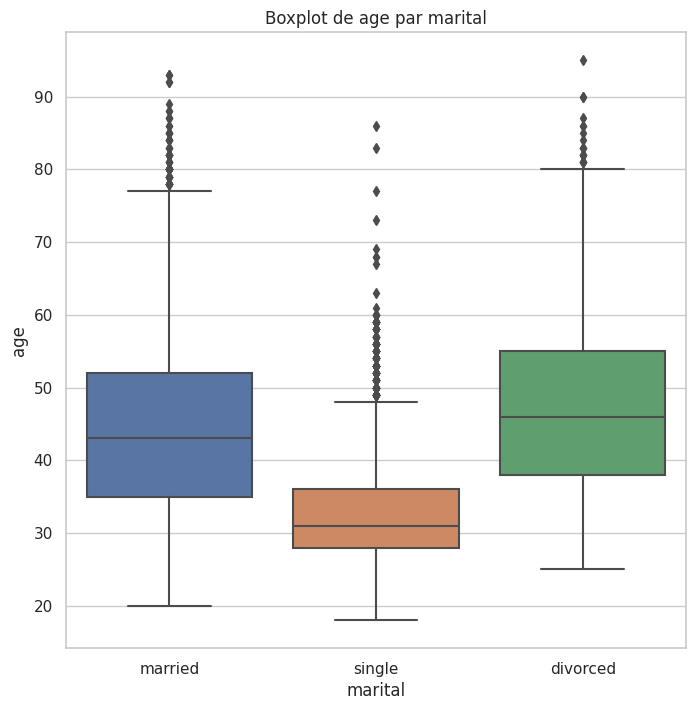

ANOVA pour age et education :
                    sum_sq       df           F         PR(>F)
C(education)  1.005044e+05      3.0  251.968251  3.205321e-158
Residual      1.483558e+06  11158.0         NaN            NaN




ANOVA pour age et default :
                  sum_sq       df         F    PR(>F)
C(default)  2.067600e+02      1.0  1.456851  0.227457
Residual    1.583856e+06  11160.0       NaN       NaN




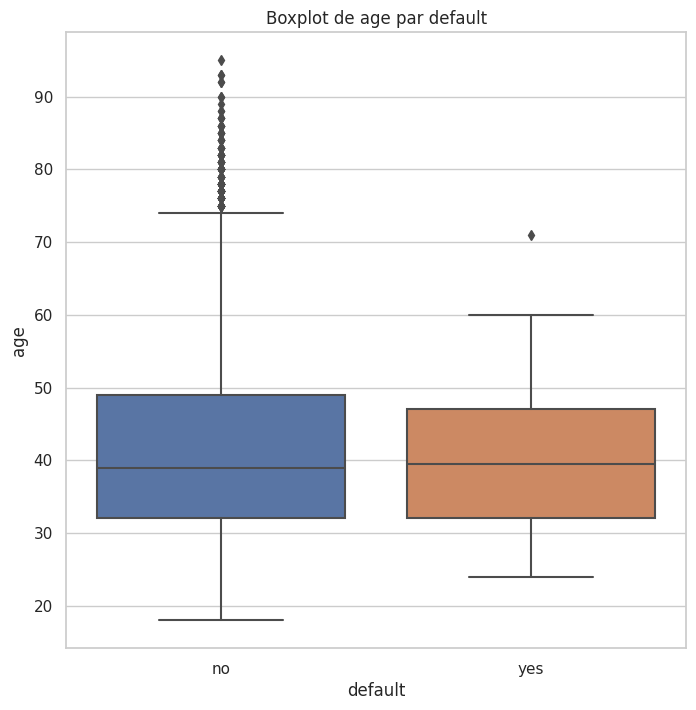

ANOVA pour age et housing :
                  sum_sq       df           F        PR(>F)
C(housing)  4.508210e+04      1.0  326.915332  4.794977e-72
Residual    1.538980e+06  11160.0         NaN           NaN




ANOVA pour age et loan :
                sum_sq       df          F    PR(>F)
C(loan)   1.563616e+03      1.0  11.026837  0.000901
Residual  1.582499e+06  11160.0        NaN       NaN




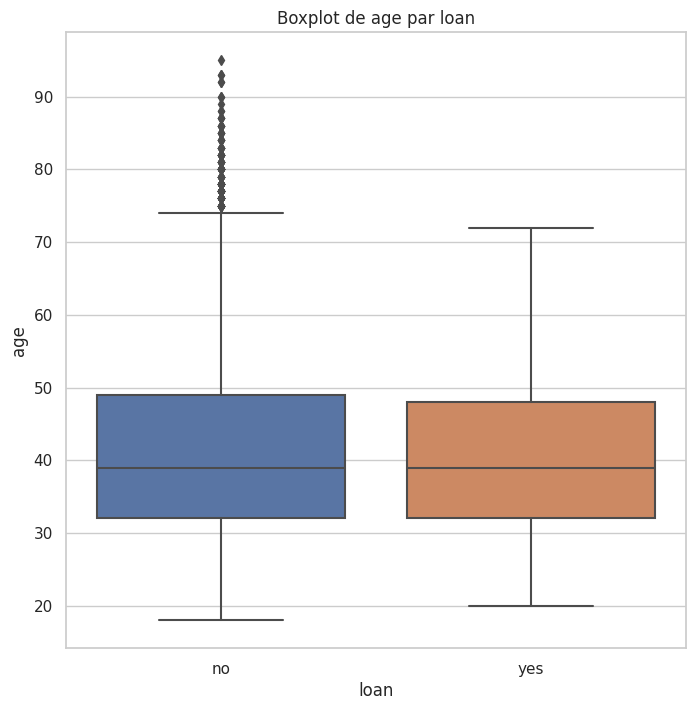

ANOVA pour age et contact :
                  sum_sq       df           F         PR(>F)
C(contact)  7.057283e+04      2.0  260.167691  3.679437e-111
Residual    1.513490e+06  11159.0         NaN            NaN




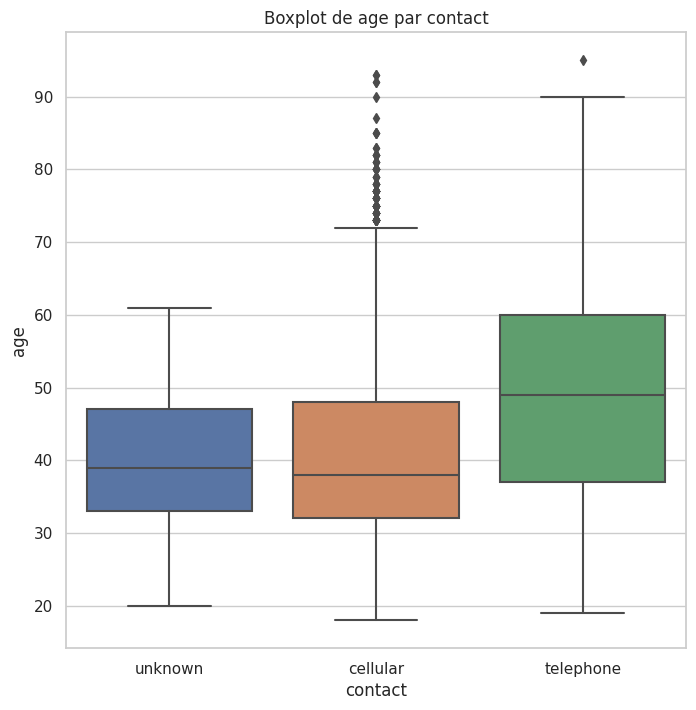

ANOVA pour age et month :
                sum_sq       df          F        PR(>F)
C(month)  3.697448e+04     11.0  24.225301  4.238481e-50
Residual  1.547088e+06  11150.0        NaN           NaN




ANOVA pour age et poutcome :
                   sum_sq       df          F        PR(>F)
C(poutcome)  6.439033e+03      3.0  15.180371  7.422067e-10
Residual     1.577623e+06  11158.0        NaN           NaN




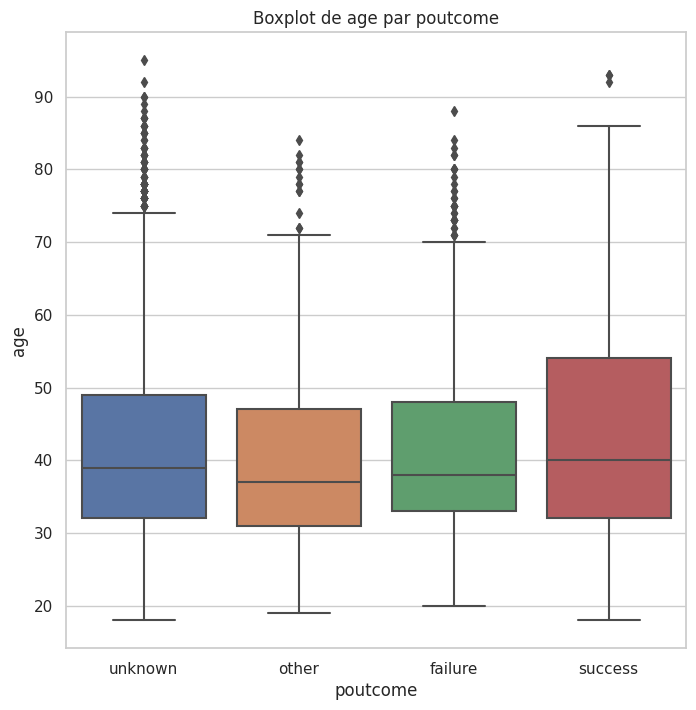

ANOVA pour age et deposit :
                  sum_sq       df          F    PR(>F)
C(deposit)  1.929507e+03      1.0  13.610293  0.000226
Residual    1.582133e+06  11160.0        NaN       NaN




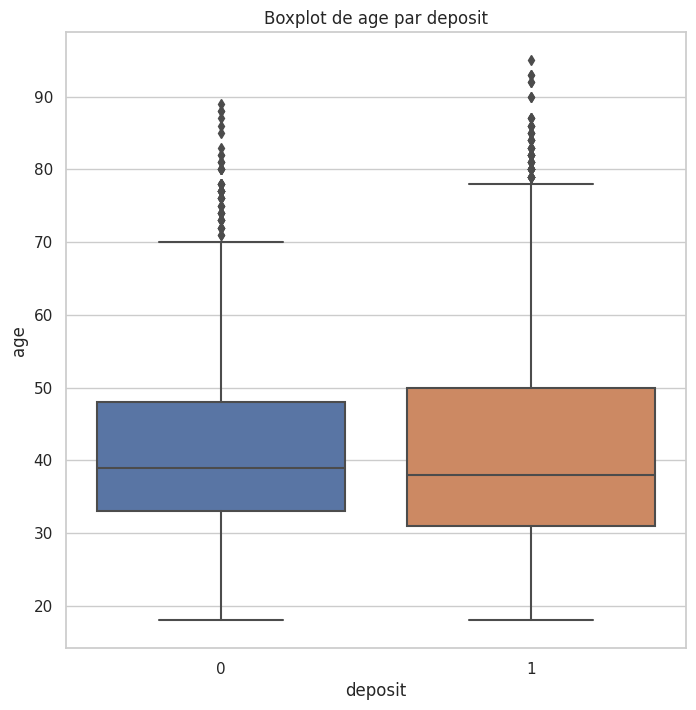

ANOVA pour balance et job :
                sum_sq       df         F        PR(>F)
C(job)    1.418253e+09     11.0  12.53428  6.367901e-24
Residual  1.146929e+11  11150.0       NaN           NaN




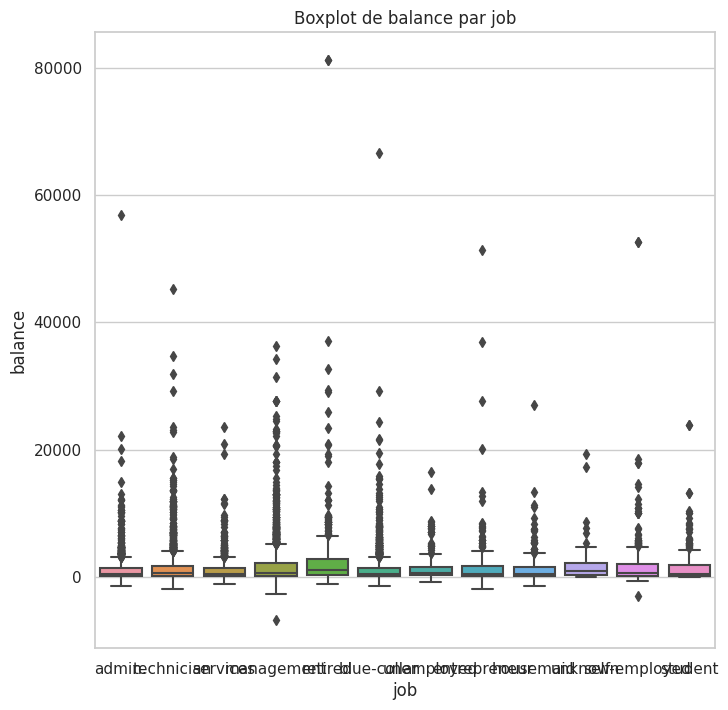

ANOVA pour balance et marital :
                  sum_sq       df         F   PR(>F)
C(marital)  8.199403e+07      2.0  3.942852  0.01942
Residual    1.160291e+11  11159.0       NaN      NaN




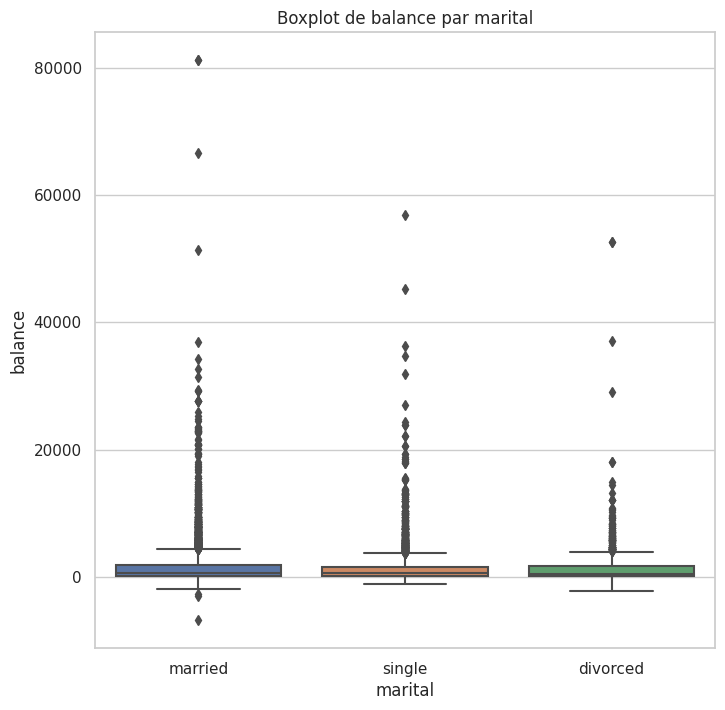

ANOVA pour balance et education :
                    sum_sq       df          F        PR(>F)
C(education)  6.900451e+08      3.0  22.236039  2.381104e-14
Residual      1.154211e+11  11158.0        NaN           NaN




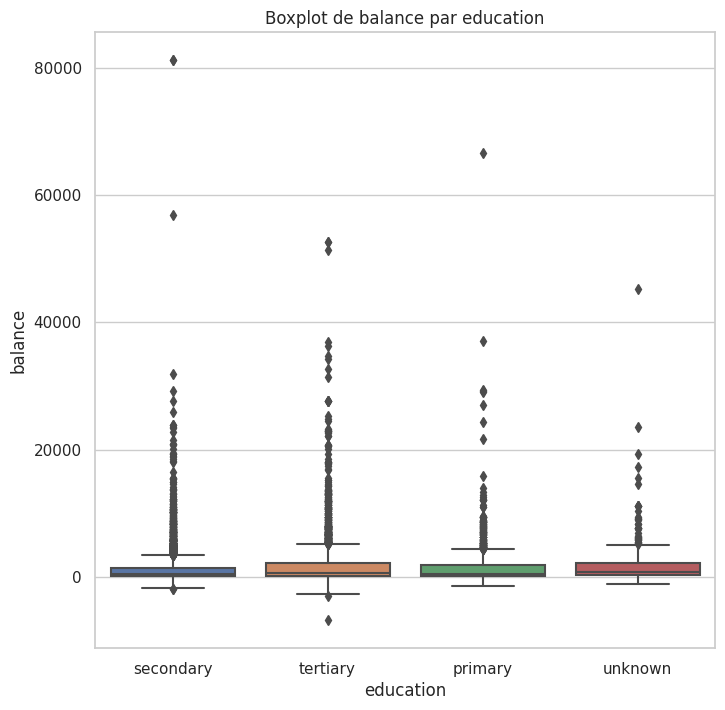

ANOVA pour balance et default :
                  sum_sq       df          F        PR(>F)
C(default)  4.313966e+08      1.0  41.618228  1.155453e-10
Residual    1.156797e+11  11160.0        NaN           NaN




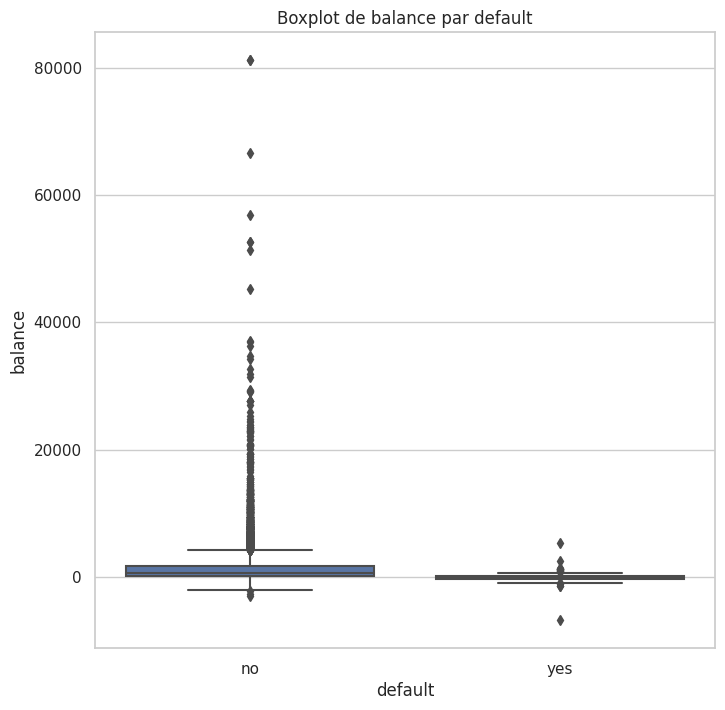

ANOVA pour balance et housing :
                  sum_sq       df          F        PR(>F)
C(housing)  6.900698e+08      1.0  66.722473  3.462159e-16
Residual    1.154211e+11  11160.0        NaN           NaN




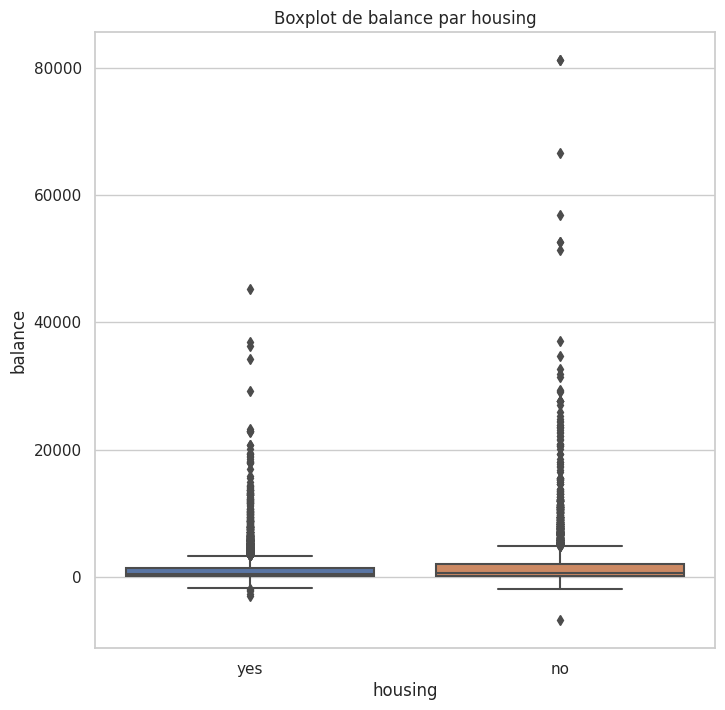

ANOVA pour balance et loan :
                sum_sq       df          F        PR(>F)
C(loan)   8.308048e+08      1.0  80.428129  3.494868e-19
Residual  1.152803e+11  11160.0        NaN           NaN




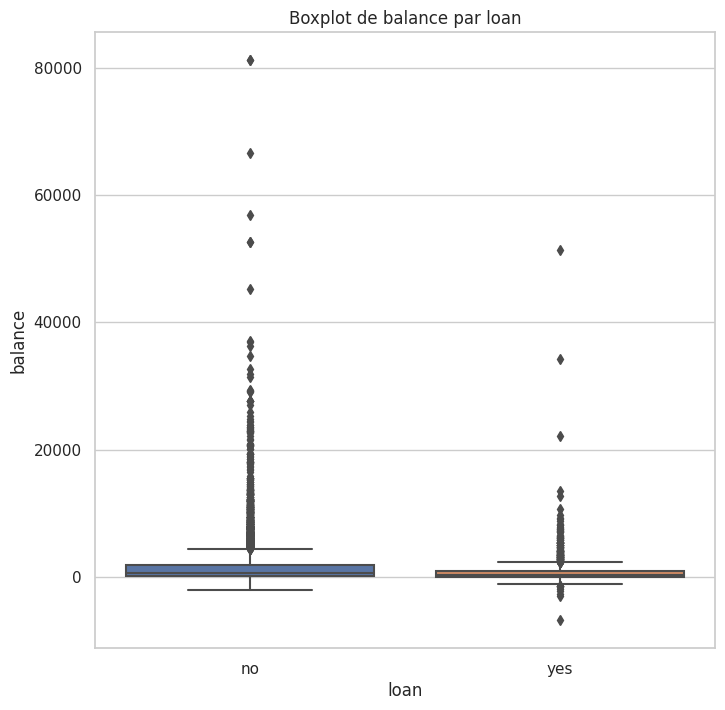

ANOVA pour balance et contact :
                  sum_sq       df          F        PR(>F)
C(contact)  5.916086e+08      2.0  28.574218  4.188355e-13
Residual    1.155195e+11  11159.0        NaN           NaN




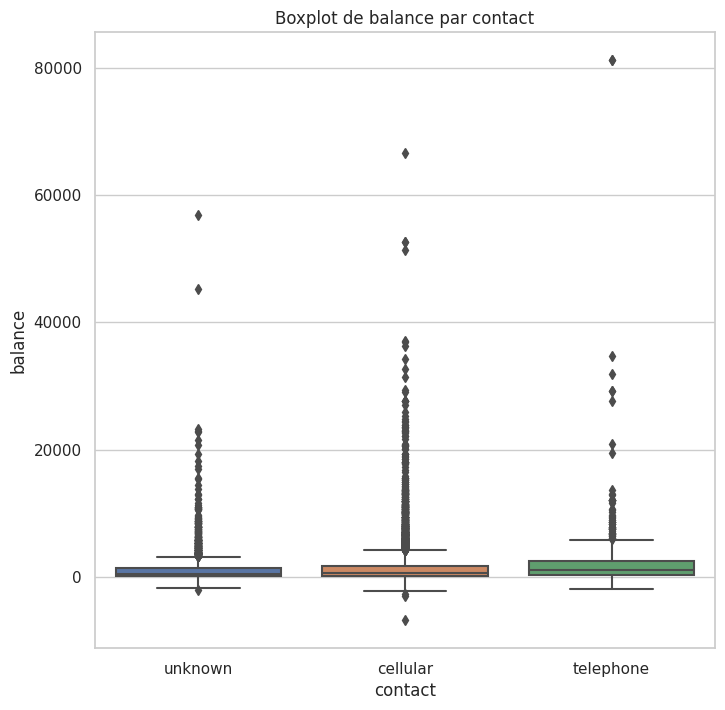

ANOVA pour balance et month :
                sum_sq       df         F        PR(>F)
C(month)  1.795449e+09     11.0  15.92023  1.918024e-31
Residual  1.143157e+11  11150.0       NaN           NaN




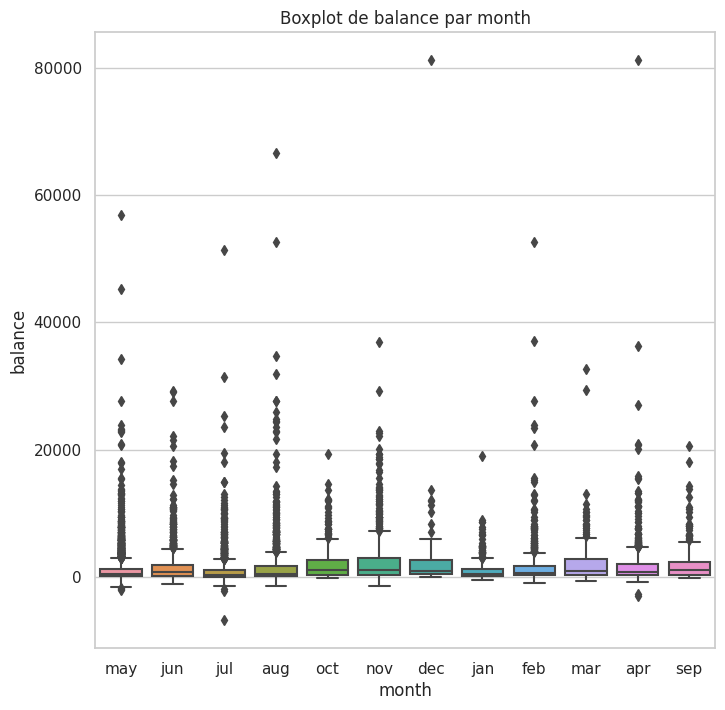

ANOVA pour balance et poutcome :
                   sum_sq       df          F        PR(>F)
C(poutcome)  3.711784e+08      3.0  11.927914  8.548142e-08
Residual     1.157400e+11  11158.0        NaN           NaN




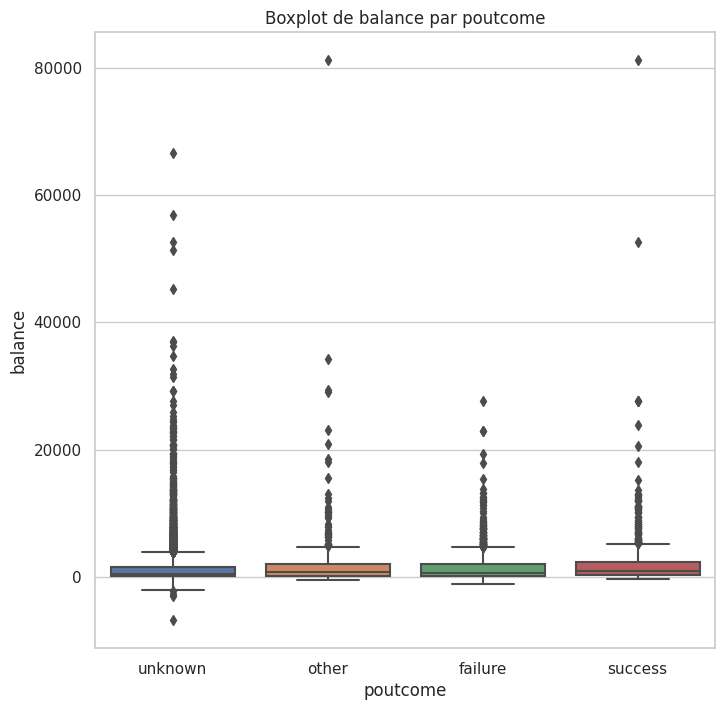

ANOVA pour balance et deposit :
                  sum_sq       df          F        PR(>F)
C(deposit)  7.642258e+08      1.0  73.940086  9.126568e-18
Residual    1.153469e+11  11160.0        NaN           NaN




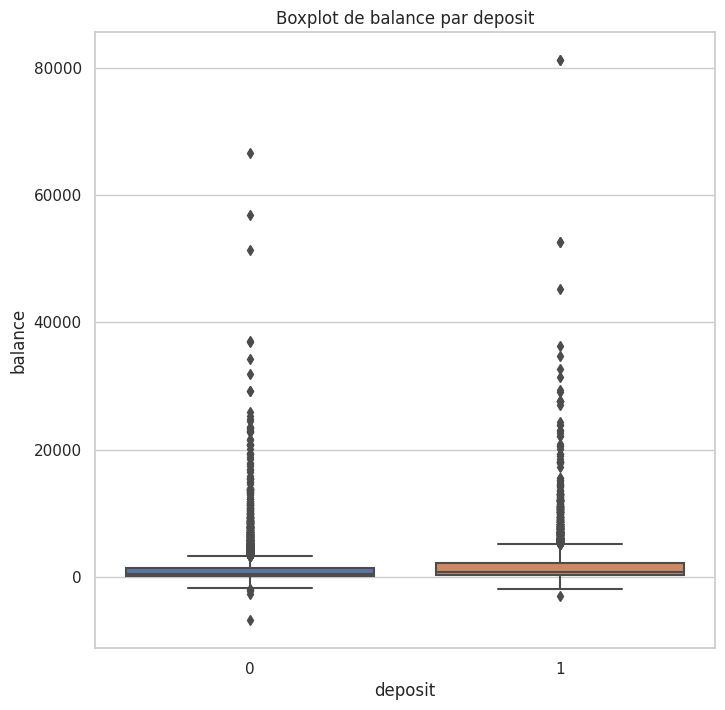

ANOVA pour day et job :
                 sum_sq       df         F    PR(>F)
C(job)      1307.653009     11.0  1.677603  0.071796
Residual  790106.071145  11150.0       NaN       NaN




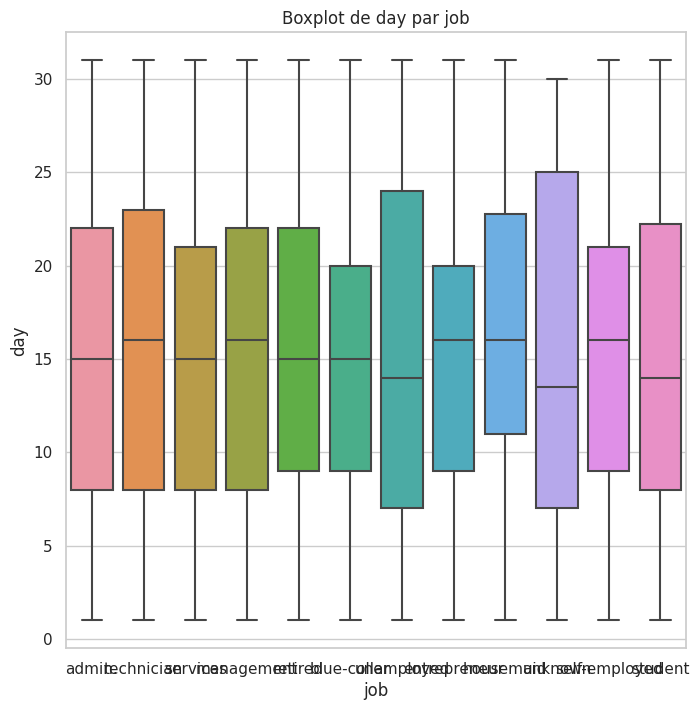

ANOVA pour day et marital :
                   sum_sq       df         F   PR(>F)
C(marital)      12.550466      2.0  0.088483  0.91532
Residual    791401.173688  11159.0       NaN      NaN




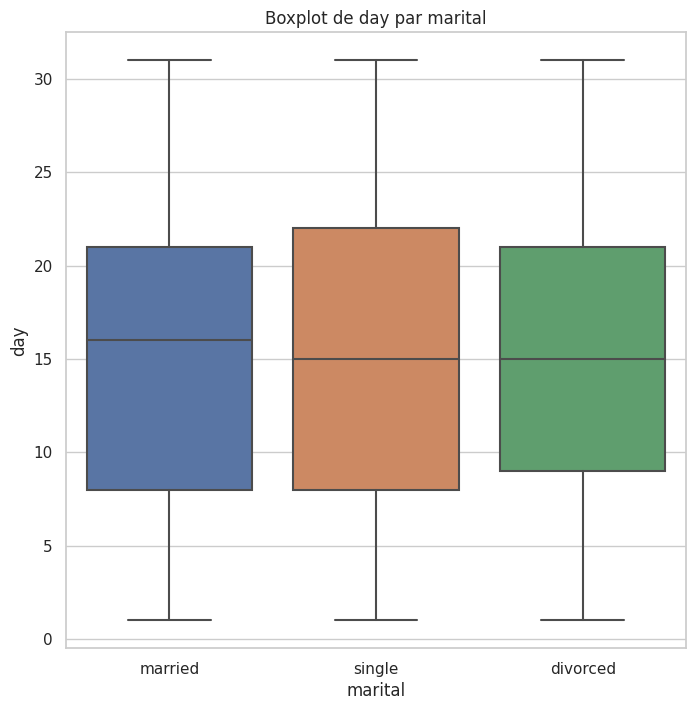

ANOVA pour day et education :
                     sum_sq       df         F    PR(>F)
C(education)     259.084256      3.0  1.217993  0.301387
Residual      791154.639897  11158.0       NaN       NaN




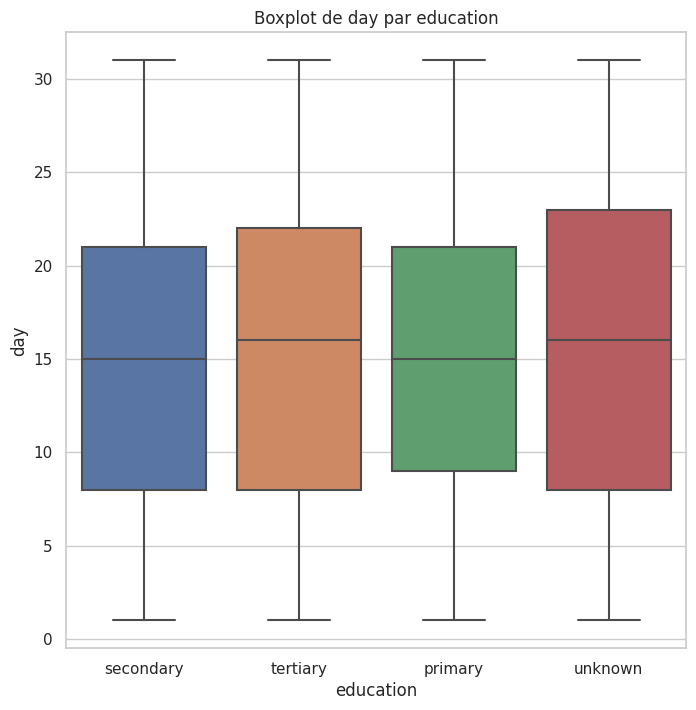

ANOVA pour day et default :
                   sum_sq       df         F    PR(>F)
C(default)     238.001041      1.0  3.357145  0.066941
Residual    791175.723112  11160.0       NaN       NaN




ANOVA pour day et housing :
                   sum_sq       df         F    PR(>F)
C(housing)     172.644545      1.0  2.435052  0.118678
Residual    791241.079608  11160.0       NaN       NaN




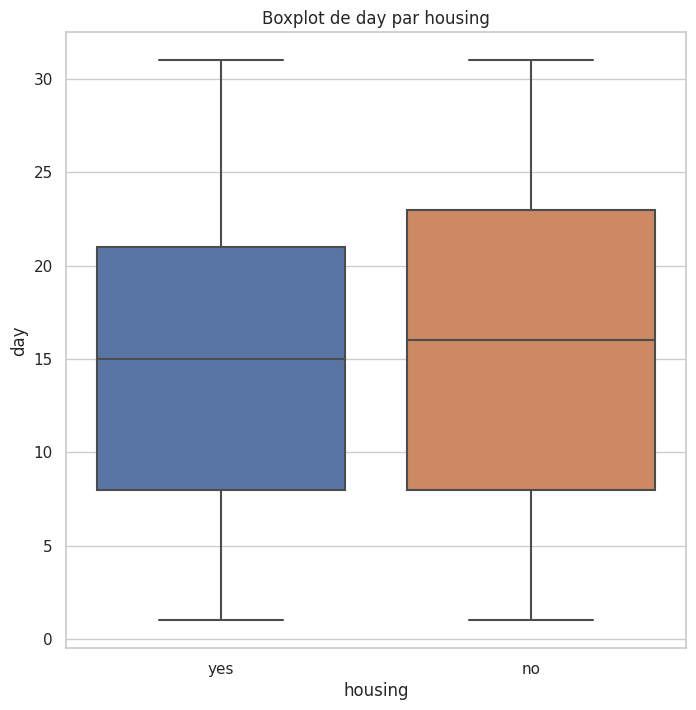

ANOVA pour day et loan :
                 sum_sq       df         F    PR(>F)
C(loan)      236.007966      1.0  3.329023  0.068094
Residual  791177.716187  11160.0       NaN       NaN




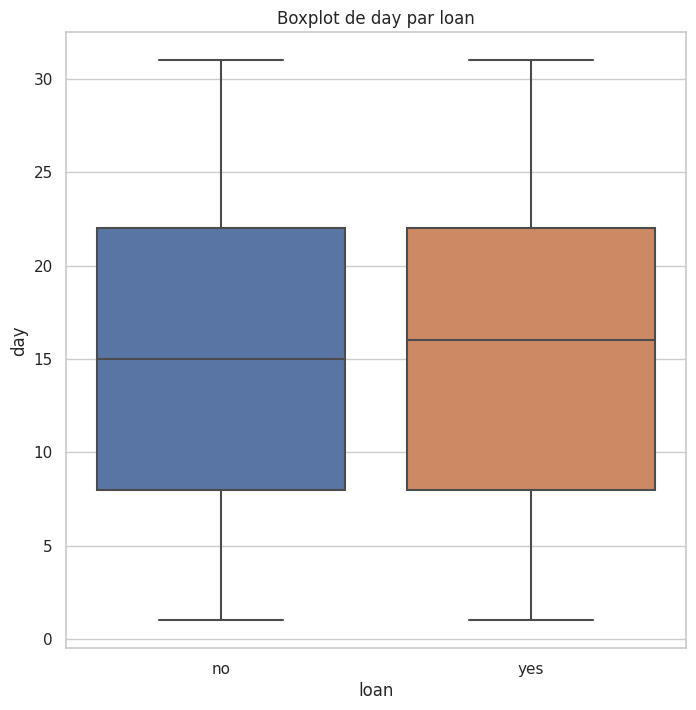

ANOVA pour day et contact :
                   sum_sq       df         F    PR(>F)
C(contact)     194.875831      2.0  1.374221  0.253079
Residual    791218.848322  11159.0       NaN       NaN




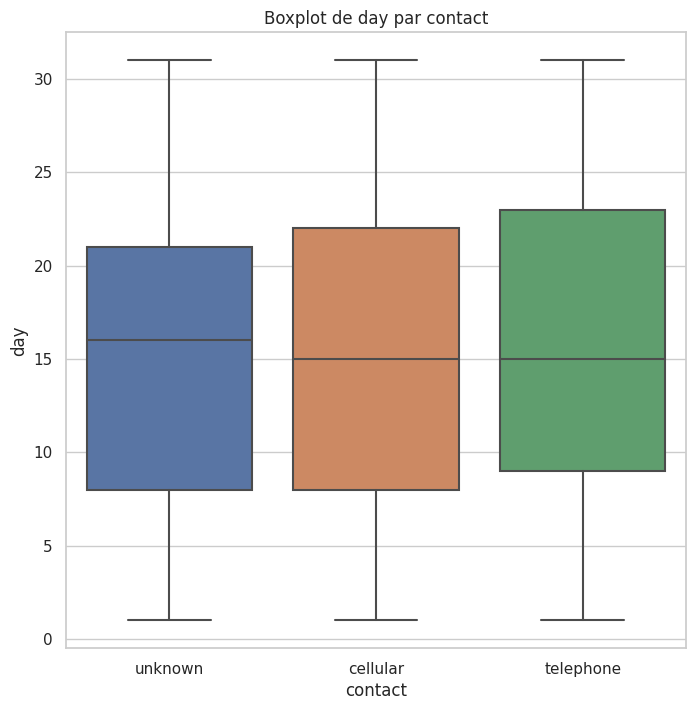

ANOVA pour day et month :
                 sum_sq       df           F  PR(>F)
C(month)  130688.692436     11.0  200.493102     0.0
Residual  660725.031717  11150.0         NaN     NaN




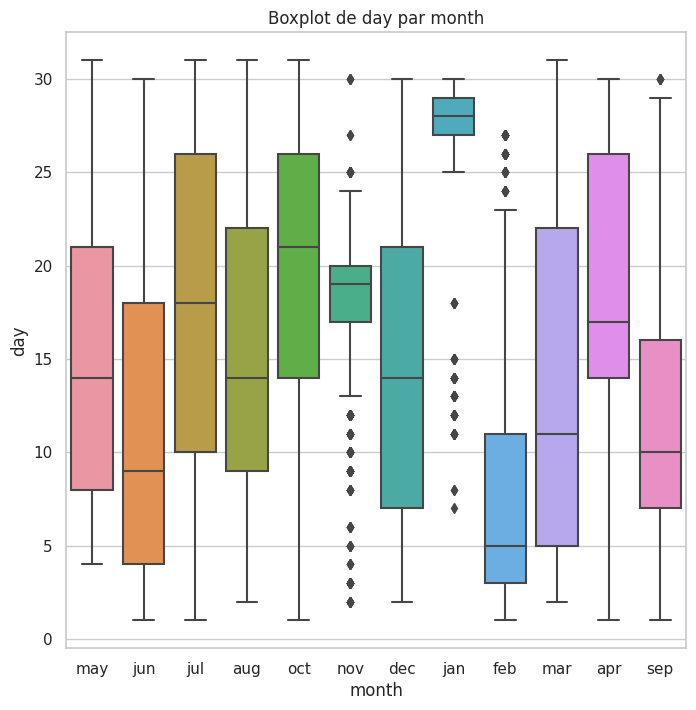

ANOVA pour day et poutcome :
                    sum_sq       df          F        PR(>F)
C(poutcome)    6117.817180      3.0  28.975321  1.180818e-18
Residual     785295.906974  11158.0        NaN           NaN




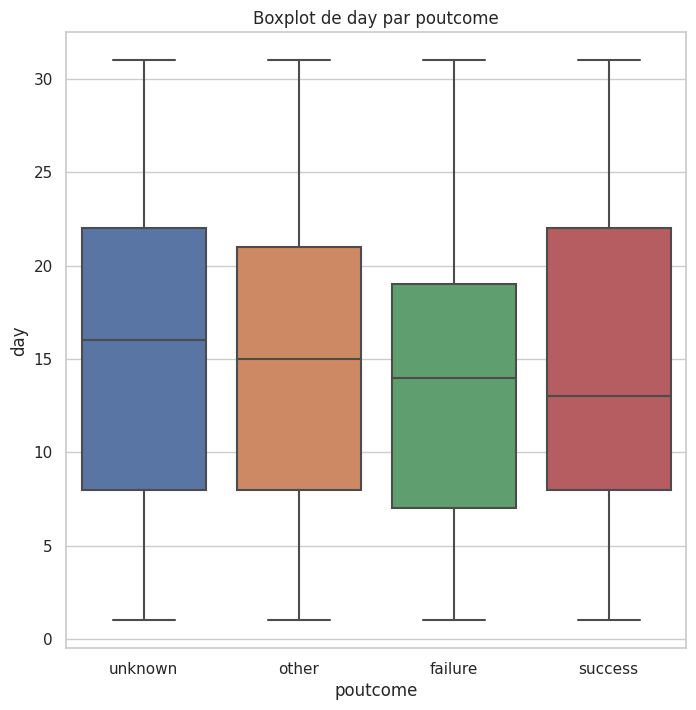

ANOVA pour day et deposit :
                   sum_sq       df          F        PR(>F)
C(deposit)    2510.839311      1.0  35.518905  2.602203e-09
Residual    788902.884842  11160.0        NaN           NaN




ANOVA pour duration et job :
                sum_sq       df         F    PR(>F)
C(job)    4.659088e+06     11.0  3.523764  0.000059
Residual  1.340220e+09  11150.0       NaN       NaN




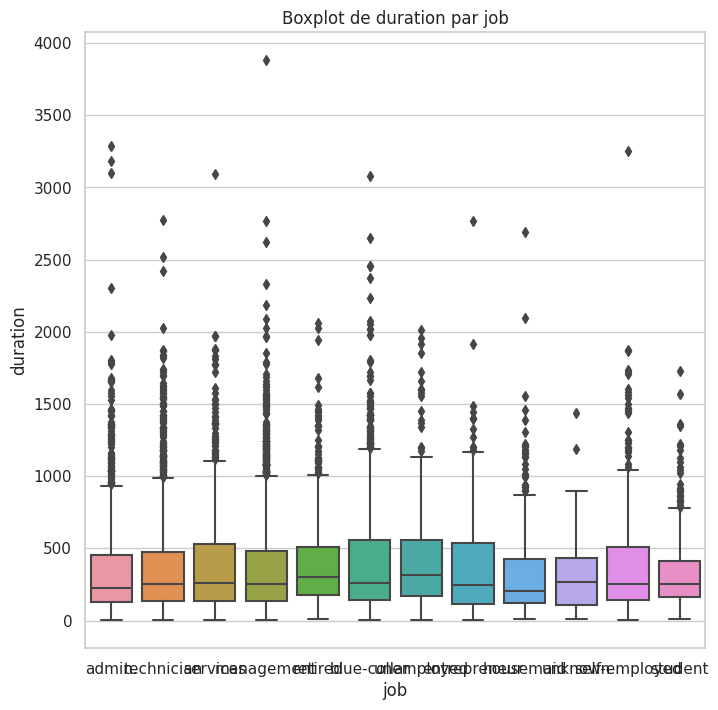

ANOVA pour duration et marital :
                  sum_sq       df         F    PR(>F)
C(marital)  1.825245e+06      2.0  7.582684  0.000512
Residual    1.343054e+09  11159.0       NaN       NaN




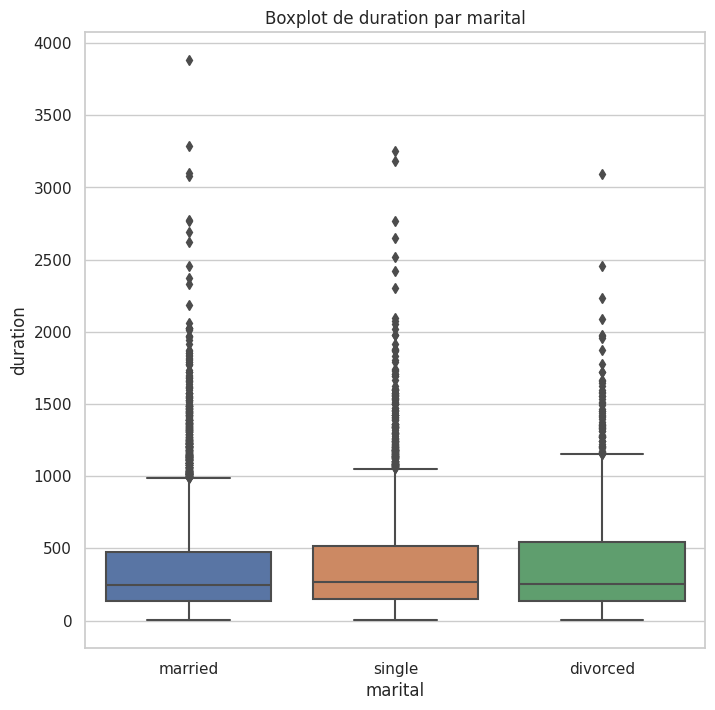

ANOVA pour duration et education :
                    sum_sq       df         F    PR(>F)
C(education)  5.853093e+05      3.0  1.619408  0.182543
Residual      1.344294e+09  11158.0       NaN       NaN




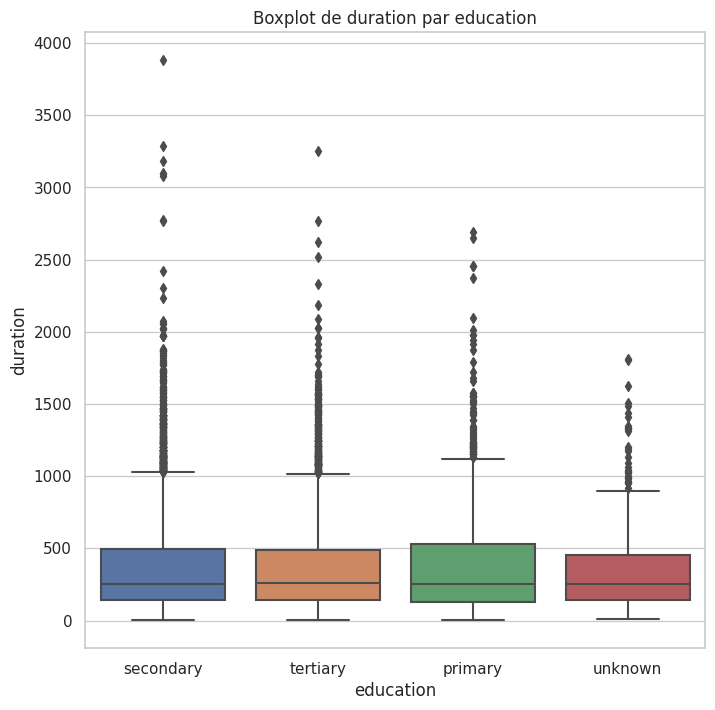

ANOVA pour duration et default :
                  sum_sq       df         F    PR(>F)
C(default)  1.280974e+05      1.0  1.063072  0.302538
Residual    1.344751e+09  11160.0       NaN       NaN




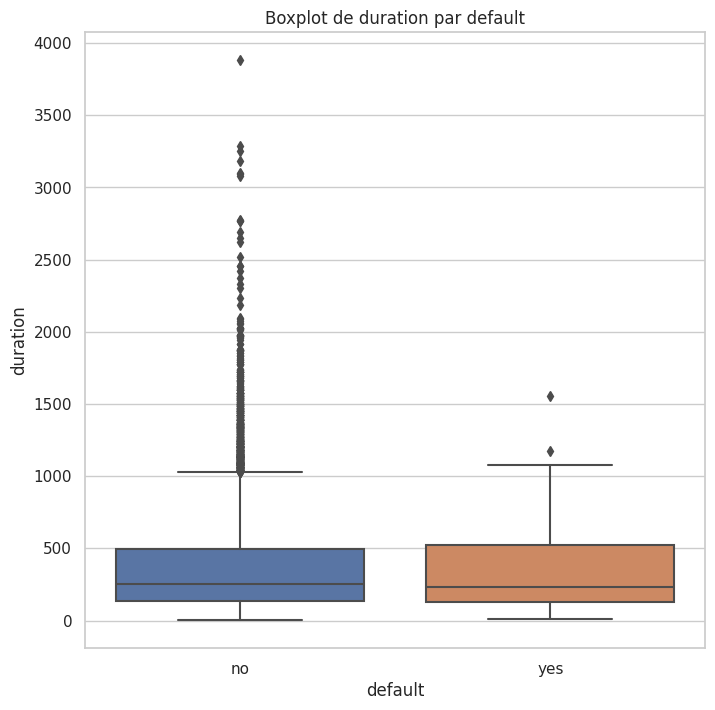

ANOVA pour duration et housing :
                  sum_sq       df          F    PR(>F)
C(housing)  1.652269e+06      1.0  13.727627  0.000212
Residual    1.343227e+09  11160.0        NaN       NaN




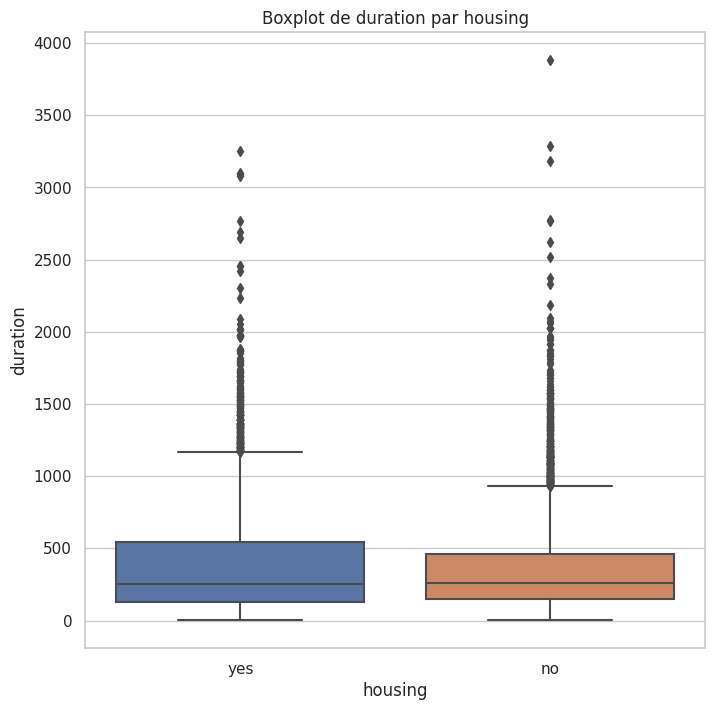

ANOVA pour duration et loan :
                sum_sq       df         F    PR(>F)
C(loan)   4.924919e+03      1.0  0.040868  0.839797
Residual  1.344875e+09  11160.0       NaN       NaN




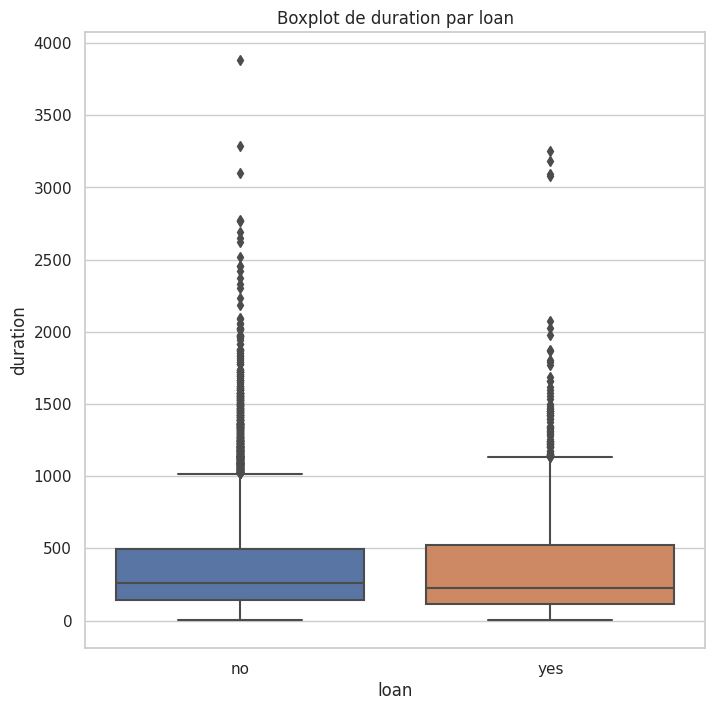

ANOVA pour duration et contact :
                  sum_sq       df         F    PR(>F)
C(contact)  6.663166e+05      2.0  2.765717  0.062974
Residual    1.344213e+09  11159.0       NaN       NaN




ANOVA pour duration et month :
                sum_sq       df         F        PR(>F)
C(month)  7.914167e+06     11.0  6.000221  7.505699e-10
Residual  1.336965e+09  11150.0       NaN           NaN




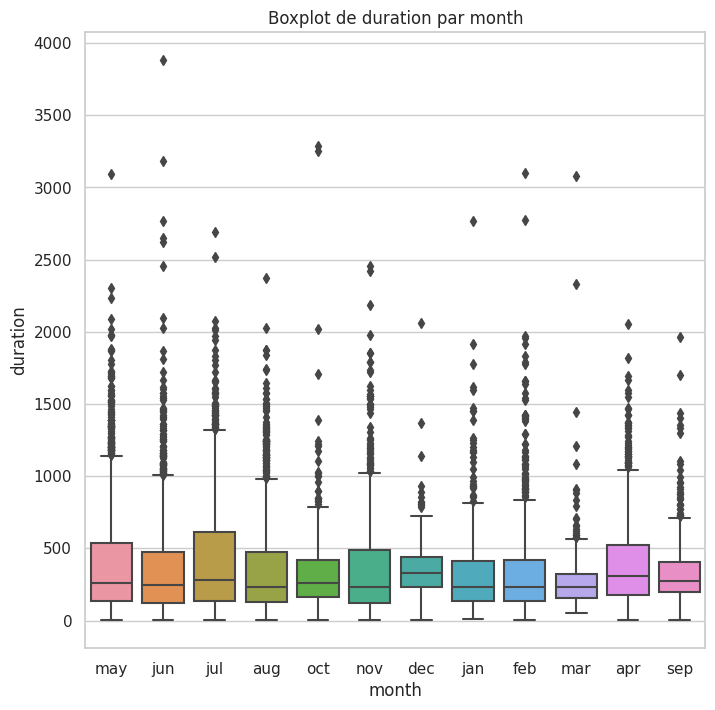

ANOVA pour duration et poutcome :
                   sum_sq       df         F    PR(>F)
C(poutcome)  2.761148e+06      3.0  7.651807  0.000042
Residual     1.342118e+09  11158.0       NaN       NaN




ANOVA pour duration et deposit :
                  sum_sq       df            F  PR(>F)
C(deposit)  2.746662e+08      1.0  2864.172247     0.0
Residual    1.070213e+09  11160.0          NaN     NaN




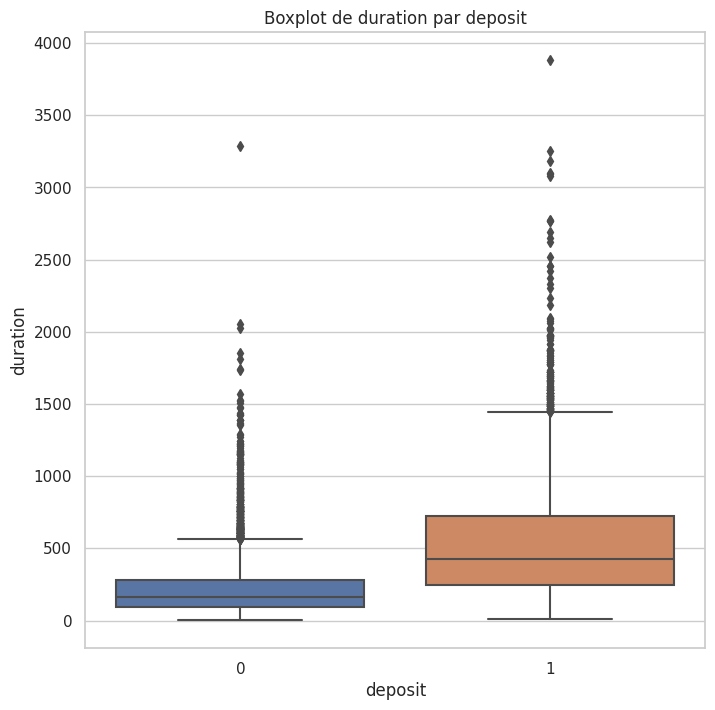

ANOVA pour campaign et job :
                sum_sq       df         F    PR(>F)
C(job)      310.778822     11.0  3.823532  0.000016
Residual  82388.929564  11150.0       NaN       NaN




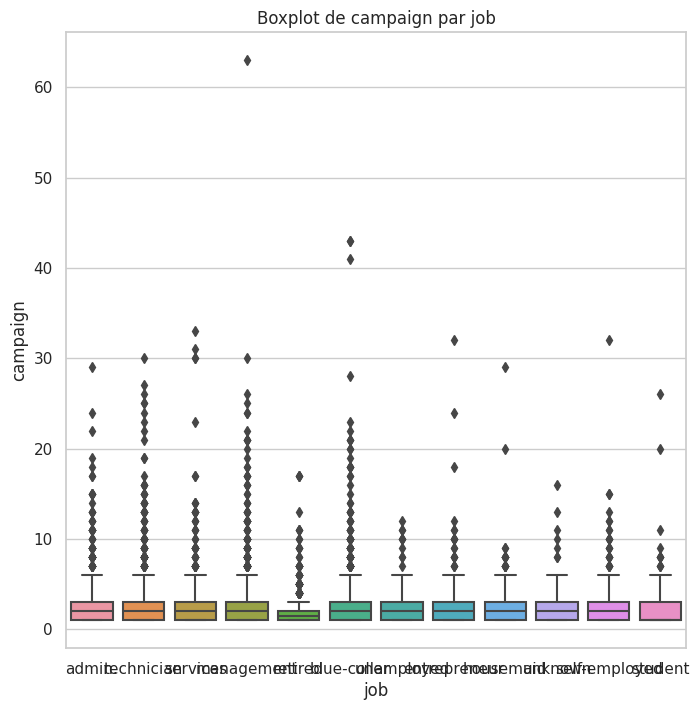

ANOVA pour campaign et marital :
                  sum_sq       df          F        PR(>F)
C(marital)    205.282802      2.0  13.884276  9.497855e-07
Residual    82494.425584  11159.0        NaN           NaN




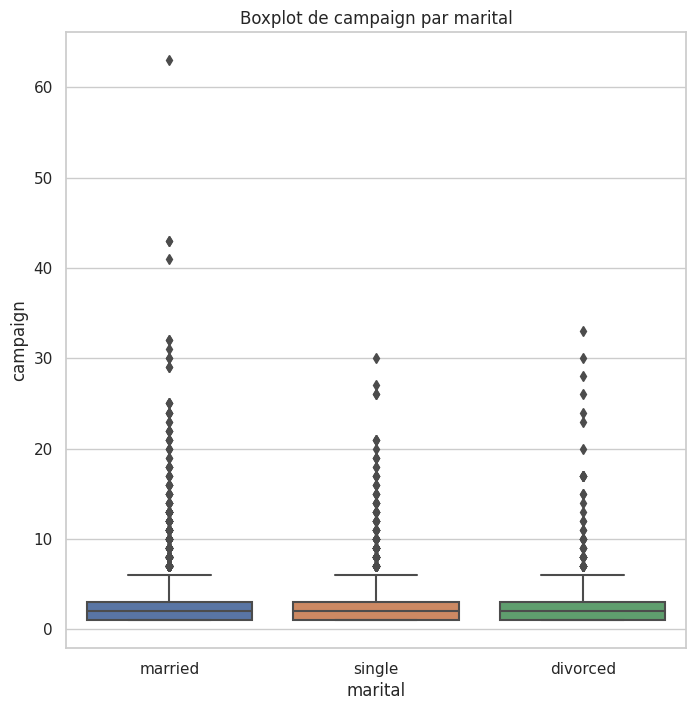

ANOVA pour campaign et education :
                    sum_sq       df         F    PR(>F)
C(education)     51.388887      3.0  2.312599  0.073967
Residual      82648.319499  11158.0       NaN       NaN




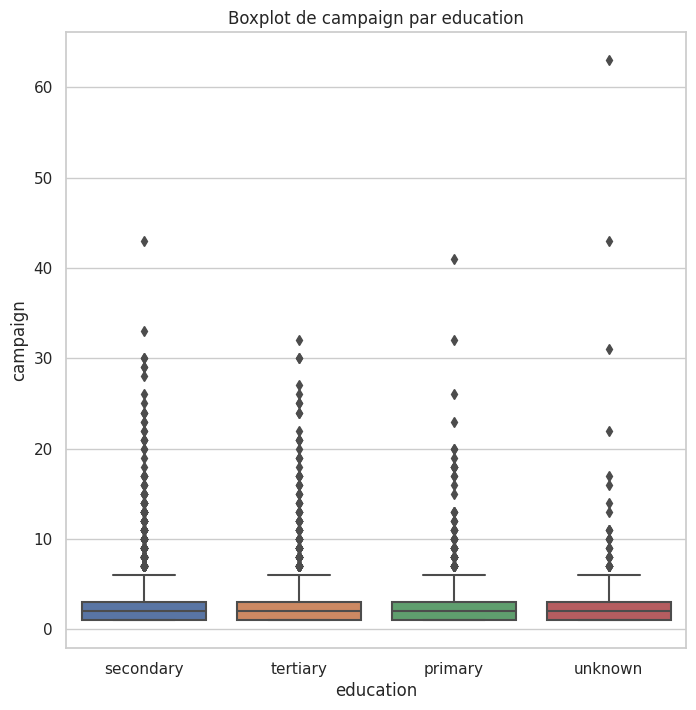

ANOVA pour campaign et default :
                  sum_sq       df          F    PR(>F)
C(default)     79.347648      1.0  10.717936  0.001064
Residual    82620.360738  11160.0        NaN       NaN




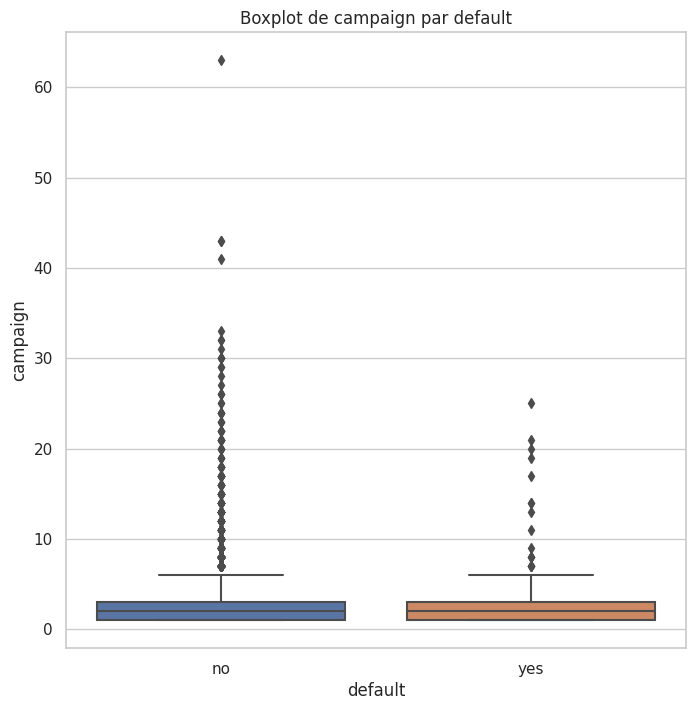

ANOVA pour campaign et housing :
                  sum_sq       df         F   PR(>F)
C(housing)      3.668130      1.0  0.495022  0.48171
Residual    82696.040256  11160.0       NaN      NaN




ANOVA pour campaign et loan :
                sum_sq       df          F    PR(>F)
C(loan)      99.702748      1.0  13.470734  0.000243
Residual  82600.005637  11160.0        NaN       NaN




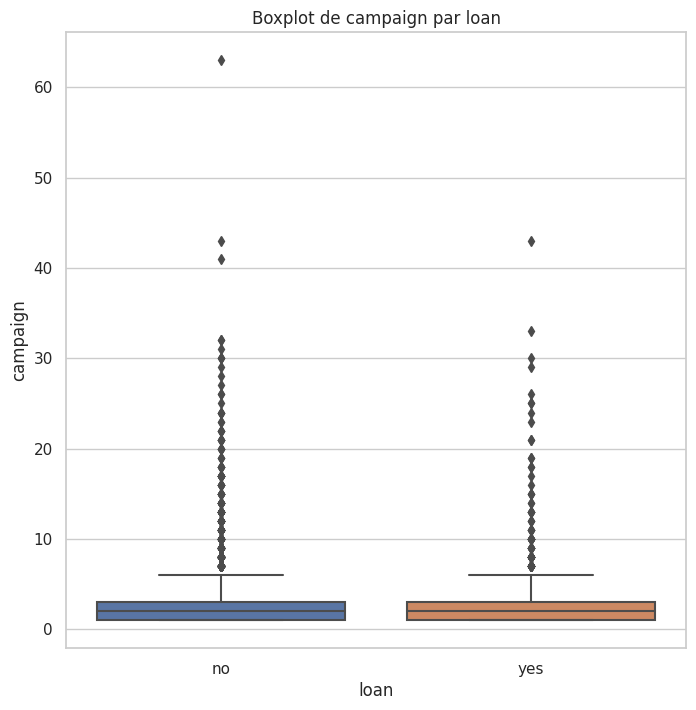

ANOVA pour campaign et contact :
                  sum_sq       df          F        PR(>F)
C(contact)    403.821193      2.0  27.378286  1.376698e-12
Residual    82295.887193  11159.0        NaN           NaN




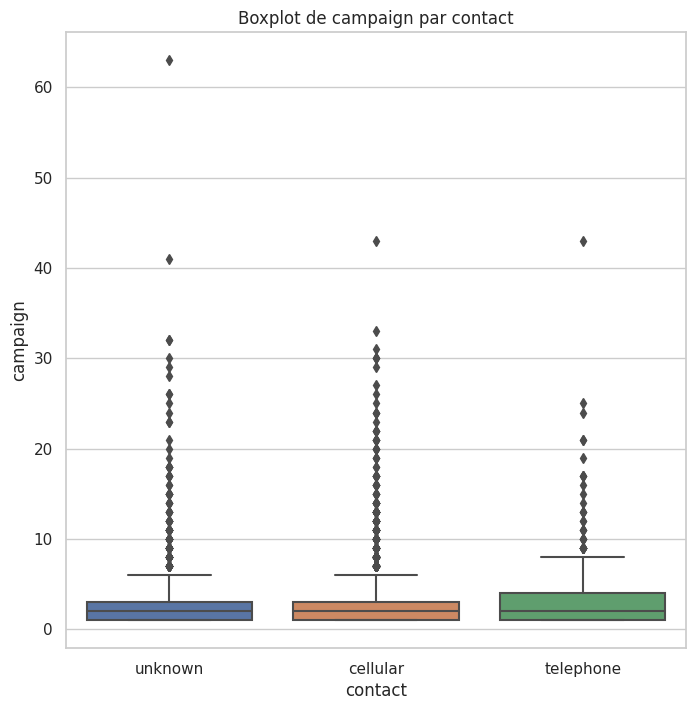

ANOVA pour campaign et month :
                sum_sq       df          F         PR(>F)
C(month)   4554.064468     11.0  59.071307  2.186311e-128
Residual  78145.643917  11150.0        NaN            NaN




ANOVA pour campaign et poutcome :
                   sum_sq       df          F        PR(>F)
C(poutcome)   1510.338673      3.0  69.189513  2.510727e-44
Residual     81189.369713  11158.0        NaN           NaN




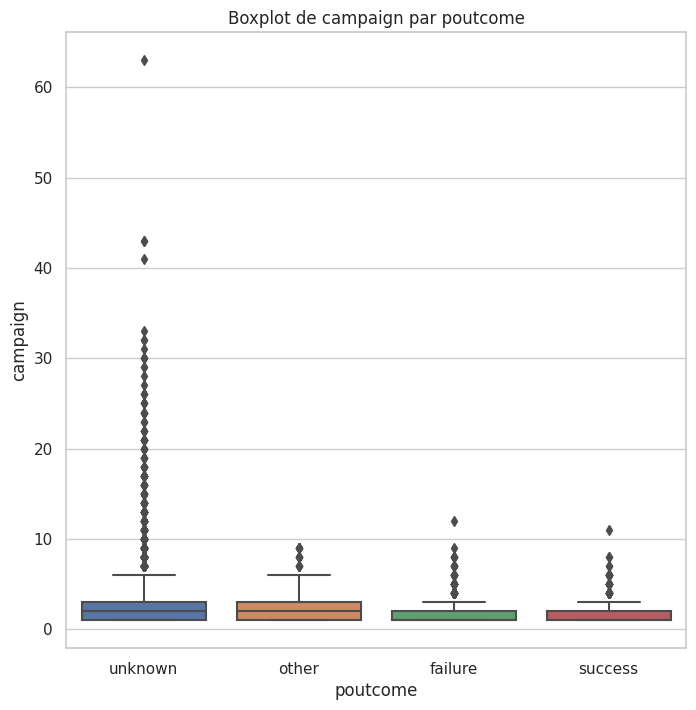

ANOVA pour campaign et deposit :
                  sum_sq       df           F        PR(>F)
C(deposit)   1356.664166      1.0  186.129893  4.831324e-42
Residual    81343.044219  11160.0         NaN           NaN




ANOVA pour pdays et job :
                sum_sq       df         F        PR(>F)
C(job)    7.196650e+05     11.0  5.555955  6.111852e-09
Residual  1.312967e+08  11150.0       NaN           NaN




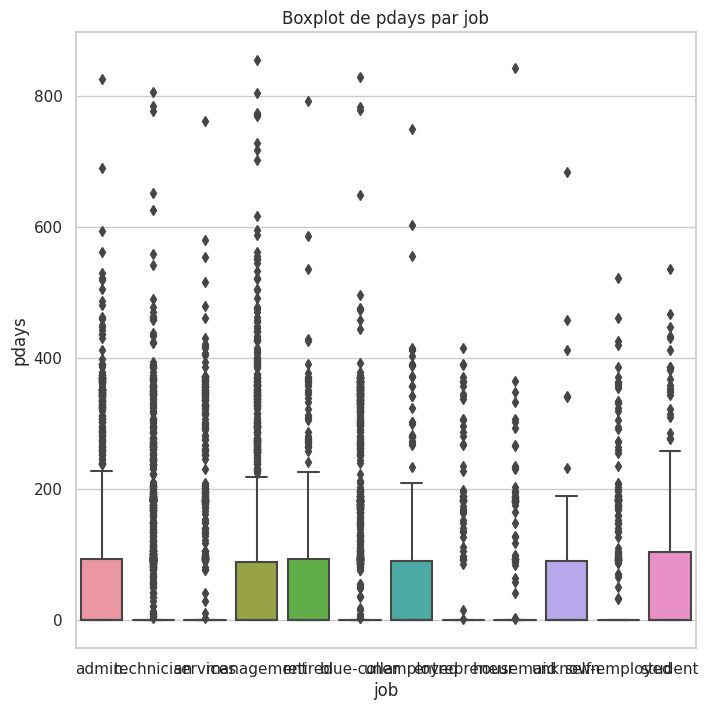

ANOVA pour pdays et marital :
                  sum_sq       df         F    PR(>F)
C(marital)  1.379194e+05      2.0  5.835082  0.002932
Residual    1.318785e+08  11159.0       NaN       NaN




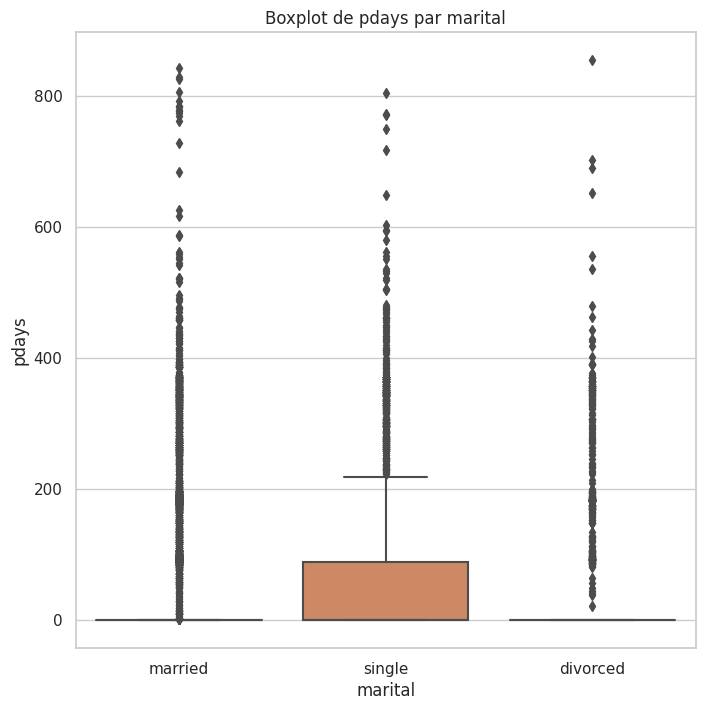

ANOVA pour pdays et education :
                    sum_sq       df         F    PR(>F)
C(education)  2.267469e+05      3.0  6.399194  0.000251
Residual      1.317896e+08  11158.0       NaN       NaN




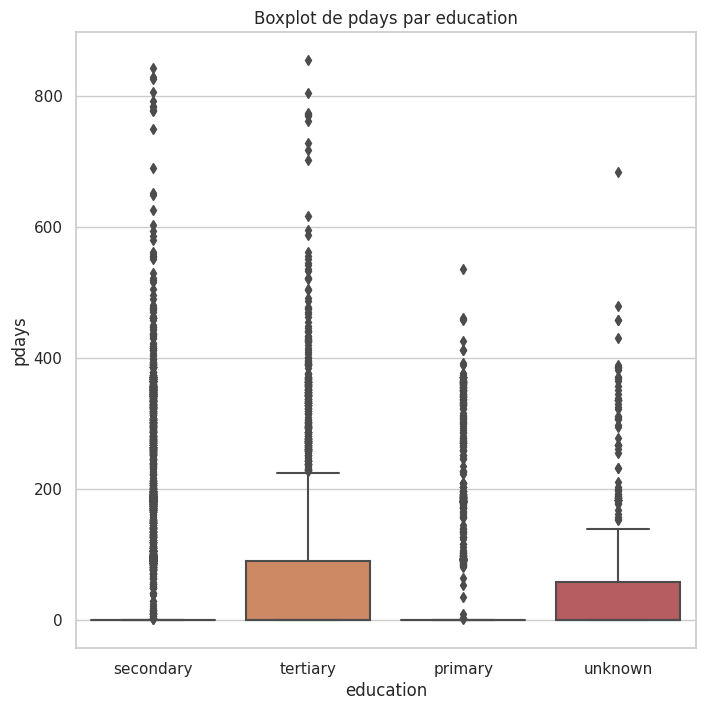

ANOVA pour pdays et default :
                  sum_sq       df          F    PR(>F)
C(default)  1.737853e+05      1.0  14.710297  0.000126
Residual    1.318426e+08  11160.0        NaN       NaN




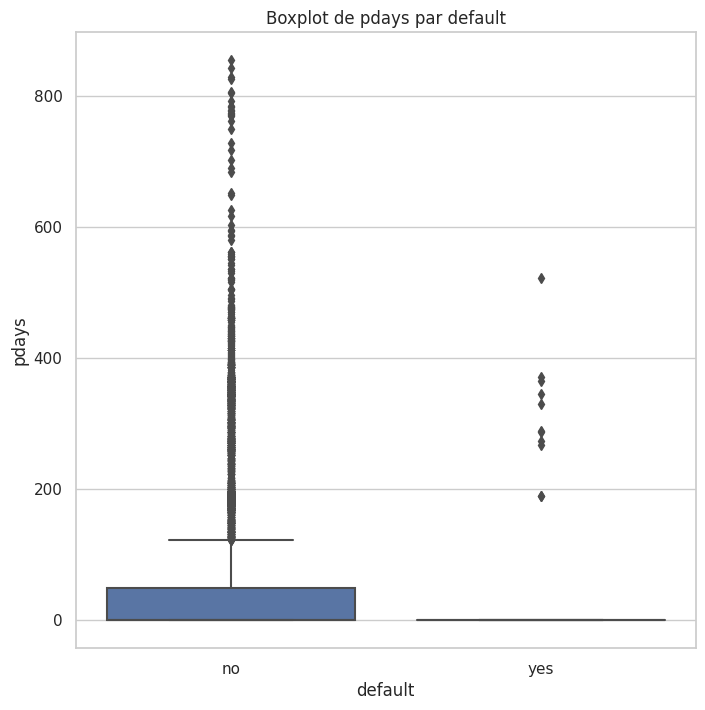

ANOVA pour pdays et housing :
                  sum_sq       df          F        PR(>F)
C(housing)  5.491724e+05      1.0  46.618201  9.073345e-12
Residual    1.314672e+08  11160.0        NaN           NaN




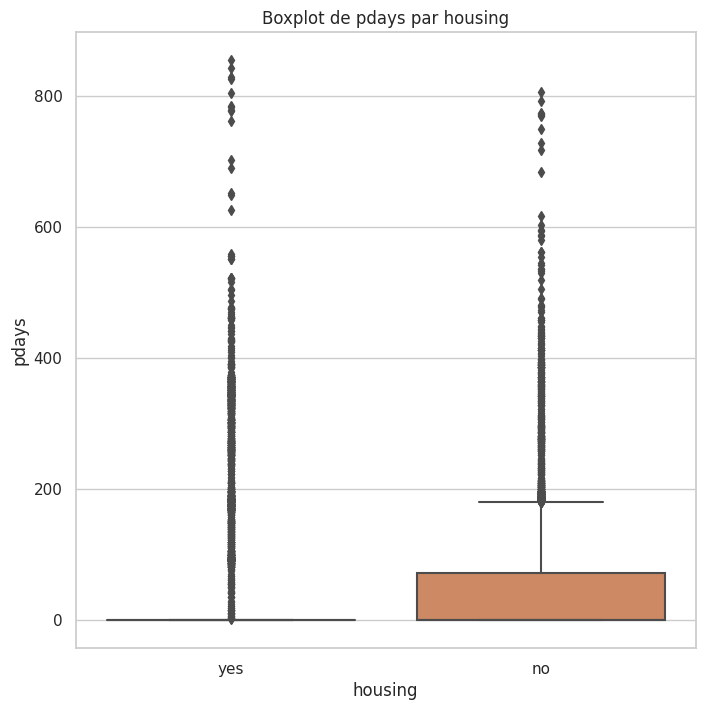

ANOVA pour pdays et loan :
                sum_sq       df          F   PR(>F)
C(loan)   1.221305e+05      1.0  10.333862  0.00131
Residual  1.318942e+08  11160.0        NaN      NaN




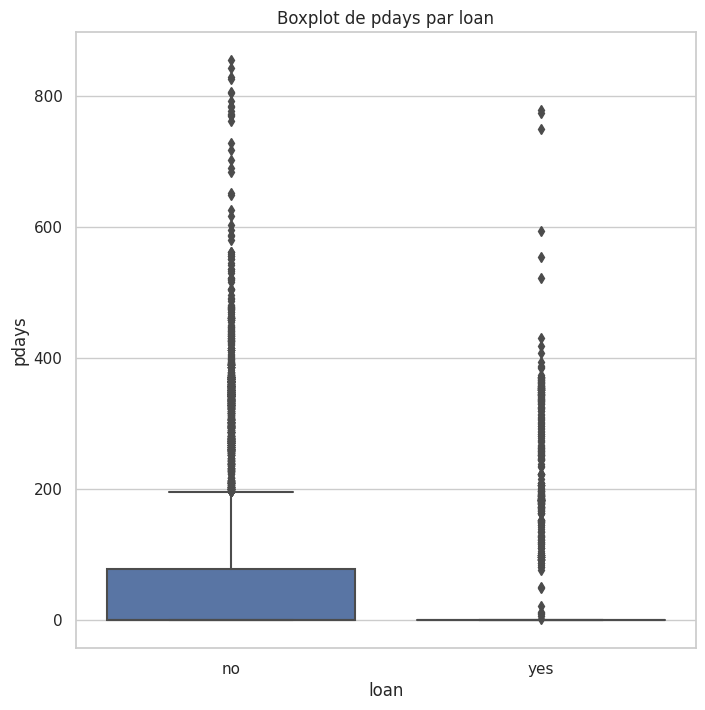

ANOVA pour pdays et contact :
                  sum_sq       df           F         PR(>F)
C(contact)  7.130855e+06      2.0  318.584652  2.794749e-135
Residual    1.248855e+08  11159.0         NaN            NaN




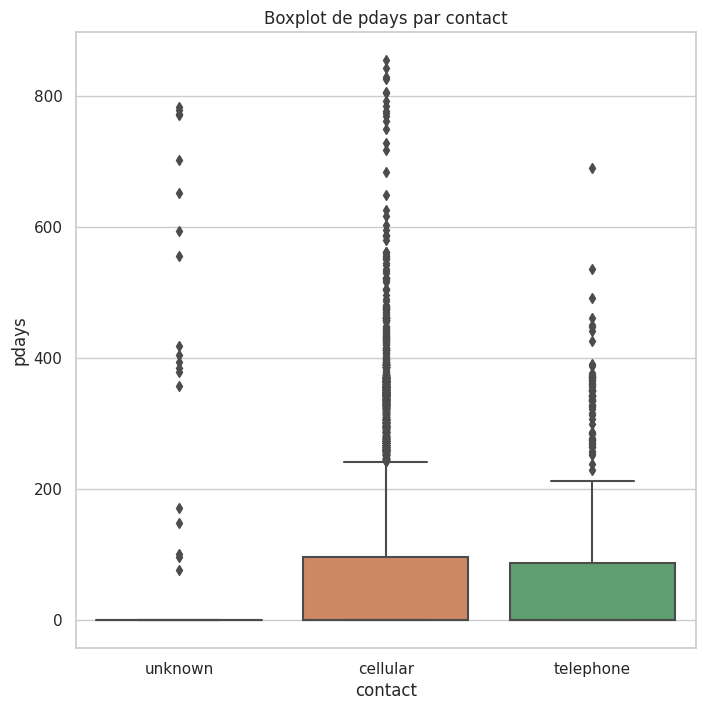

ANOVA pour pdays et month :
                sum_sq       df          F         PR(>F)
C(month)  6.527701e+06     11.0  52.727592  3.096100e-114
Residual  1.254887e+08  11150.0        NaN            NaN




ANOVA pour pdays et poutcome :
                   sum_sq       df            F  PR(>F)
C(poutcome)  9.304739e+07      3.0  8880.762937     0.0
Residual     3.896898e+07  11158.0          NaN     NaN




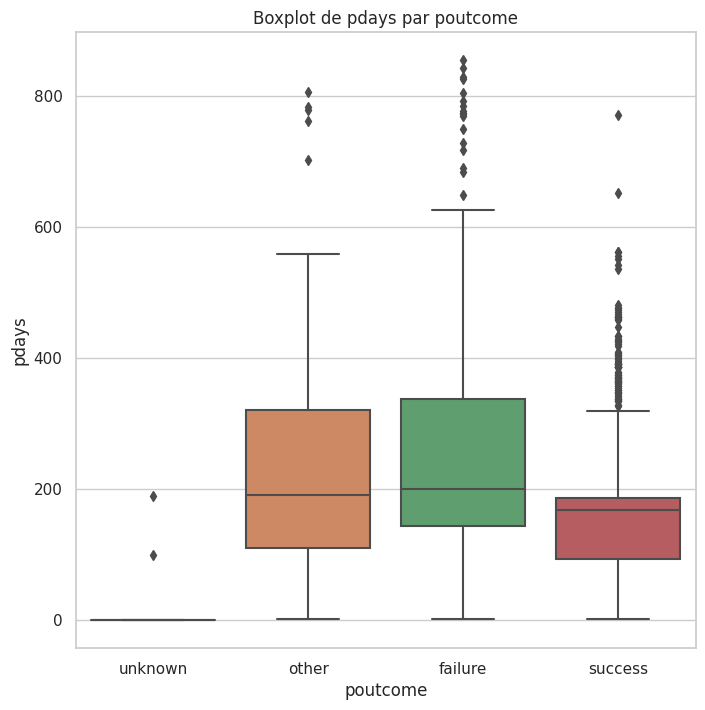

ANOVA pour pdays et deposit :
                  sum_sq       df           F        PR(>F)
C(deposit)  3.033775e+06      1.0  262.492195  2.271607e-58
Residual    1.289826e+08  11160.0         NaN           NaN




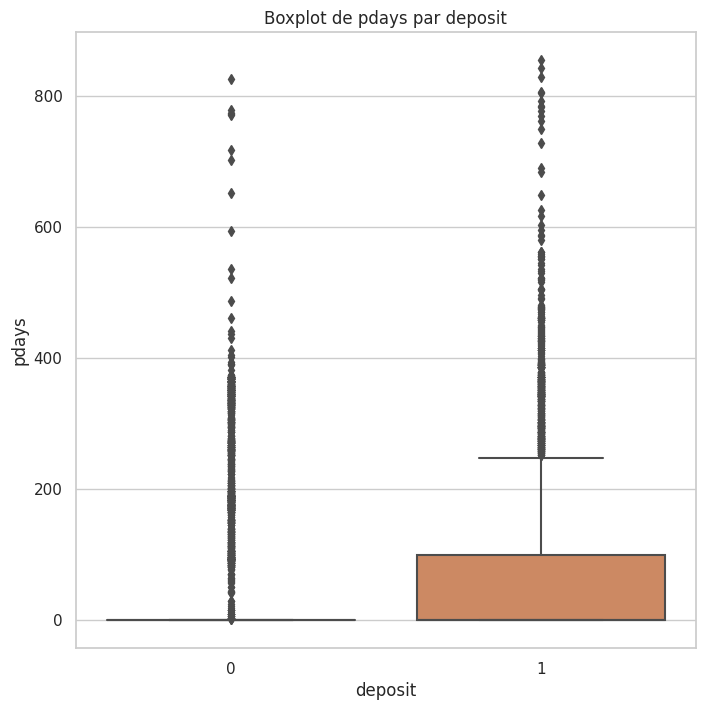

ANOVA pour previous et job :
                sum_sq       df         F        PR(>F)
C(job)      304.504550     11.0  5.291786  2.101699e-08
Residual  58327.544277  11150.0       NaN           NaN




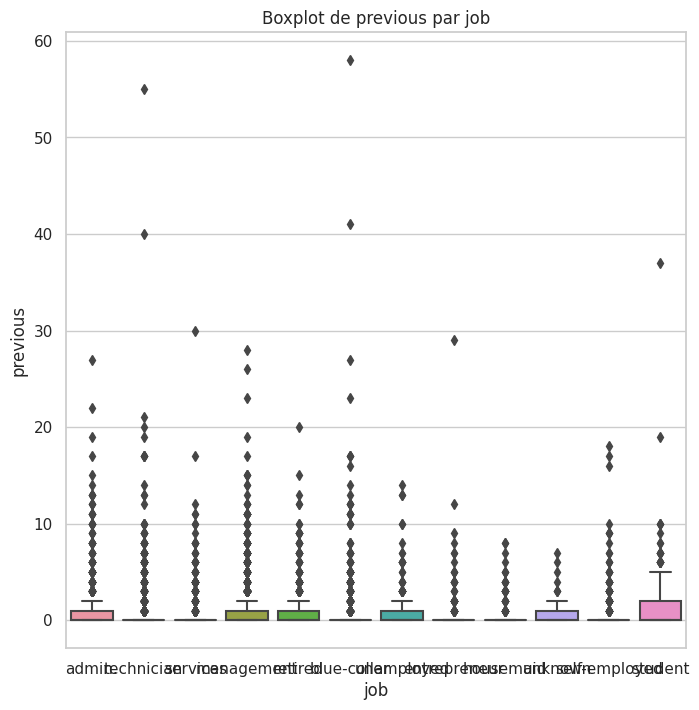

ANOVA pour previous et marital :
                  sum_sq       df         F    PR(>F)
C(marital)     60.037973      2.0  5.719146  0.003292
Residual    58572.010854  11159.0       NaN       NaN




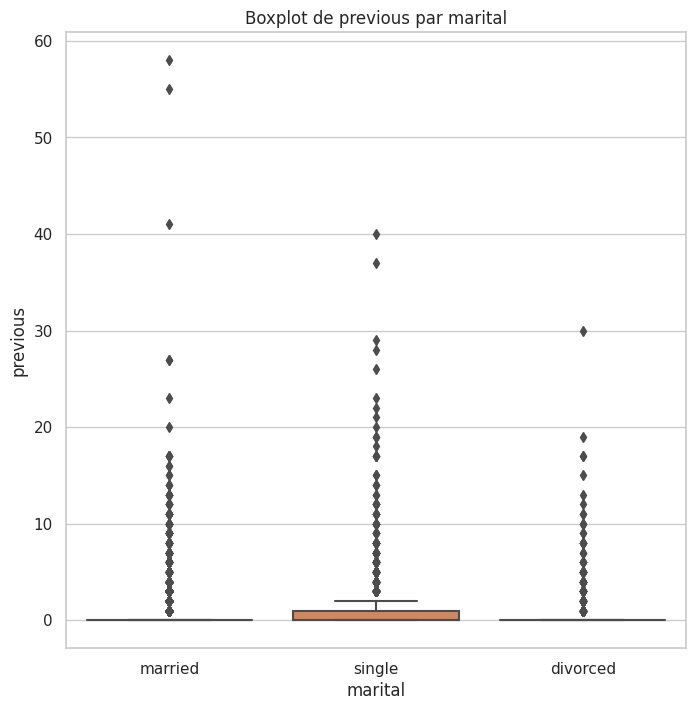

ANOVA pour previous et education :
                    sum_sq       df         F    PR(>F)
C(education)     71.009714      3.0  4.509975  0.003633
Residual      58561.039112  11158.0       NaN       NaN




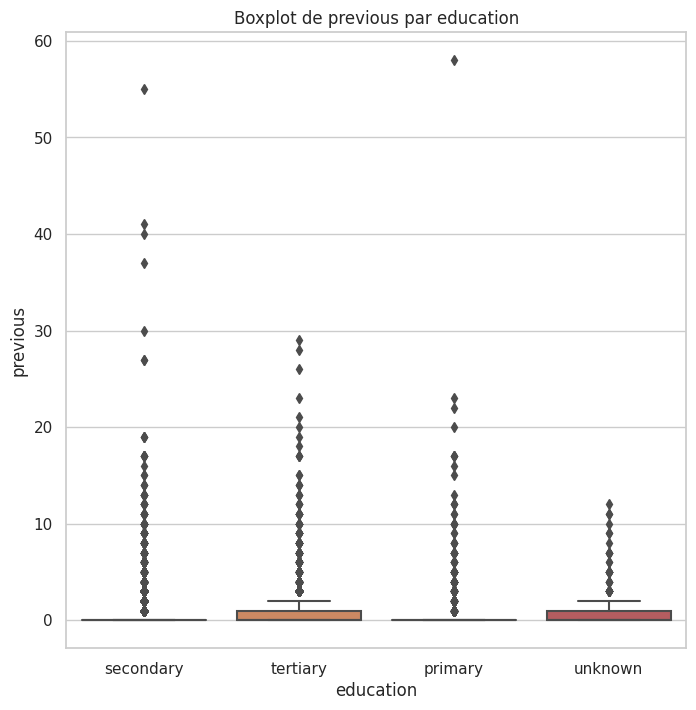

ANOVA pour previous et default :
                  sum_sq       df          F    PR(>F)
C(default)     72.951085      1.0  13.902777  0.000193
Residual    58559.097742  11160.0        NaN       NaN




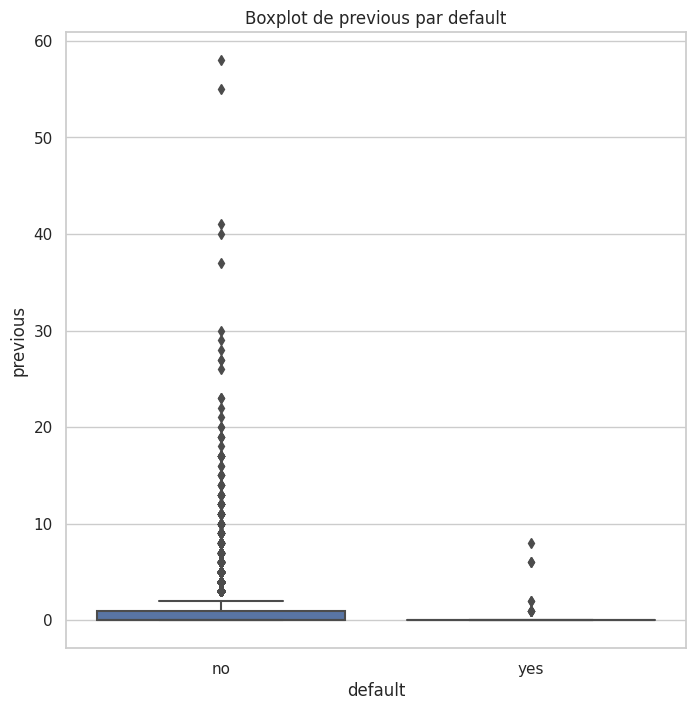

ANOVA pour previous et housing :
                  sum_sq       df        F    PR(>F)
C(housing)      0.041401      1.0  0.00788  0.929266
Residual    58632.007425  11160.0      NaN       NaN




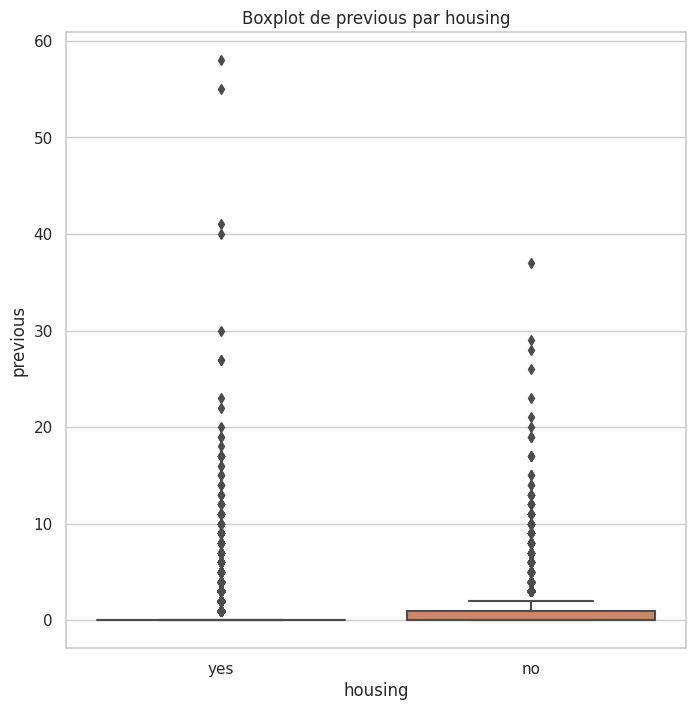

ANOVA pour previous et loan :
                sum_sq       df         F    PR(>F)
C(loan)      30.127860      1.0  5.737473  0.016623
Residual  58601.920967  11160.0       NaN       NaN




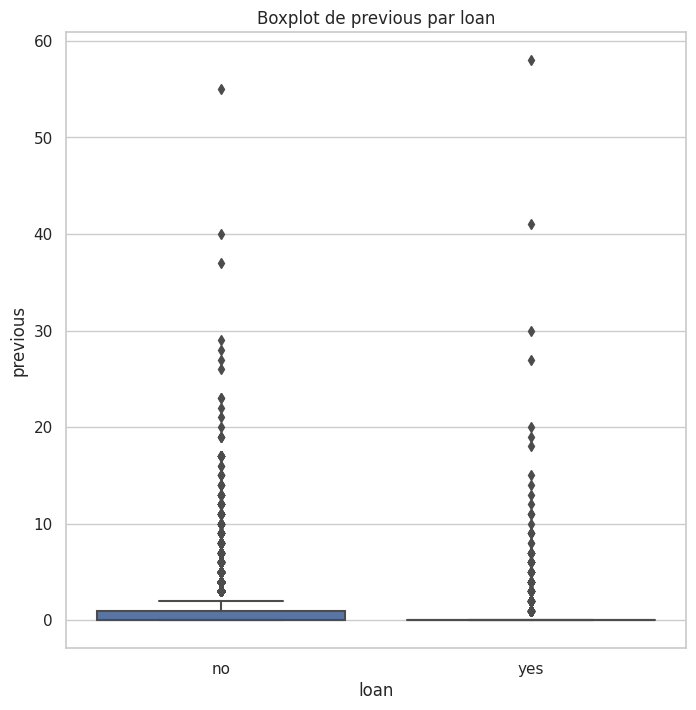

ANOVA pour previous et contact :
                  sum_sq       df           F        PR(>F)
C(contact)   1877.601353      2.0  184.586005  1.357741e-79
Residual    56754.447473  11159.0         NaN           NaN




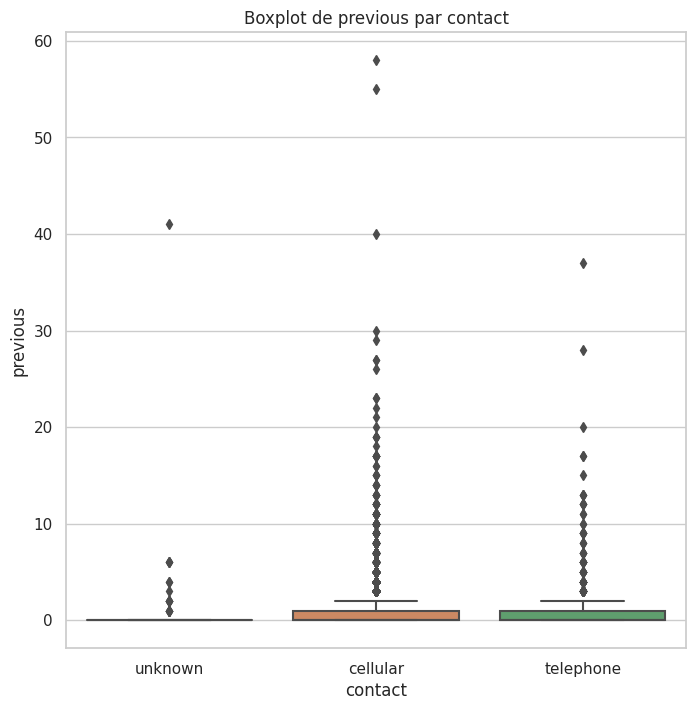

ANOVA pour previous et month :
                sum_sq       df          F        PR(>F)
C(month)   1760.885550     11.0  31.384933  2.960043e-66
Residual  56871.163276  11150.0        NaN           NaN




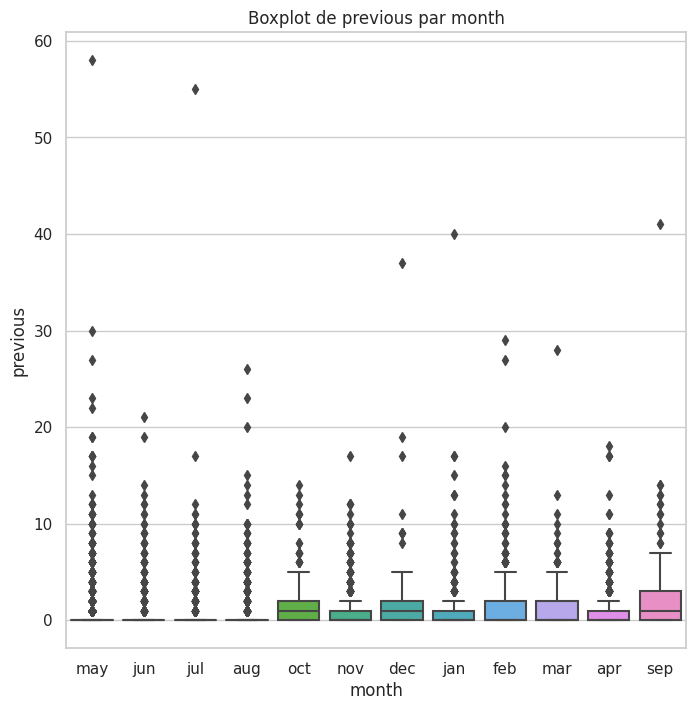

ANOVA pour previous et poutcome :
                   sum_sq       df            F  PR(>F)
C(poutcome)  23220.761870      3.0  2438.932924     0.0
Residual     35411.286956  11158.0          NaN     NaN




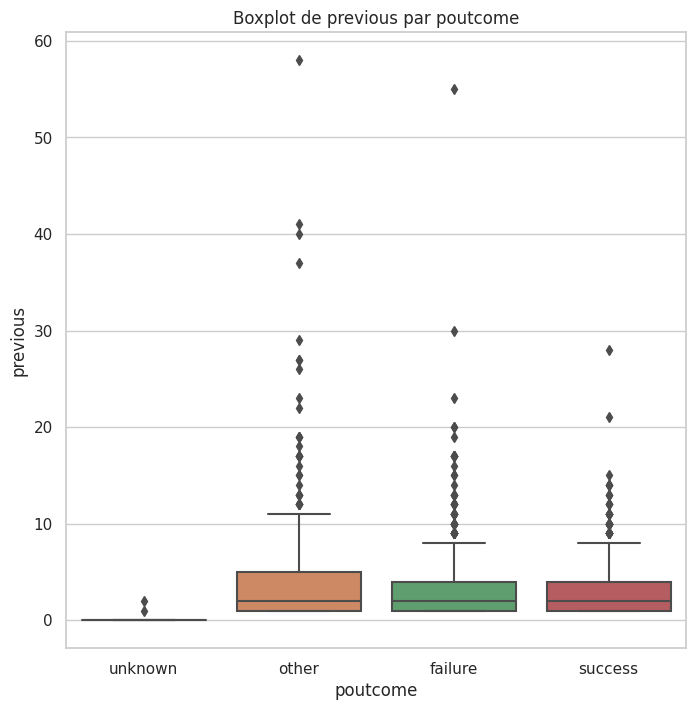

ANOVA pour previous et deposit :
                  sum_sq       df           F        PR(>F)
C(deposit)   1147.007675      1.0  222.677159  7.125338e-50
Residual    57485.041151  11160.0         NaN           NaN




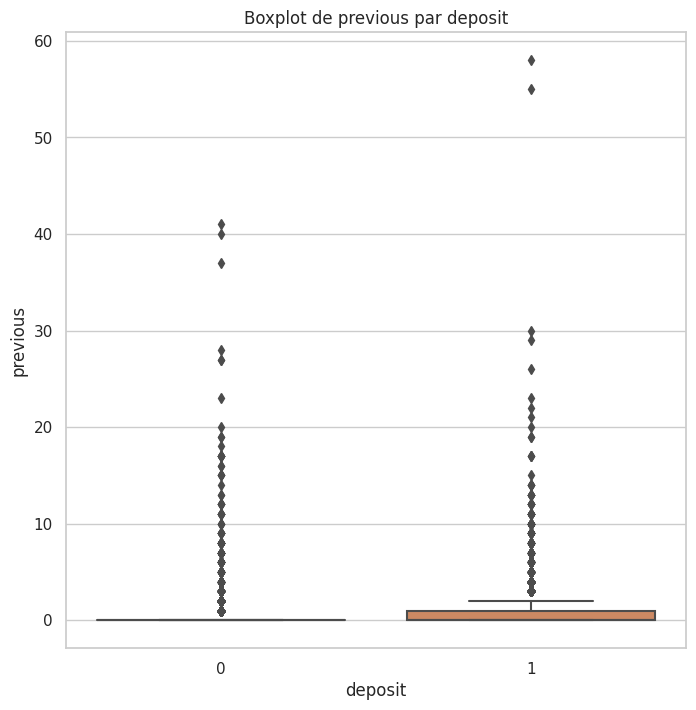

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Effectuer un ANOVA pour chaque combinaison de variables numériques et catégorielles
for var_num in col_numeric:
    for var_cat in col_category:
        model = ols(f'{var_num} ~ C({var_cat})', data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(f'ANOVA pour {var_num} et {var_cat} :')
        print(anova_table)
        print('\n')

        plt.figure(figsize=(8, 8))
        sns.boxplot(x=var_cat, y=var_num, data=df)
        plt.title(f'Boxplot de {var_num} par {var_cat}')
        plt.show()



In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Effectuer un ANOVA pour chaque combinaison de variables numériques et catégorielles
for var_num in col_numeric:
    for var_cat in col_category:
        model = ols(f'{var_num} ~ C({var_cat})', data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(f'test ANOVA pour {var_num} et {var_cat} :')
        print(anova_table)
        print('\n')

test ANOVA pour age et job :
                sum_sq       df           F  PR(>F)
C(job)    5.831854e+05     11.0  590.619823     0.0
Residual  1.000877e+06  11150.0         NaN     NaN


test ANOVA pour age et marital :
                  sum_sq       df            F  PR(>F)
C(marital)  3.552623e+05      2.0  1613.106691     0.0
Residual    1.228800e+06  11159.0          NaN     NaN


test ANOVA pour age et education :
                    sum_sq       df           F         PR(>F)
C(education)  1.005044e+05      3.0  251.968251  3.205321e-158
Residual      1.483558e+06  11158.0         NaN            NaN


test ANOVA pour age et default :
                  sum_sq       df         F    PR(>F)
C(default)  2.067600e+02      1.0  1.456851  0.227457
Residual    1.583856e+06  11160.0       NaN       NaN


test ANOVA pour age et housing :
                  sum_sq       df           F        PR(>F)
C(housing)  4.508210e+04      1.0  326.915332  4.794977e-72
Residual    1.538980e+06  11160.0    

In [ ]:
# Définissez les seuils de troncature (par exemple, -100 et 100)
seuil_inferieur = -2000
seuil_superieur = 40000

# Appliquez la troncature en utilisant la méthode clip
df["balance_tronquee"] = df["balance"].clip(lower=seuil_inferieur, upper=seuil_superieur)

# Affichez la série résultante
print(df)
df["balance_tronquee"].describe()






       age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \

count    11162.000000
mean      1514.132055
std       2967.172688
min      -2000.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      40000.000000
Name: balance_tronquee, dtype: float64

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# 1. Création du tableau de contingence
tableau_contingence = pd.crosstab(df['contact'], df['poutcome'])

print("Tableau de contingence:")
print(tableau_contingence)

# 2. Application du test du Chi-Carré
chi2, p, dof, expected = chi2_contingency(tableau_contingence)

print("\nRésultats du test du Chi-Carré:")
print(f"Valeur du Chi2: {chi2}")
print(f"Valeur p: {p}")
print(f"Degrés de liberté: {dof}")
print("\nFréquences attendues:")
print(expected)


Tableau de contingence:
poutcome   failure  other  success  unknown
contact                                    
cellular      1143    484      980     5435
telephone       79     46       85      564
unknown          6      7        6     2327

Résultats du test du Chi-Carré:
Valeur du Chi2: 962.4478978519626
Valeur p: 1.1818540397375284e-204
Degrés de liberté: 6

Fréquences attendues:
[[ 884.74968644  386.89786777  771.63429493 5998.71815087]
 [  85.15248163   37.23687511   74.26572299  577.34492027]
 [ 258.09783193  112.86525712  225.09998208 1749.93692887]]


In [ ]:
#test statistique des variables numériques et la variable cible

from scipy.stats import ttest_ind
from scipy import stats

# analyse des statistiques descriptives
descriptive_stats = df.groupby('deposit')['balance_tronquee'].describe()

print(descriptive_stats)

# test t de Student
grouped = df.groupby('deposit')
group1 = grouped['balance_tronquee'].get_group(0)
group2 = grouped['balance_tronquee'].get_group(1)

t_stat, p_val = ttest_ind(group1, group2)

print('Test t de Student - Statistique de test :', t_stat)
print('Test t de Student - Valeur de p :', p_val)

#Calcul de la correlation avec le point_biserial
point_biserial, _ = stats.pointbiserialr(df['deposit'], df['balance_tronquee'])
print('Point bisériel:', point_biserial)

#Calcul de la correlation avec la coéfficient de Pearson
correlation = df['balance_tronquee'].corr(df['deposit'])
print('Coefficient de corrélation de Pearson:', correlation)

# visualisation
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='balance_tronquee', data=df)
plt.title('Distribution de previous en fonction de deposit')
plt.show()

          count         mean          std     min    25%    50%     75%  \
deposit                                                                   
0        5873.0  1271.878256  2770.979701 -2000.0   64.0  414.0  1324.0   
1        5289.0  1783.134997  3149.339400 -2000.0  210.0  733.0  2159.0   

             max  
deposit           
0        40000.0  
1        40000.0  
Test t de Student - Statistique de test : -9.122964042294178
Test t de Student - Valeur de p : 8.561770438347172e-20
Point bisériel: 0.08603802747456966
Coefficient de corrélation de Pearson: 0.0860380274745694


PREPROCESSING

In [ ]:
#On écarte les valeurs -1 de pdays pour ne pas les traiter lors du pre-processing
from sklearn.preprocessing import OneHotEncoder
pdays_filtered = df['pdays'][df['pdays'] != -1]
# Pour 'campaign'
Q1_campaign = df['campaign'].quantile(0.25)
Q3_campaign = df['campaign'].quantile(0.75)
IQR_campaign = Q3_campaign - Q1_campaign
Sbas_campaign = Q1_campaign - 1.5 * IQR_campaign
Shaut_campaign = Q3_campaign + 1.5 * IQR_campaign

# Pour 'pdays' (excluding -1 values)
Q1_pdays = pdays_filtered.quantile(0.25)
Q3_pdays = pdays_filtered.quantile(0.75)
IQR_pdays = Q3_pdays - Q1_pdays
Sbas_pdays = Q1_pdays - 1.5 * IQR_pdays
Shaut_pdays = Q3_pdays + 1.5 * IQR_pdays

# Pour 'previous'
Q1_previous = df['previous'].quantile(0.25)
Q3_previous = df['previous'].quantile(0.75)
IQR_previous = Q3_previous - Q1_previous
Sbas_previous = Q1_previous - 1.5 * IQR_previous
Shaut_bound_previous = Q3_previous + 1.5 * IQR_previous

#Pour 'Duration'
Q1_duration = df['duration'].quantile(0.25)
Q3_duration = df['duration'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration
Sbas_duration = Q1_previous - 1.5 * IQR_duration
Shaut_bound_duration = Q3_duration + 1.5 * IQR_duration

moyenne_pdays = pdays_filtered.mean()
moyenne_campaign = df['campaign'].mean()
moyenne_previous = df['previous'].mean()
moyenne_duration = df['duration'].mean()

# Remplacer les valeurs aberrantes de 'pdays' par sa moyenne (en excluant les valeurs -1)
df.loc[(df['pdays'] > Shaut_pdays) & (df['pdays'] != -1), 'pdays'] = moyenne_pdays

# Remplacer les valeurs aberrantes de 'campaign' par sa moyenne
df.loc[df['campaign'] > Shaut_campaign, 'campaign'] = moyenne_campaign

# Remplacer les valeurs aberrantes de 'previous' par la moyenne de 'campaign'
df.loc[df['previous'] > Shaut_bound_previous, 'previous'] = moyenne_previous

# Remplacer les valeurs aberrantes de 'duration' par la moyenne de 'campaign'
df.loc[df['duration'] > Shaut_bound_duration, 'duration'] = moyenne_duration


#Transformation des colonnes age et balance pour creer un découpage dans le but d'attenuer les valeurs extrémes qui ne me semble pas abberante tout en les gardant.
#Création du bins et des étiquettes
age_bins = [18, 25, 35, 50, 65, 100]
age_labels = ["18_25", "25_35", "35_50", "50_65", "65_100"]
# On applique le changement sur le dataset pour creer la colonne
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
#Création du bins et des étiquettes
balance_bins = [-6848, 0, 122, 550, 1708, 81205]
balance_labels = ["negatif", "tres_faible", "faible", "moyen", "eleve"]
# Cut the balance column into bins
df['balance_group'] = pd.cut(df['balance'], bins=balance_bins, labels=balance_labels, right=False)
# On applique le changement sur le dataset pour creer la colonne
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
df['age_group'] = df['age_group'].astype('object')
df['balance_group'] = df['balance_group'].astype('object')

df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day  ...    duration  campaign  pdays  previous  poutcome deposit  \
0    5  ...  371.993818       1.0   -1.0       0.0   unknown       1   
1    5  ...  371.993818       1.0   -1.0       0.0   unknown       1   
2    5  ...  371.993818       1.0   -1.0       0.0   unknown       1   
3    5  ...  579.000000       1.0   -1.0       0.0   unknown       1   
4    5  ...  673.000000       2.0   -1.0       0.0   unknown       1   

   durations  balance_tronquee  age_group balance_group  
0  17.366667              2343      50_65         eleve  
1  24.450000                45      50_65   tres_faible  
2  23.150000              1270      35_50         moyen  
3   9.650000              2476      50_65         eleve  
4  11.216667               184      50_65        faible  

[5 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               11162 non-null  int64  
 1   job               11162 non-null  object 
 2   marital           11162 non-null  object 
 3   education         11162 non-null  object 
 4   default           11162 non-null  object 
 5   balance           11162 non-null  int64  
 6   housing           11162 non-null  object 
 7   loan              11162 non-null  object 
 8   contact           11162 non-null  object 
 9   day               11162 non-null  int64  
 10  month             11162 non-null  object 
 11  duration          11162 non-null  float64
 12  campaign          11162 non-null  float64
 13  pdays             11162 non-null  float64
 14  previous          11162 non-null  float64
 15  poutcome          11162 non-null  object 
 16  deposit           11162 non-null  int64 

In [ ]:
dfp=df.drop(['durations', 'balance_tronquee', 'age', 'balance'], axis=1)
dfp.head()

job  marital  education default housing loan  contact  day month  \
0      admin.  married  secondary      no     yes   no  unknown    5   may   
1      admin.  married  secondary      no      no   no  unknown    5   may   
2  technician  married  secondary      no     yes   no  unknown    5   may   
3    services  married  secondary      no     yes   no  unknown    5   may   
4      admin.  married   tertiary      no      no   no  unknown    5   may   

     duration  campaign  pdays  previous poutcome  deposit age_group  \
0  371.993818       1.0   -1.0       0.0  unknown        1     50_65   
1  371.993818       1.0   -1.0       0.0  unknown        1     50_65   
2  371.993818       1.0   -1.0       0.0  unknown        1     35_50   
3  579.000000       1.0   -1.0       0.0  unknown        1     50_65   
4  673.000000       2.0   -1.0       0.0  unknown        1     50_65   

  balance_group  
0         eleve  
1   tres_faible  
2         moyen  
3         eleve  
4        faible

In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   job            11162 non-null  object 
 1   marital        11162 non-null  object 
 2   education      11162 non-null  object 
 3   default        11162 non-null  object 
 4   housing        11162 non-null  object 
 5   loan           11162 non-null  object 
 6   contact        11162 non-null  object 
 7   day            11162 non-null  int64  
 8   month          11162 non-null  object 
 9   duration       11162 non-null  float64
 10  campaign       11162 non-null  float64
 11  pdays          11162 non-null  float64
 12  previous       11162 non-null  float64
 13  poutcome       11162 non-null  object 
 14  deposit        11162 non-null  int64  
 15  age_group      11162 non-null  object 
 16  balance_group  11162 non-null  object 
dtypes: float64(4), int64(2), object(11)
memory usage: 

SEPARATION DES VARIABLES EXPLICATIVES ET DE LA VARIABLE CIBLE

In [ ]:
X=dfp.drop('deposit', axis=1)
y=dfp['deposit']

In [ ]:
from sklearn.model_selection import train_test_split

#X_cat et X_num sont mes variables explicatives catégorielles et numériques, et y est ma variable cible.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Séparation des colonnes numériques et catégorielles
num_train_df = X_train[['day', 'duration', 'campaign', 'pdays', 'previous']]
num_test_df = X_test[['day', 'duration', 'campaign', 'pdays', 'previous']]
cat_train_df = X_train[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','age_group', 'balance_group']]
cat_test_df = X_test[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'age_group', 'balance_group']]

# Encodage des variables catégorielles
oneh = OneHotEncoder(drop=None , sparse=False)
cat_train_encoded = oneh.fit_transform(cat_train_df)
cat_test_encoded = oneh.transform(cat_test_df)

# Récupérons les noms des colonnes après l'encodage OneHot
encoded_cat_columns = oneh.get_feature_names_out(cat_train_df.columns).tolist()

# Standardisation des variables numériques
scaler = StandardScaler()
num_train_standardized = scaler.fit_transform(num_train_df)
num_test_standardized = scaler.transform(num_test_df)

# Récupérons les noms des colonnes numériques
num_columns = num_train_df.columns.tolist()

# Concaténons les deux listes pour obtenir tous les noms de colonnes
all_columns = num_columns + encoded_cat_columns

# Création du DataFrame pour le jeu d'entraînement avec les bons noms de colonnes
X_train_encoded_df = pd.DataFrame(np.concatenate([num_train_standardized, cat_train_encoded], axis=1), columns=all_columns)

# Création du DataFrame pour le jeu de test avec les bons noms de colonnes
X_test_encoded_df = pd.DataFrame(np.concatenate([num_test_standardized, cat_test_encoded], axis=1), columns=all_columns)

# Afficher les premières lignes du DataFrame d'entraînement pour vérification
X_train_encoded_df
X_train=X_train_encoded_df
X_test=X_test_encoded_df
# Afficher les premières lignes du DataFrame de test pour vérification (optionnel)
# print(X_test_encoded_df.head())
X_train

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


day  duration  campaign     pdays  previous  job_admin.  \
0     0.284318 -0.937183  0.375650 -0.487399 -0.523299         0.0   
1    -0.545702 -0.144641 -0.036592  2.109347  0.964918         0.0   
2    -1.138573  1.721947 -0.036592 -0.487399 -0.523299         0.0   
3     0.640040  1.089646  1.585060 -0.487399 -0.523299         1.0   
4    -0.071405 -0.270235 -0.847417  1.311844  0.964918         0.0   
...        ...       ...       ...       ...       ...         ...   
8366 -0.545702 -1.015138 -0.036592 -0.487399 -0.523299         0.0   
8367  0.047169  0.582938 -0.036592 -0.156728  0.964918         0.0   
8368  0.521466 -0.508431  0.375650 -0.487399 -0.523299         0.0   
8369  1.114337  0.249464  2.395885 -0.487399 -0.523299         0.0   
8370  0.877189 -0.196611 -0.847417 -0.487399 -0.523299         0.0   

      job_blue-collar  job_entrepreneur  job_housemaid  job_management  ...  \
0                 0.0               0.0            0.0             0.0  ...   
1                 0.0               0.0            0.0             1.0  ...   
2                 0.0               0.0            0.0             0.0  ...   
3                 0.0               0.0            0.0             0.0  ...   
4                 0.0               0.0            0.0             0.0  ...   
...               ...               ...            ...             ...  ...   
8366              0.0               0.0            0.0             1.0  ...   
8367              0.0               0.0            0.0             0.0  ...   
8368              0.0               0.0            0.0             0.0  ...   
8369              0.0               0.0            0.0             0.0  ...   
8370              0.0               0.0            0.0             1.0  ...   

      age_group_18_25  age_group_25_35  age_group_35_50  age_group_50_65  \
0                 0.0              0.0              0.0              1.0   
1                 0.0              0.0              0.0              1.0   
2                 0.0              1.0              0.0              0.0   
3                 0.0              1.0              0.0              0.0   
4                 0.0              1.0              0.0              0.0   
...               ...              ...              ...              ...   
8366              0.0              0.0              1.0              0.0   
8367              0.0              1.0              0.0              0.0   
8368              0.0              0.0              1.0              0.0   
8369              0.0              0.0              0.0              1.0   
8370              0.0              1.0              0.0              0.0   

      age_group_65_100  balance_group_eleve  balance_group_faible  \
0                  0.0                  1.0                   0.0   
1                  0.0                  0.0                   0.0   
2                  0.0                  0.0                   0.0   
3                  0.0                  1.0                   0.0   
4                  0.0                  1.0                   0.0   
...                ...                  ...                   ...   
8366               0.0                  0.0                   0.0   
8367               0.0                  0.0                   1.0   
8368               0.0                  0.0                   0.0   
8369               0.0                  0.0                   0.0   
8370               0.0                  0.0                   0.0   

      balance_group_moyen  balance_group_negatif  balance_group_tres_faible  
0                     0.0                    0.0                        0.0  
1                     0.0                    1.0                        0.0  
2                     0.0                    1.0                        0.0  
3                     0.0                    0.0                        0.0  
4                     0.0                    0.0                        0.0  
...        

In [ ]:
X_test_encoded_df.columns.sum()

Index(['day', 'duration', 'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'age_group_18_25', 'age_group_25_35',
       'age_group_35_50', 'age_group_50_65', 'age_group_65_100',
       'balance_group_eleve',

In [ ]:
# Séparation des colonnes numériques et catégorielles avec la transformation de age et balance en object
#num_train = X_train[['day', 'duration', 'campaign', 'pdays', 'previous']]
#num_test = X_test[['day', 'duration', 'campaign', 'pdays', 'previous']]
#cat_train = X_train[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','age_group', 'balance_group']]
#cat_test = X_test[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'age_group', 'balance_group']]


In [ ]:
#Encodage des variables

#from sklearn.preprocessing import OneHotEncoder
#Encodage variable cat

#oneh = OneHotEncoder( drop=None , sparse=False)
#cat_train = oneh.fit_transform(cat_train)
#cat_test = oneh.transform(cat_test)

#standardisation des variables numériques.
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(num_train)
#num_train = scaler.transform(num_train)
#num_test = scaler.transform(num_test)

#Encodage de notre variable cible deposit
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#y_train = le.fit_transform(y_train)
#y_test = le.transform(y_test)

#On reconstitut les jeux d'entraînement et de test par concatenation
#X_train = np.concatenate([num_train, cat_train], axis = 1)
#X_test = np.concatenate([num_test, cat_test], axis = 1)

#Dimensions
#print("Dimensions du jeu d’entrainement : ", X_train.shape)
#print("Dimensions du jeu de test : ", X_test.shape)

In [ ]:
#X_train


ENTRAINEMENT DU MODEL KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

EVALUATION DU MODEL GRAPHIQUEMENT POUR DETERMINER LES MEILLEURS METRICS A UTILISER POUR AVOIR LE MEILLEUR SCORE ACCURACY AVEC UN K NEIGHBORS OU K VOISIN SITUE ENTRE 1 ET 100



In [ ]:
score_mi = []
score_eu = []
score_ma = []
score_ch = []

for k in range(1, 100):
    knn_mi = KNeighborsClassifier(n_neighbors=k, metric="minkowski")
    knn_mi.fit(X_train, y_train)
    score_mi.append(knn_mi.score(X_test, y_test))

for k in range(1, 100):
    knn_eu = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn_eu.fit(X_train, y_train)
    score_eu.append(knn_eu.score(X_test, y_test))

for k in range(1,100):
    knn_ma = KNeighborsClassifier(n_neighbors=k, metric="manhattan")
    knn_ma.fit(X_train, y_train)
    score_ma.append(knn_ma.score(X_test, y_test))

for k in range(1, 100):
    knn_ch = KNeighborsClassifier(n_neighbors=k, metric="chebyshev")
    knn_ch.fit(X_train, y_train)
    score_ch.append(knn_ch.score(X_test, y_test))



In [ ]:
plt.plot(range(1, 100), score_mi, color='blue', linestyle='dashed', lw=2, label='Minkowski')
plt.plot(range(1, 100), score_eu, color='black', linestyle='dashed', lw=2, label='euclidean')
plt.plot(range(1, 100), score_ma, color='orange', linestyle='dashed', lw=2, label='manhattan')
plt.plot(range(1, 100), score_ch, color='red', linestyle='dashed', lw=2, label='Chebyshev')
plt.title('Score - valeur de K')
plt.xlabel('Valeur de K')
plt.ylabel('Accuracy')
plt.legend();


Le graphique ci dessus nous montre que la metric qui donne le score accuracy le plus élevé est MINKOWSKI ou EUCLIDIAN et cela se situ entre l'intervalle de 25 et 40. nous pouvons à présent utiliser la méthode GridsearchCV pour déterminer les meilleurs parametres du model en utilisant les données du graphique pour que cela prenne moins de temps de traitement.



DETERMINATION DES MEILLEURES PARAMETTRES DU MODEL AVEC GRIDSEACHCV

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
   'n_neighbors': [i for i in range(10, 25)],
   'metric': ['euclidean']}


knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres: ", grid_search.best_params_)
print("Meilleur score: ", grid_search.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Meilleurs paramètres:  {'metric': 'euclidean', 'n_neighbors': 13}
Meilleur score:  0.7923786087483728


RESULTATS OBTENUES: les résultats cidessus nous indiques que les meilleurs parametre à utiliser pour un score accuracy le plus élevé sont: {'metric': 'euclidean', 'n_neighbors': 13} pour un Meilleur score accuracy de :  {0.7923786087483728}

créons une fonction pour évaluer les différents models en faisant ressortir la courbe d'apprentissage grace au learning_curve


In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report

def evaluation(model):

  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

  N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10))

  plt.figure(figsize= (5,5))
  plt.plot(N, train_score.mean(axis=1), label='train score')
  plt.plot(N, val_score.mean(axis=1), label='validation score')
  plt.legend()

  return model

créons la nouvelle instance de KNN avec les meilleurs paramêtres du model et faisons son évaluation

[[1208  242]
 [ 358  983]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1450
           1       0.80      0.73      0.77      1341

    accuracy                           0.79      2791
   macro avg       0.79      0.78      0.78      2791
weighted avg       0.79      0.79      0.78      2791



KNeighborsClassifier(metric='euclidean', n_neighbors=29)

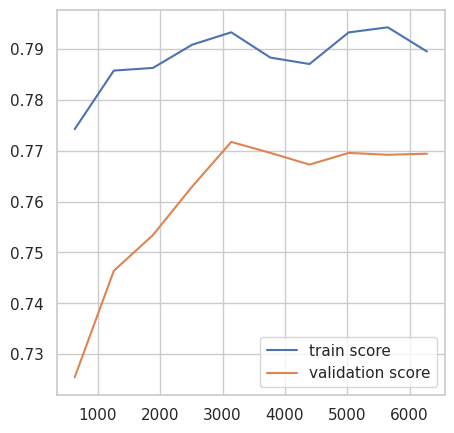

In [ ]:
knn_eu = KNeighborsClassifier(n_neighbors=13, metric='euclidean')
evaluation(knn_eu)

# - INTERPRETATION DE LA MATRICE DE CONFUSION

**939** est le nombre de vrais négatifs (TN). Cela signifie que 939 clients ont été correctement classées comme appartenant à la catégorie des clients qui ont refusé de souscrire au dépot à terme.

**227** est le nombre de faux positifs (FP). Cela signifie que 227 clients ont été incorrectement classées comme appartenant à la catégorie des clients qui ont accepté de souscrire au dépot à terme alors qu'elles appartenaient réellement à ceux qui ont refusé de souscrire.

**244** est le nombre de faux négatifs (FN). Cela signifie que 244 clients ont été incorrectement classées comme appartenant à la catégories des clients qui ont refusé de souscrire alors qu'elles appartenaient réellement à la catégorie de ceux qui ont accepté de souscrire.

**823** est le nombre de vrais positifs (TP). Cela signifie que 823 clients ont été correctement classées comme appartenant à la catégorie des client ayant accepté de souscrire au dépot à terme.

# - Rapport de classification:
*Pour les clients n'ayant pas souscrit à l'offre:*

**Précision: 0.79.** Cela signifie que 79% des clients classées comme n'ayant pas souscrit l'étaient effectivement. Calcul: TP / (TP + FP) = 939 / (939 + 244) = 0.79

**Rappel (Sensibilité): 0.81.** Cela signifie que le modèle a correctement identifié 81% des clients qui ont refusé de souscrire au dépot à terme. Calcul: TP / (TP + FN) = 939 / (939 + 227) = 0.81

**Score F1: 0.80.** C'est une moyenne harmonique entre la précision et le rappel. Il donne un compromis entre la précision et le rappel.



*Pour les clients ayant souscrit au dépot à terme:*

**Précision: 0.78** Cela signifie que 78% des clients classées comme ayant  souscrit l'étaient effectivement

**Rappel (Sensibilité): 0.77** Cela signifie que le modèle a correctement identifié 77% des clients qui ont accepté de souscrire au dépot à terme

**Score F1: 0.78**

*Métriques globales:*
**Accuracy (exactitude): 0.79.** Cela signifie que 79% des prédictions du modèle étaient correctes pour l'ensemble des données.

**Macro avg:** C'est la moyenne non pondérée des métriques pour chaque classe. Ici, c'est 0.79 pour la précision, le rappel et le score F1.

**Weighted avg:** C'est la moyenne pondérée des métriques pour chaque classe. Elle tient compte du déséquilibre entre les classes. Ici, c'est aussi 0.79 pour la précision, le rappel et le score F1.

# Observations et interprétations du graphique :

**Performance initiale** : Lorsque la taille de l'échantillon est faible (proche de 1000), le score d'entraînement est assez élevé, ce qui signifie que le modèle s'ajuste bien aux données d'entraînement. Cependant, le score de validation est sensiblement plus bas, ce qui indique un surajustement (overfitting) - le modèle est trop complexe pour le nombre limité de données.

**Avec l'augmentation de la taille de l'échantillon :** En augmentant la taille de l'échantillon d'entraînement, la différence entre le score d'entraînement et le score de validation diminue. C'est une bonne indication que l'ajout de plus de données améliore la capacité du modèle à généraliser à de nouvelles données.

**dans l'ensemble :** Après une certaine taille d'échantillon (proche de 5000), les deux scores semblent se stabiliser. Cela pourrait signifier que l'ajout de données supplémentaires au-delà de ce point n'améliorera peut-être pas beaucoup la performance du modèle.

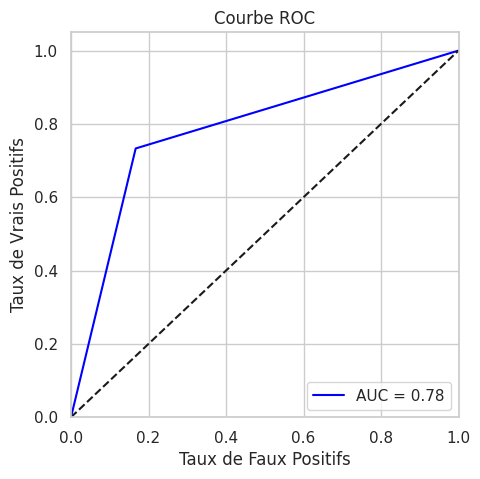

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc

knn_eu.fit(X_train, y_train)
y_pred=knn_eu.predict(X_test)
# Calculer les taux de vrais positifs et de faux positifs pour différents seuils
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculer l'AUC
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Courbe d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


In [ ]:
pip install lime

EVALUATION DES AUTRES MODELS avec la fonction (evaluation) pour comparer les courbes d'apprentissage


MODEL SVM LINEAR

In [ ]:
from sklearn.svm import LinearSVC

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.1, 1, 10],}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [ ]:
print(best_params)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


best params SVM avec gridsearch {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

[[1162  288]
 [ 208 1133]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1450
           1       0.80      0.84      0.82      1341

    accuracy                           0.82      2791
   macro avg       0.82      0.82      0.82      2791
weighted avg       0.82      0.82      0.82      2791



SVC(C=1, gamma=0.1)

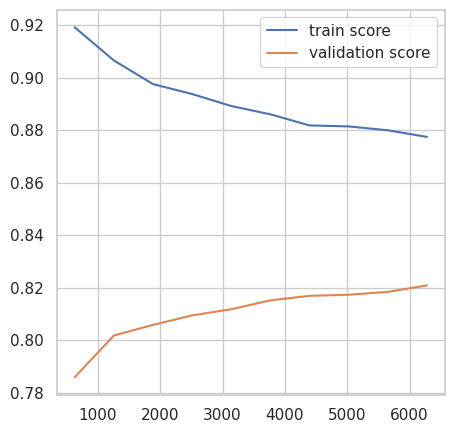

In [ ]:
from sklearn.svm import SVC

# Création de l'instance SVM avec des paramètres spécifiques
svm_model = SVC(C=1, gamma=0.1, kernel='rbf')

# Entraîner le modèle
evaluation(svm_model)

In [ ]:
#Entraînement de notre jeu de données
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Initialisation des modèles
clf_dt = DecisionTreeClassifier(criterion ='entropy', max_depth=4, random_state=42)
clf_rf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200)
clf_lr = LogisticRegression(n_jobs=-1)


In [ ]:
from xgboost import XGBClassifier
xgb_optimized = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=200,
    subsample=1.0,
    use_label_encoder=False,  # Pour éviter un warning lié à la version de XGBoost
    eval_metric="logloss"     # Pour éviter un warning lié à la version de XGBoost
)

EVALUATION DU MODEL DECISION TREE


In [ ]:
evaluation(clf_dt)

[[1200  250]
 [ 404  937]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1450
           1       0.79      0.70      0.74      1341

    accuracy                           0.77      2791
   macro avg       0.77      0.76      0.76      2791
weighted avg       0.77      0.77      0.76      2791



DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

EVALUATION DU MODEL RANDOM FOREST

[[1155  295]
 [ 186 1155]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1450
           1       0.80      0.86      0.83      1341

    accuracy                           0.83      2791
   macro avg       0.83      0.83      0.83      2791
weighted avg       0.83      0.83      0.83      2791



RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200)

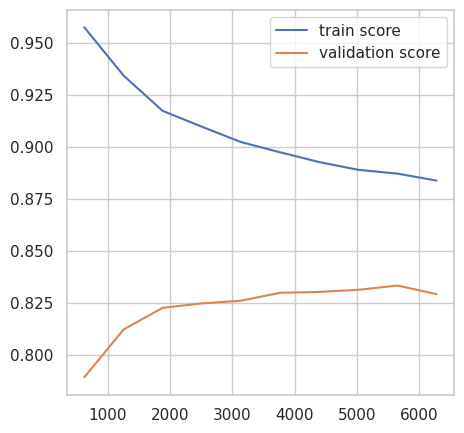

In [ ]:
evaluation(clf_rf)

EVALUATION DU MODEL DE REGRESSION LOGISTIQUE

[[1198  252]
 [ 330 1011]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1450
           1       0.80      0.75      0.78      1341

    accuracy                           0.79      2791
   macro avg       0.79      0.79      0.79      2791
weighted avg       0.79      0.79      0.79      2791



LogisticRegression(n_jobs=-1)

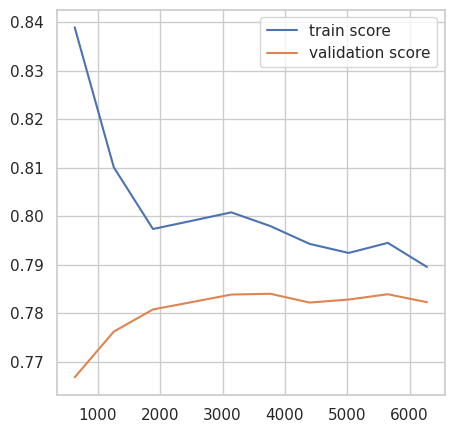

In [ ]:
evaluation(clf_lr)

EVALUATION DU MODEL XGBOOST


In [ ]:
evaluation(xgb_optimized)

je te rassemble le code à utiliser à partir de ce point/ NB: il est important de standardiser ou normaliser les données avant d'entrainer mon model

In [ ]:
#importation des bibliotheque à utiliser

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [ ]:
#détermination graphique des meilleurs parametres à utiliser pour le model

score_mi = []
score_eu = []
score_ma = []
score_ch = []

for k in range(1, 100):
    knn_mi = KNeighborsClassifier(n_neighbors=k, metric="minkowski")
    knn_mi.fit(X_train, y_train)
    score_mi.append(knn_mi.score(X_test, y_test))

for k in range(1, 100):
    knn_eu = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn_eu.fit(X_train, y_train)
    score_eu.append(knn_eu.score(X_test, y_test))

for k in range(1,100):
    knn_ma = KNeighborsClassifier(n_neighbors=k, metric="manhattan")
    knn_ma.fit(X_train, y_train)
    score_ma.append(knn_ma.score(X_test, y_test))

for k in range(1, 100):
    knn_ch = KNeighborsClassifier(n_neighbors=k, metric="chebyshev")
    knn_ch.fit(X_train, y_train)
    score_ch.append(knn_ch.score(X_test, y_test))

Le graphique ci dessus nous montre que la metric qui donne le score accuracy le plus élevé est MINKOWSKI ou EUCLIDIAN et cela se situ entre l'intervalle de 25 et 40. nous pouvons à présent utiliser la méthode GridsearchCV pour déterminer les meilleurs parametres du model en utilisant les données du graphique pour que cela prenne moins de temps de traitement.

In [ ]:
#détermination des meilleurs parametres grace a la methode GridsearchCv

from sklearn.model_selection import GridSearchCV
param_grid = {
   'n_neighbors': [i for i in range(10, 25)],
   'metric': ['euclidean']}


knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres: ", grid_search.best_params_)
print("Meilleur score: ", grid_search.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Meilleurs paramètres:  {'metric': 'euclidean', 'n_neighbors': 13}
Meilleur score:  0.7923786087483728

In [ ]:
#création d'une fonction d'entrainement du model avec une courbe d'apprentissage, une matrice de confusion et un rapport de classification
#afin d'évaluer les performences du model

from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report

def evaluation(model):

  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

  N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10))

  plt.figure(figsize= (5,5))
  plt.plot(N, train_score.mean(axis=1), label='train score')
  plt.plot(N, val_score.mean(axis=1), label='validation score')
  plt.legend()

  return model

In [ ]:
#instantion le model KNN avec ses parametres optimisés pour faire son évaluation

knn_eu = KNeighborsClassifier(n_neighbors=13, metric='euclidean')
evaluation(knn_eu)